# The 12 Patterns diagrams

# Pattern 1

## component diagram

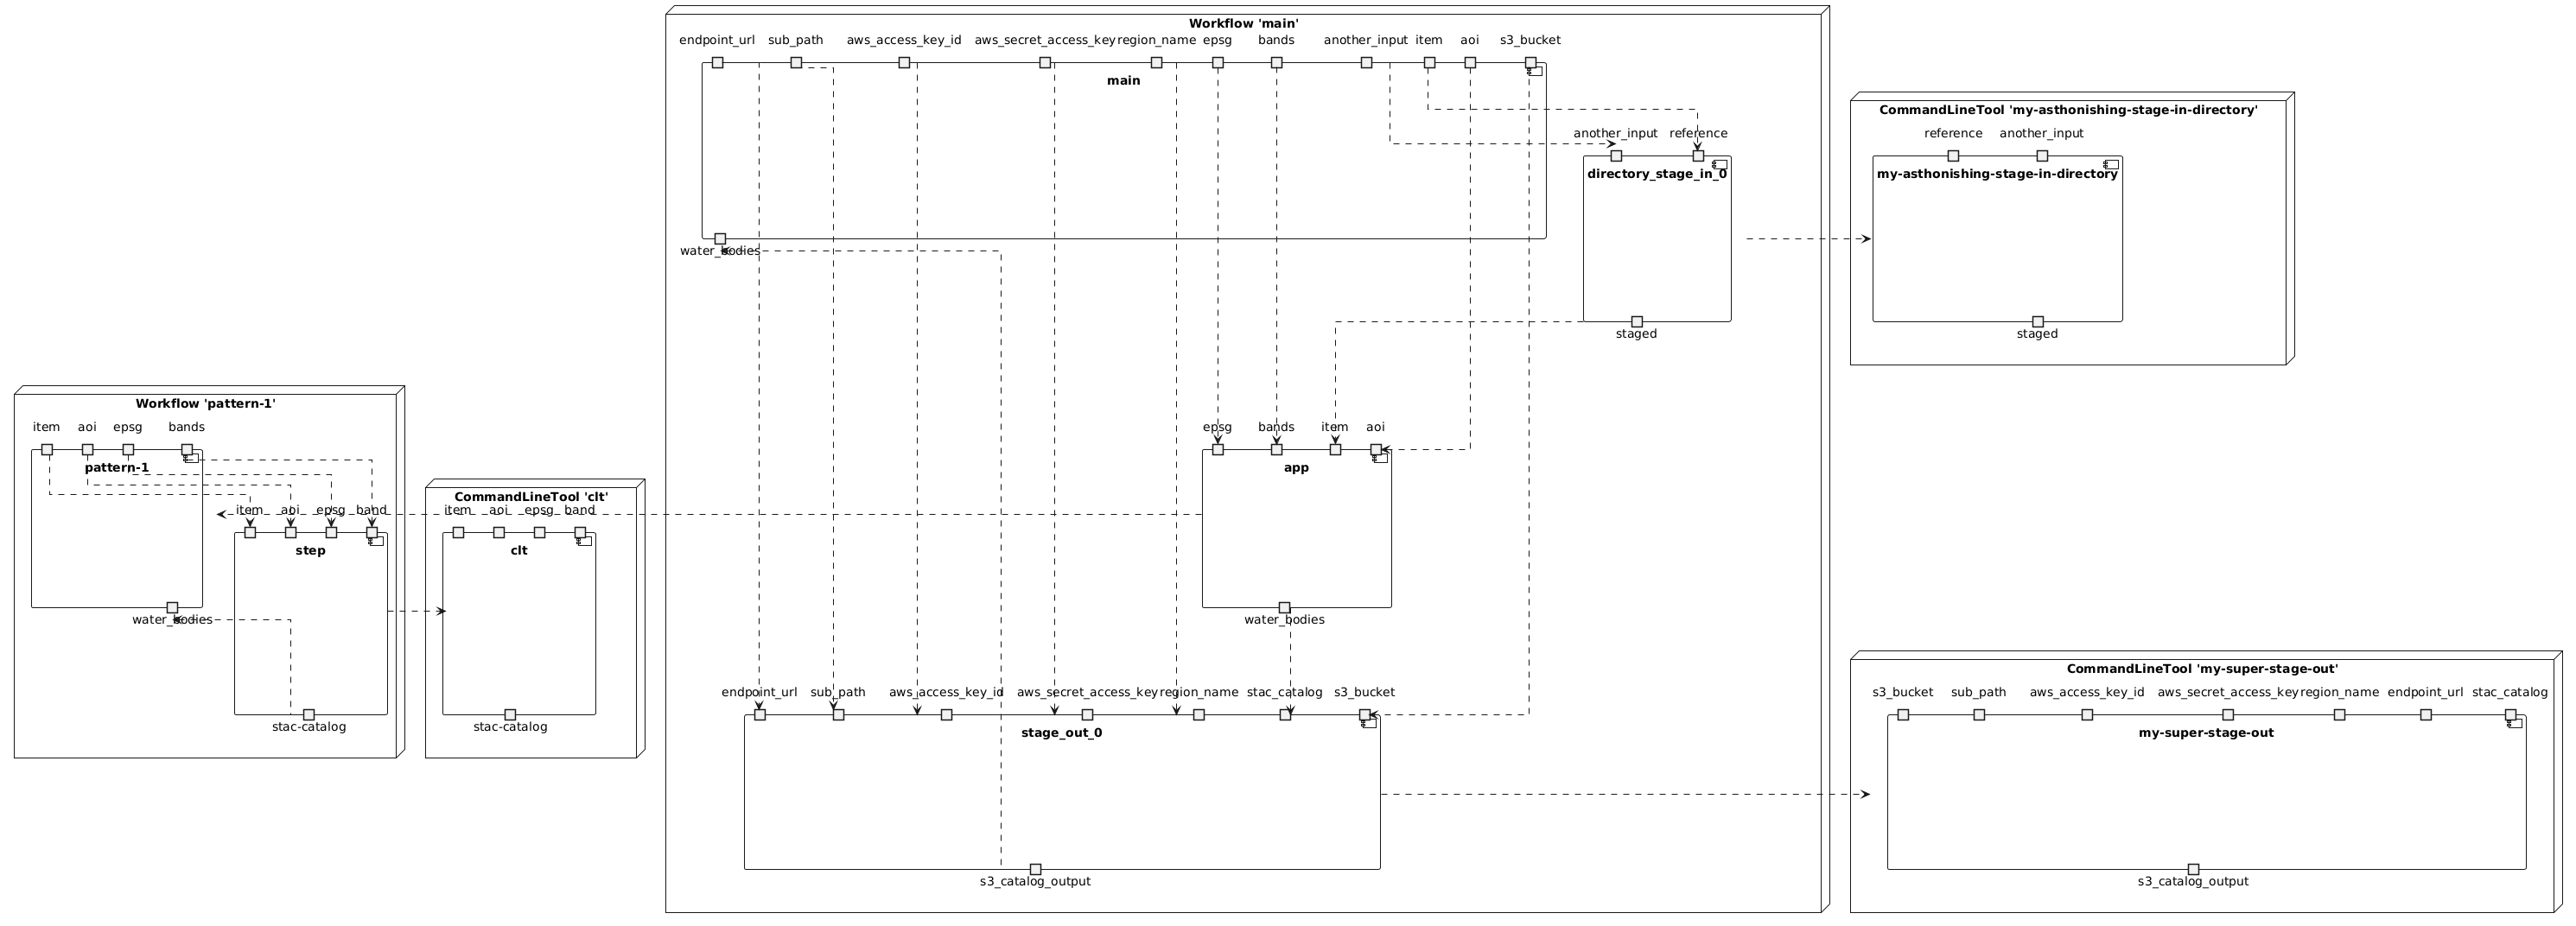

## class diagram

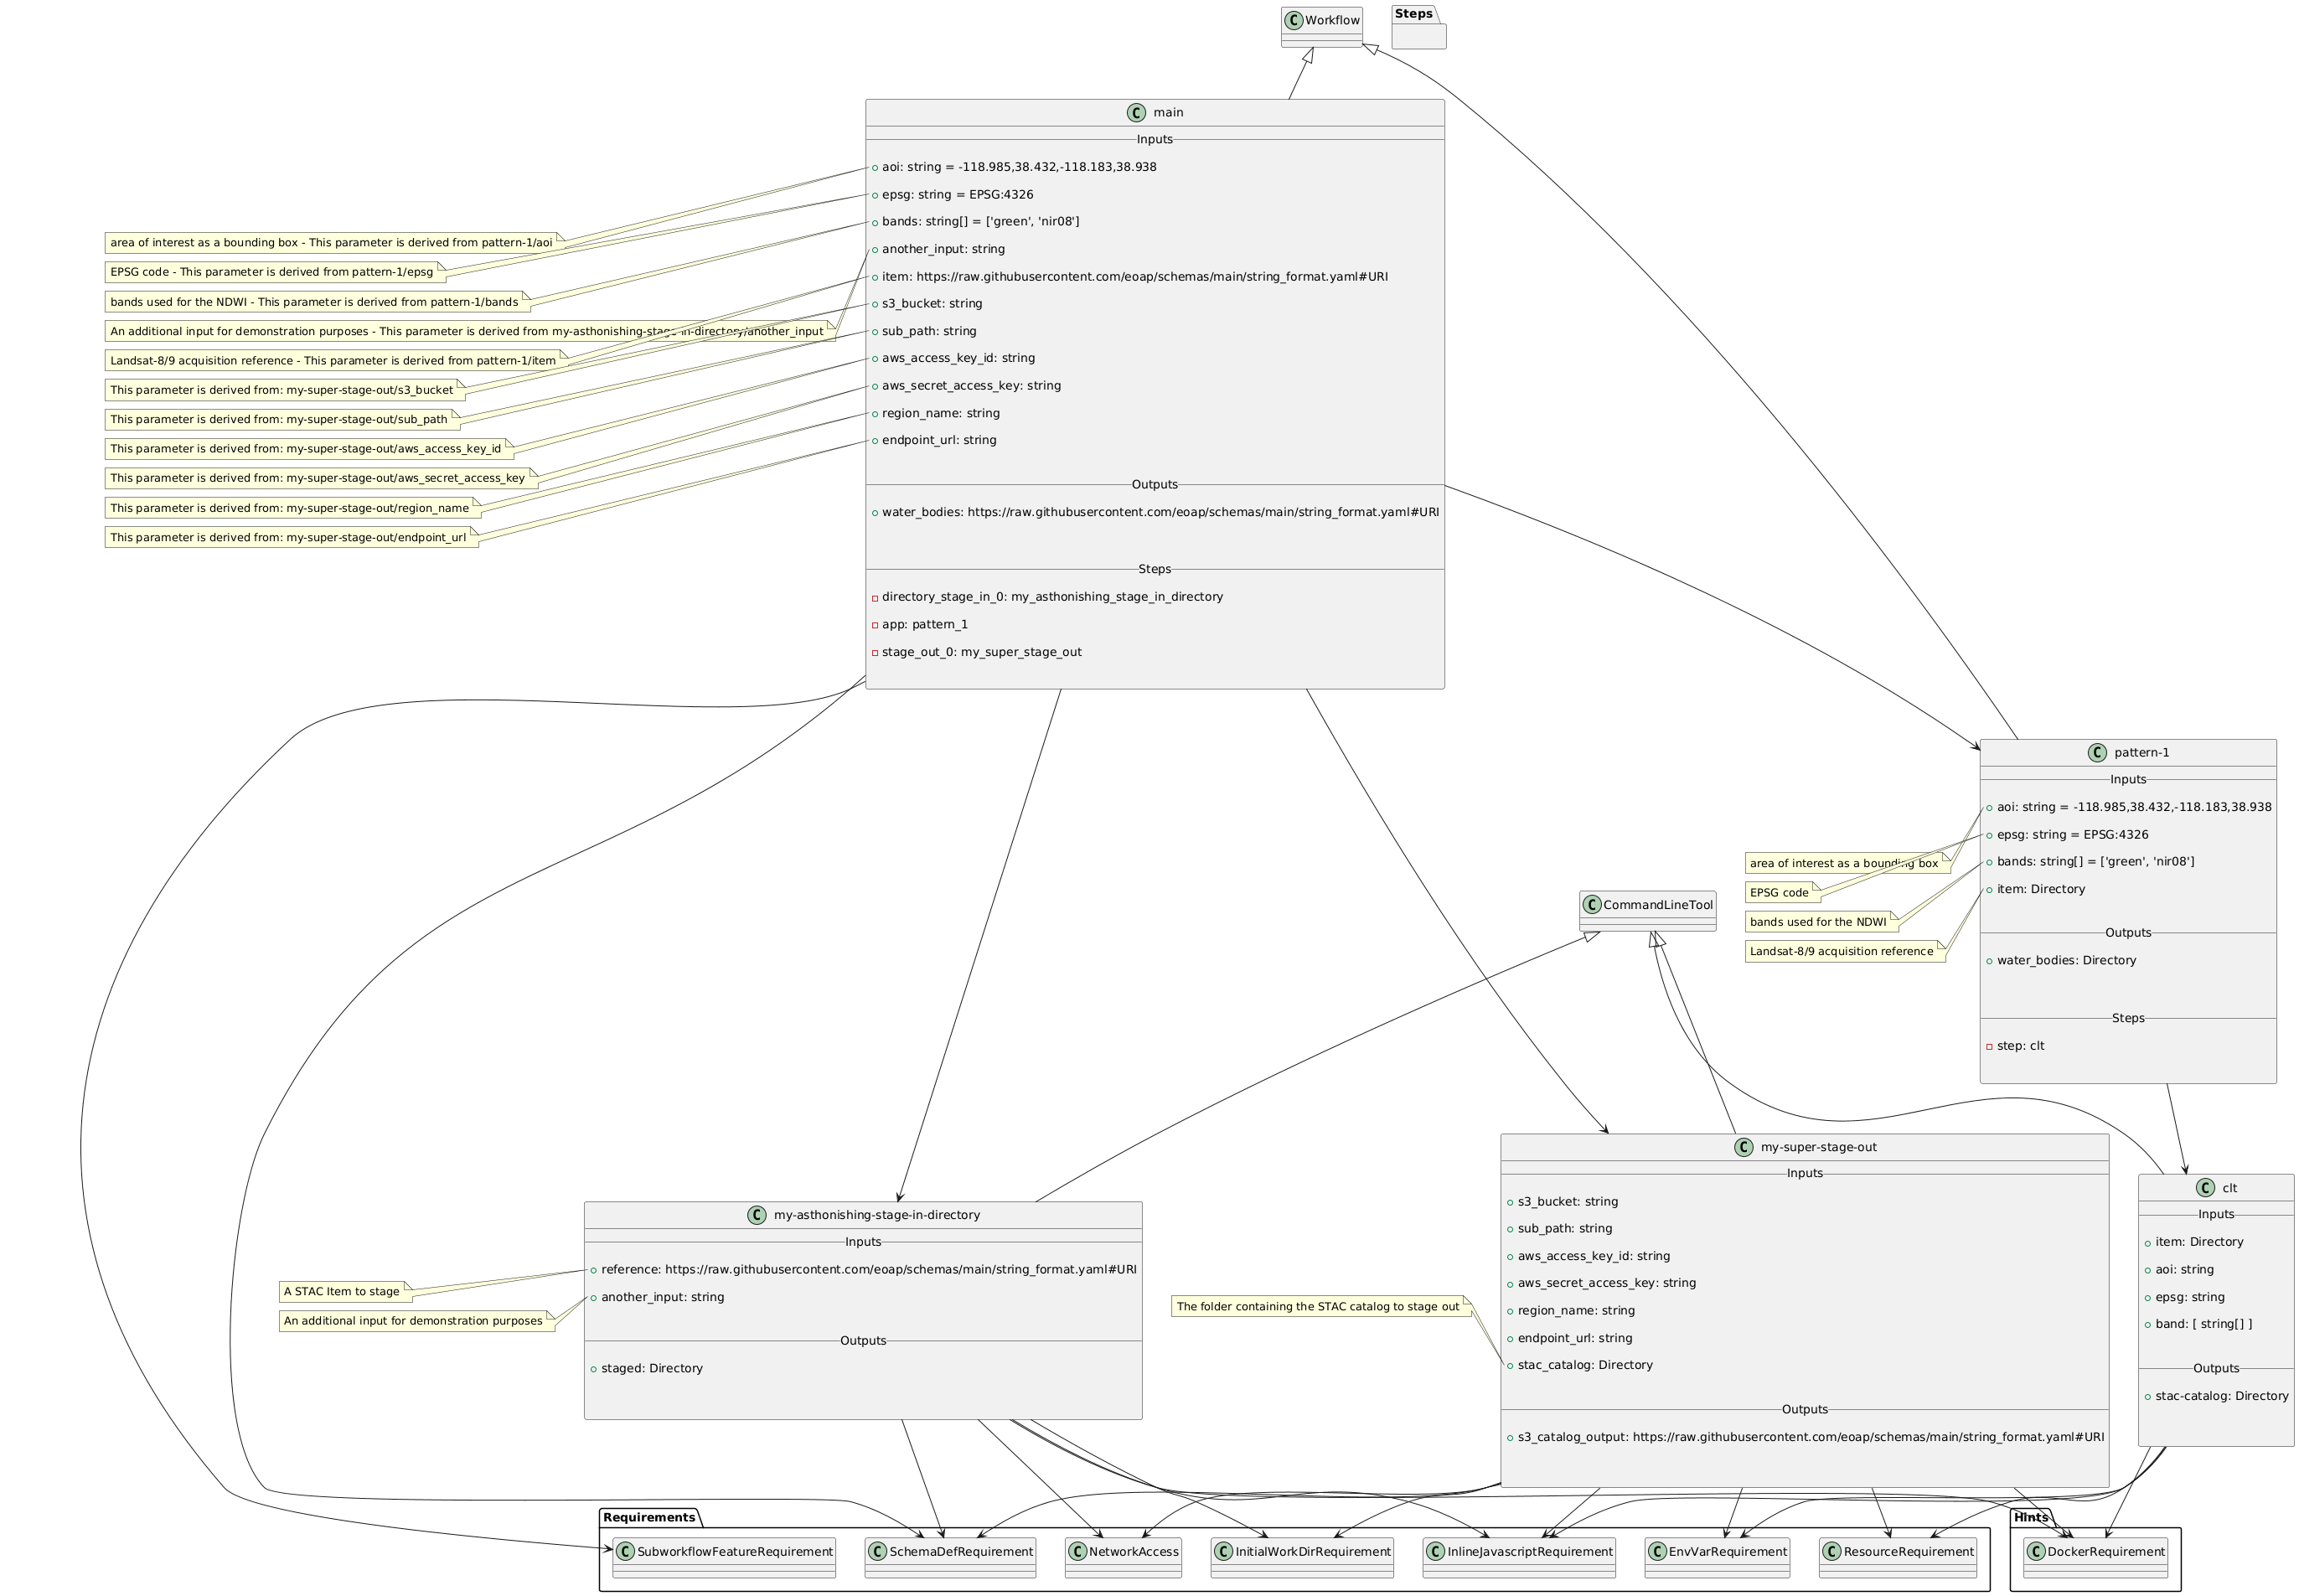

## sequence diagram

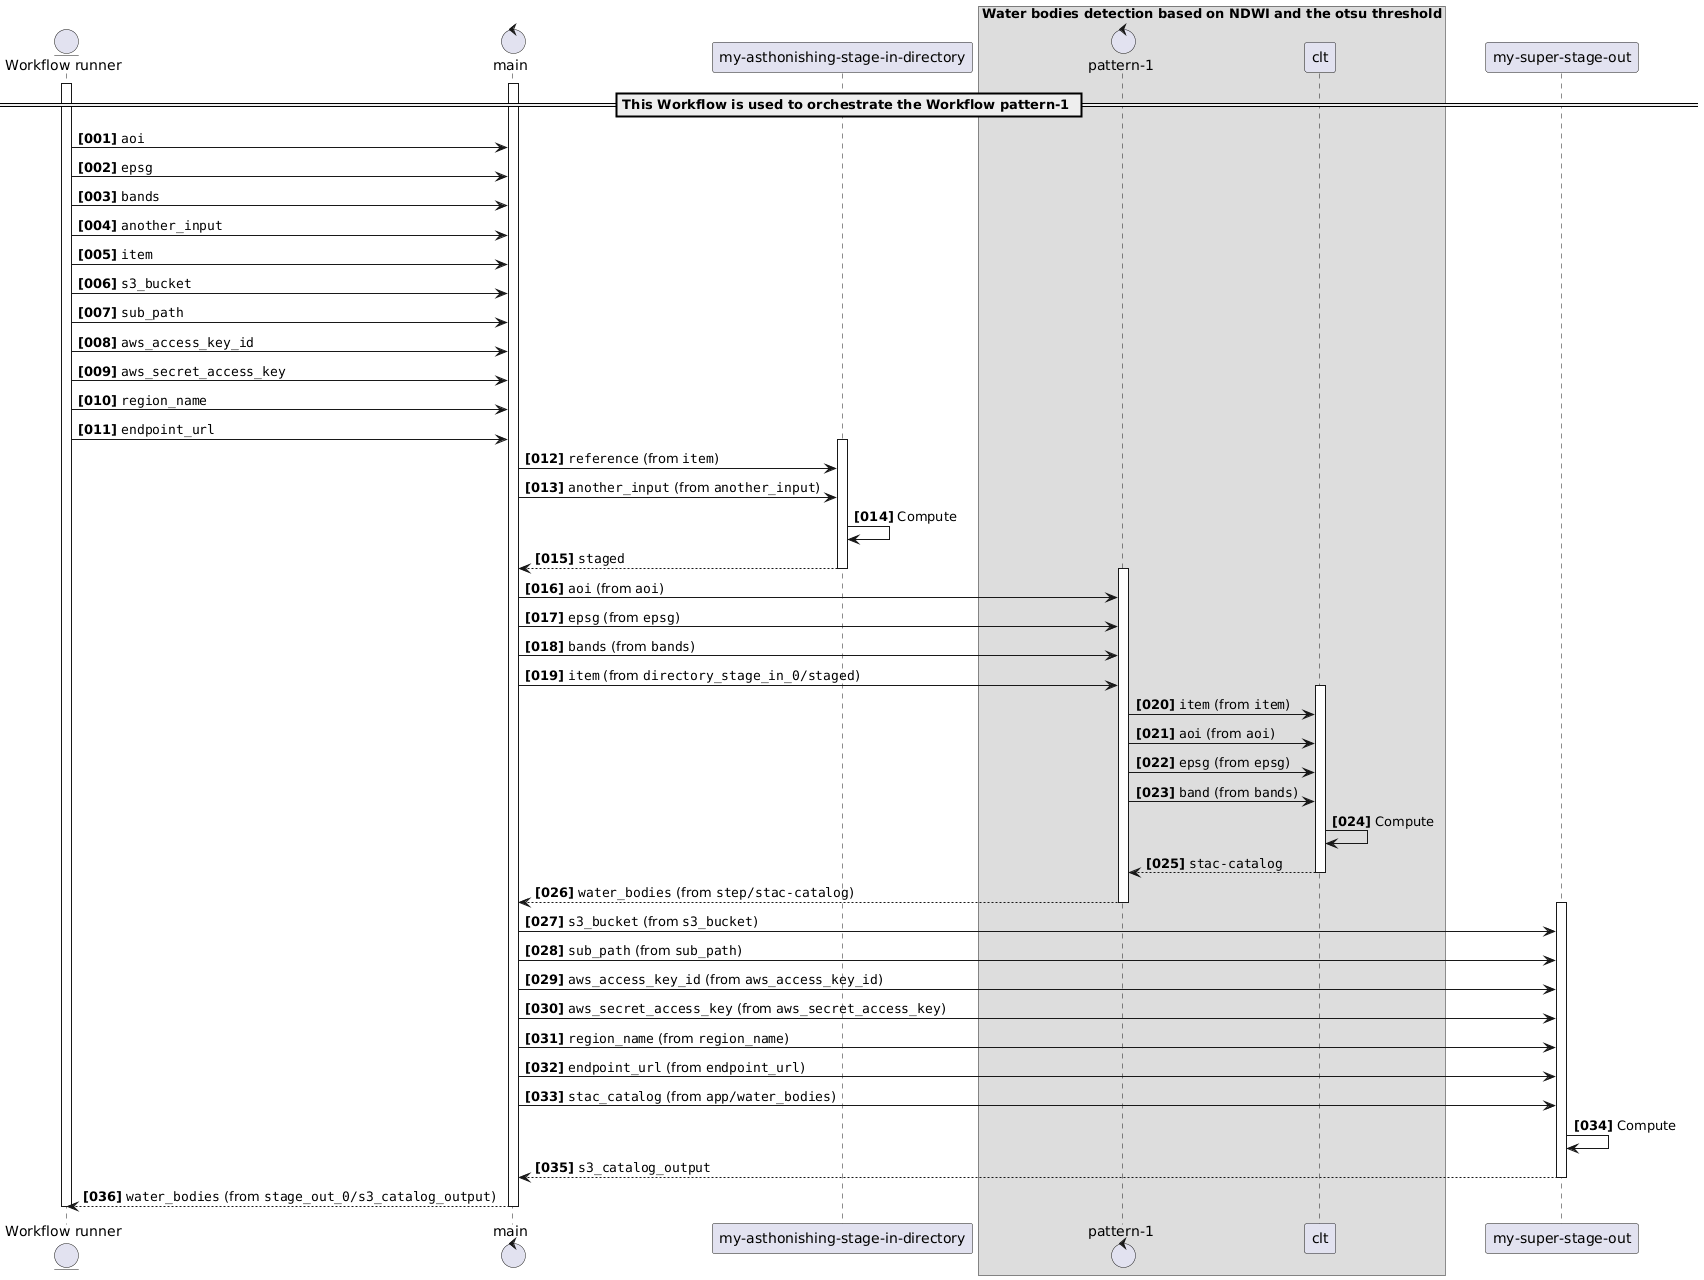

## state diagram

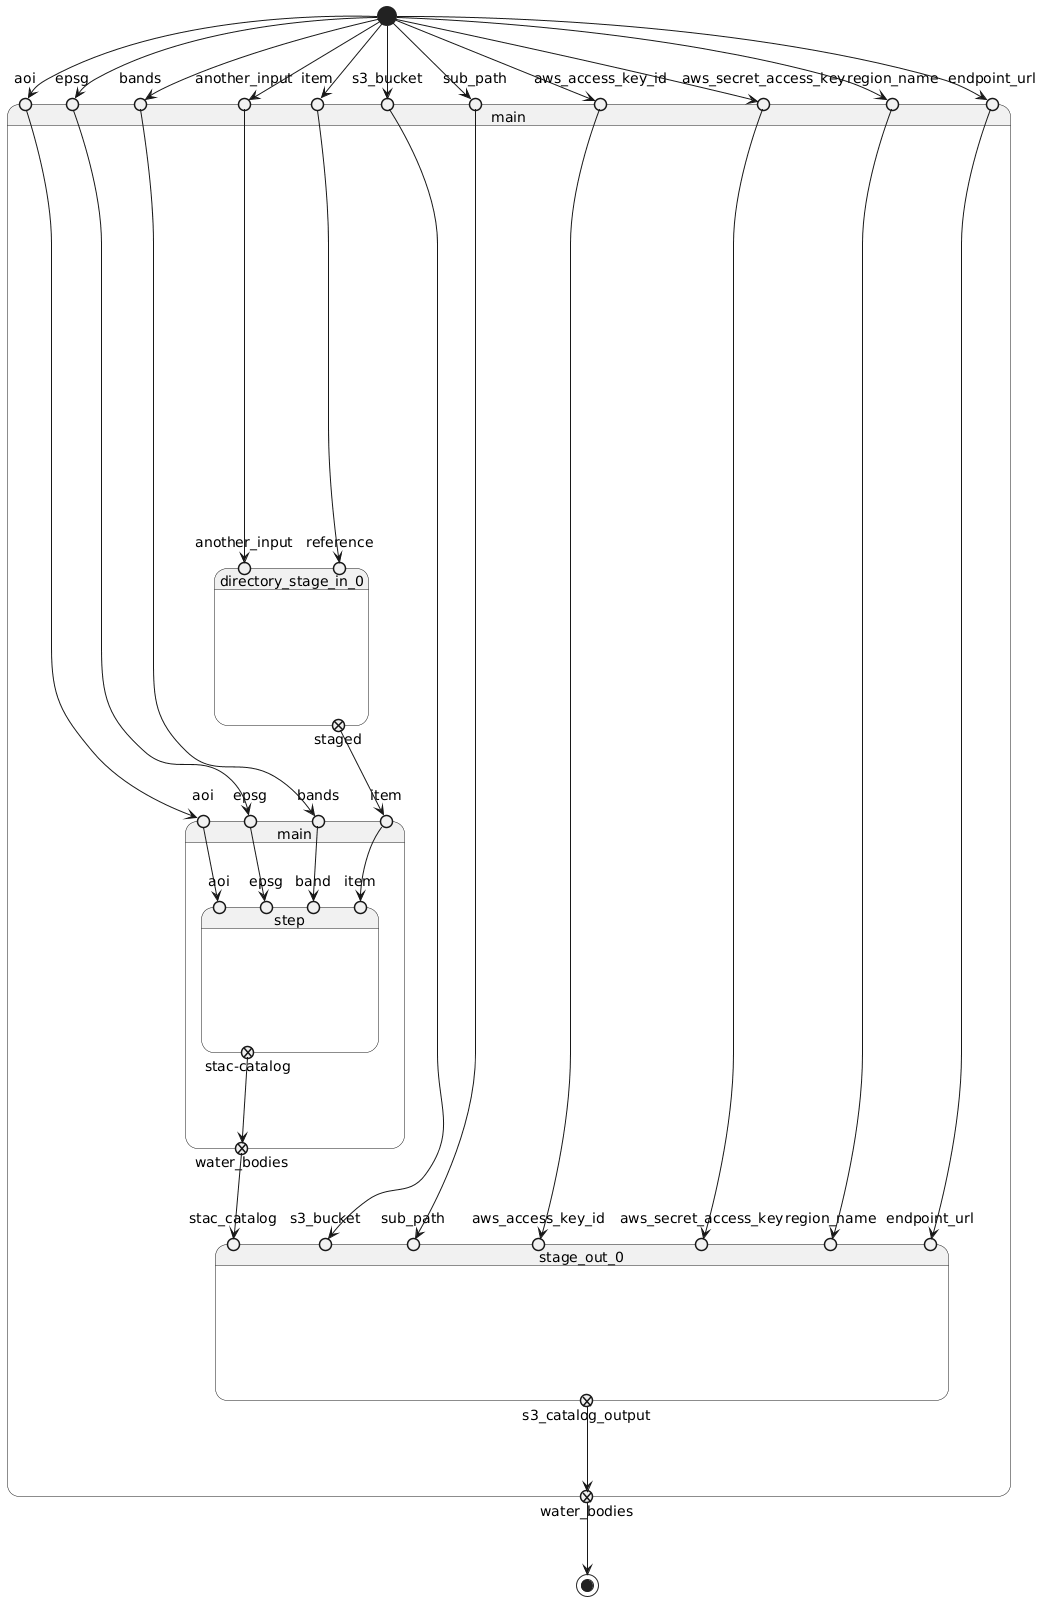

# Pattern 2

## component diagram

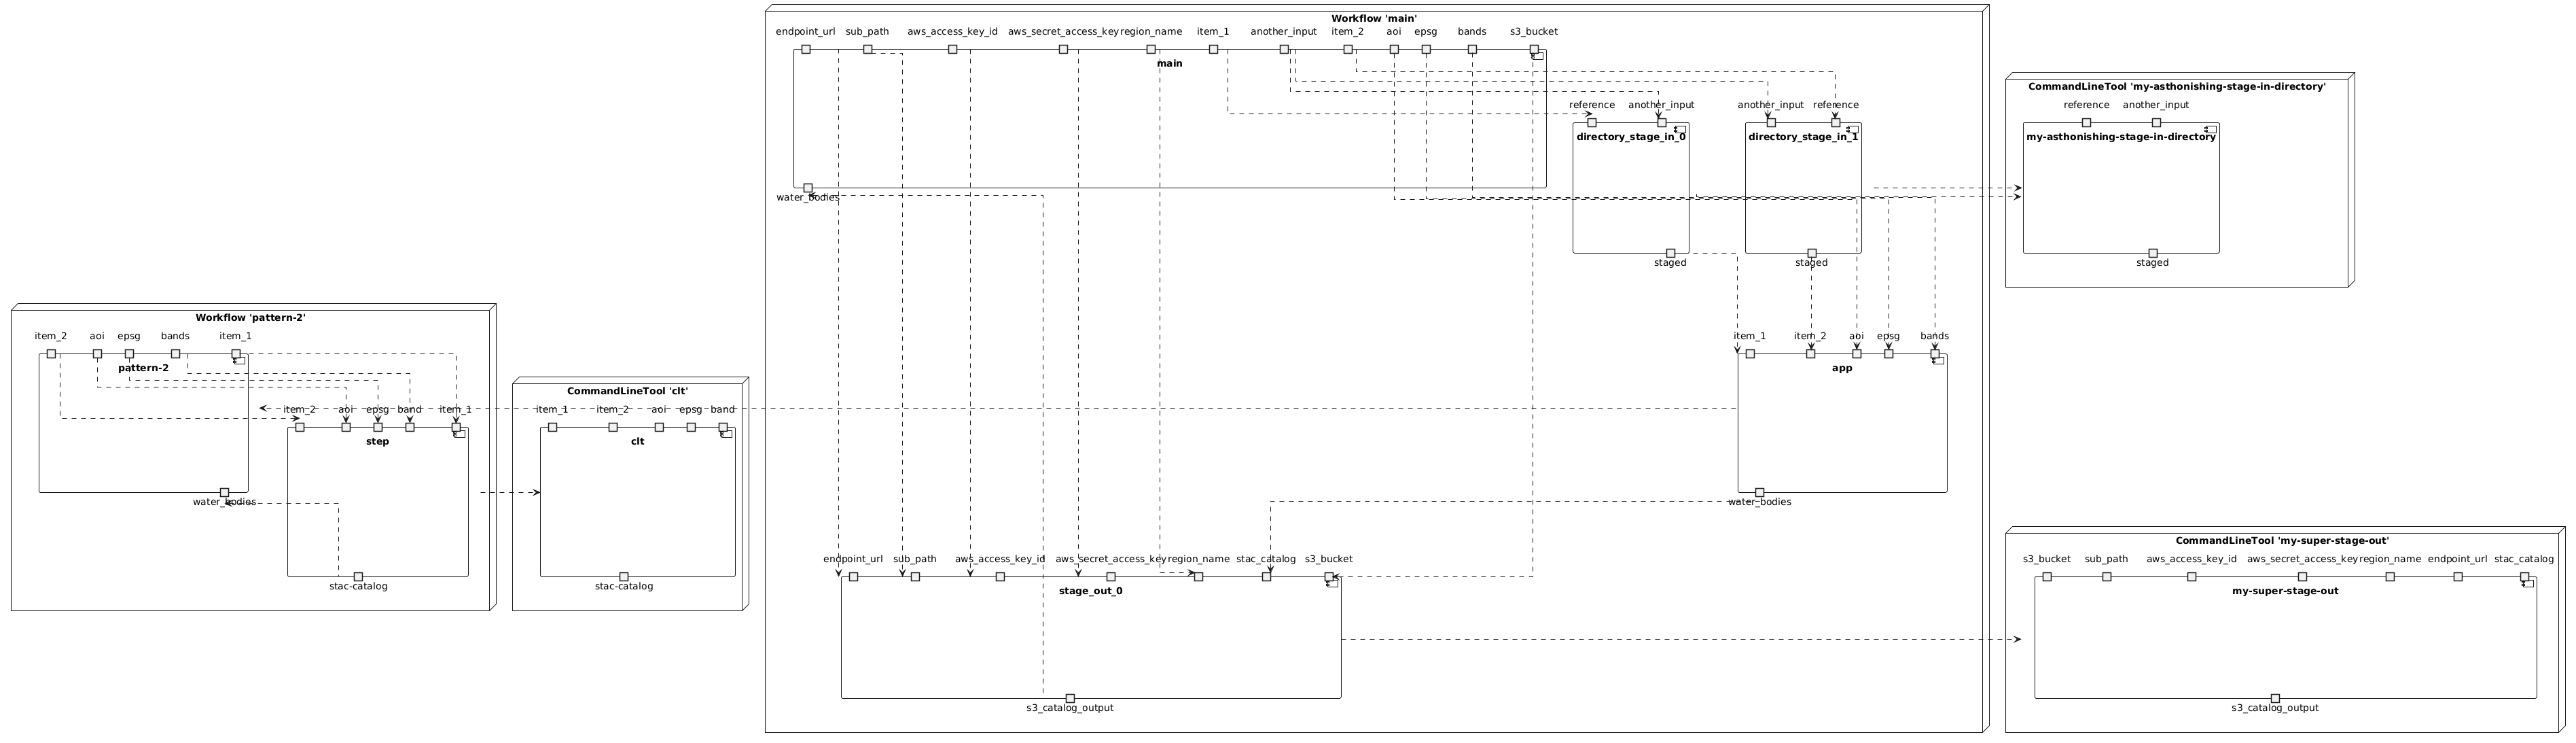

## class diagram

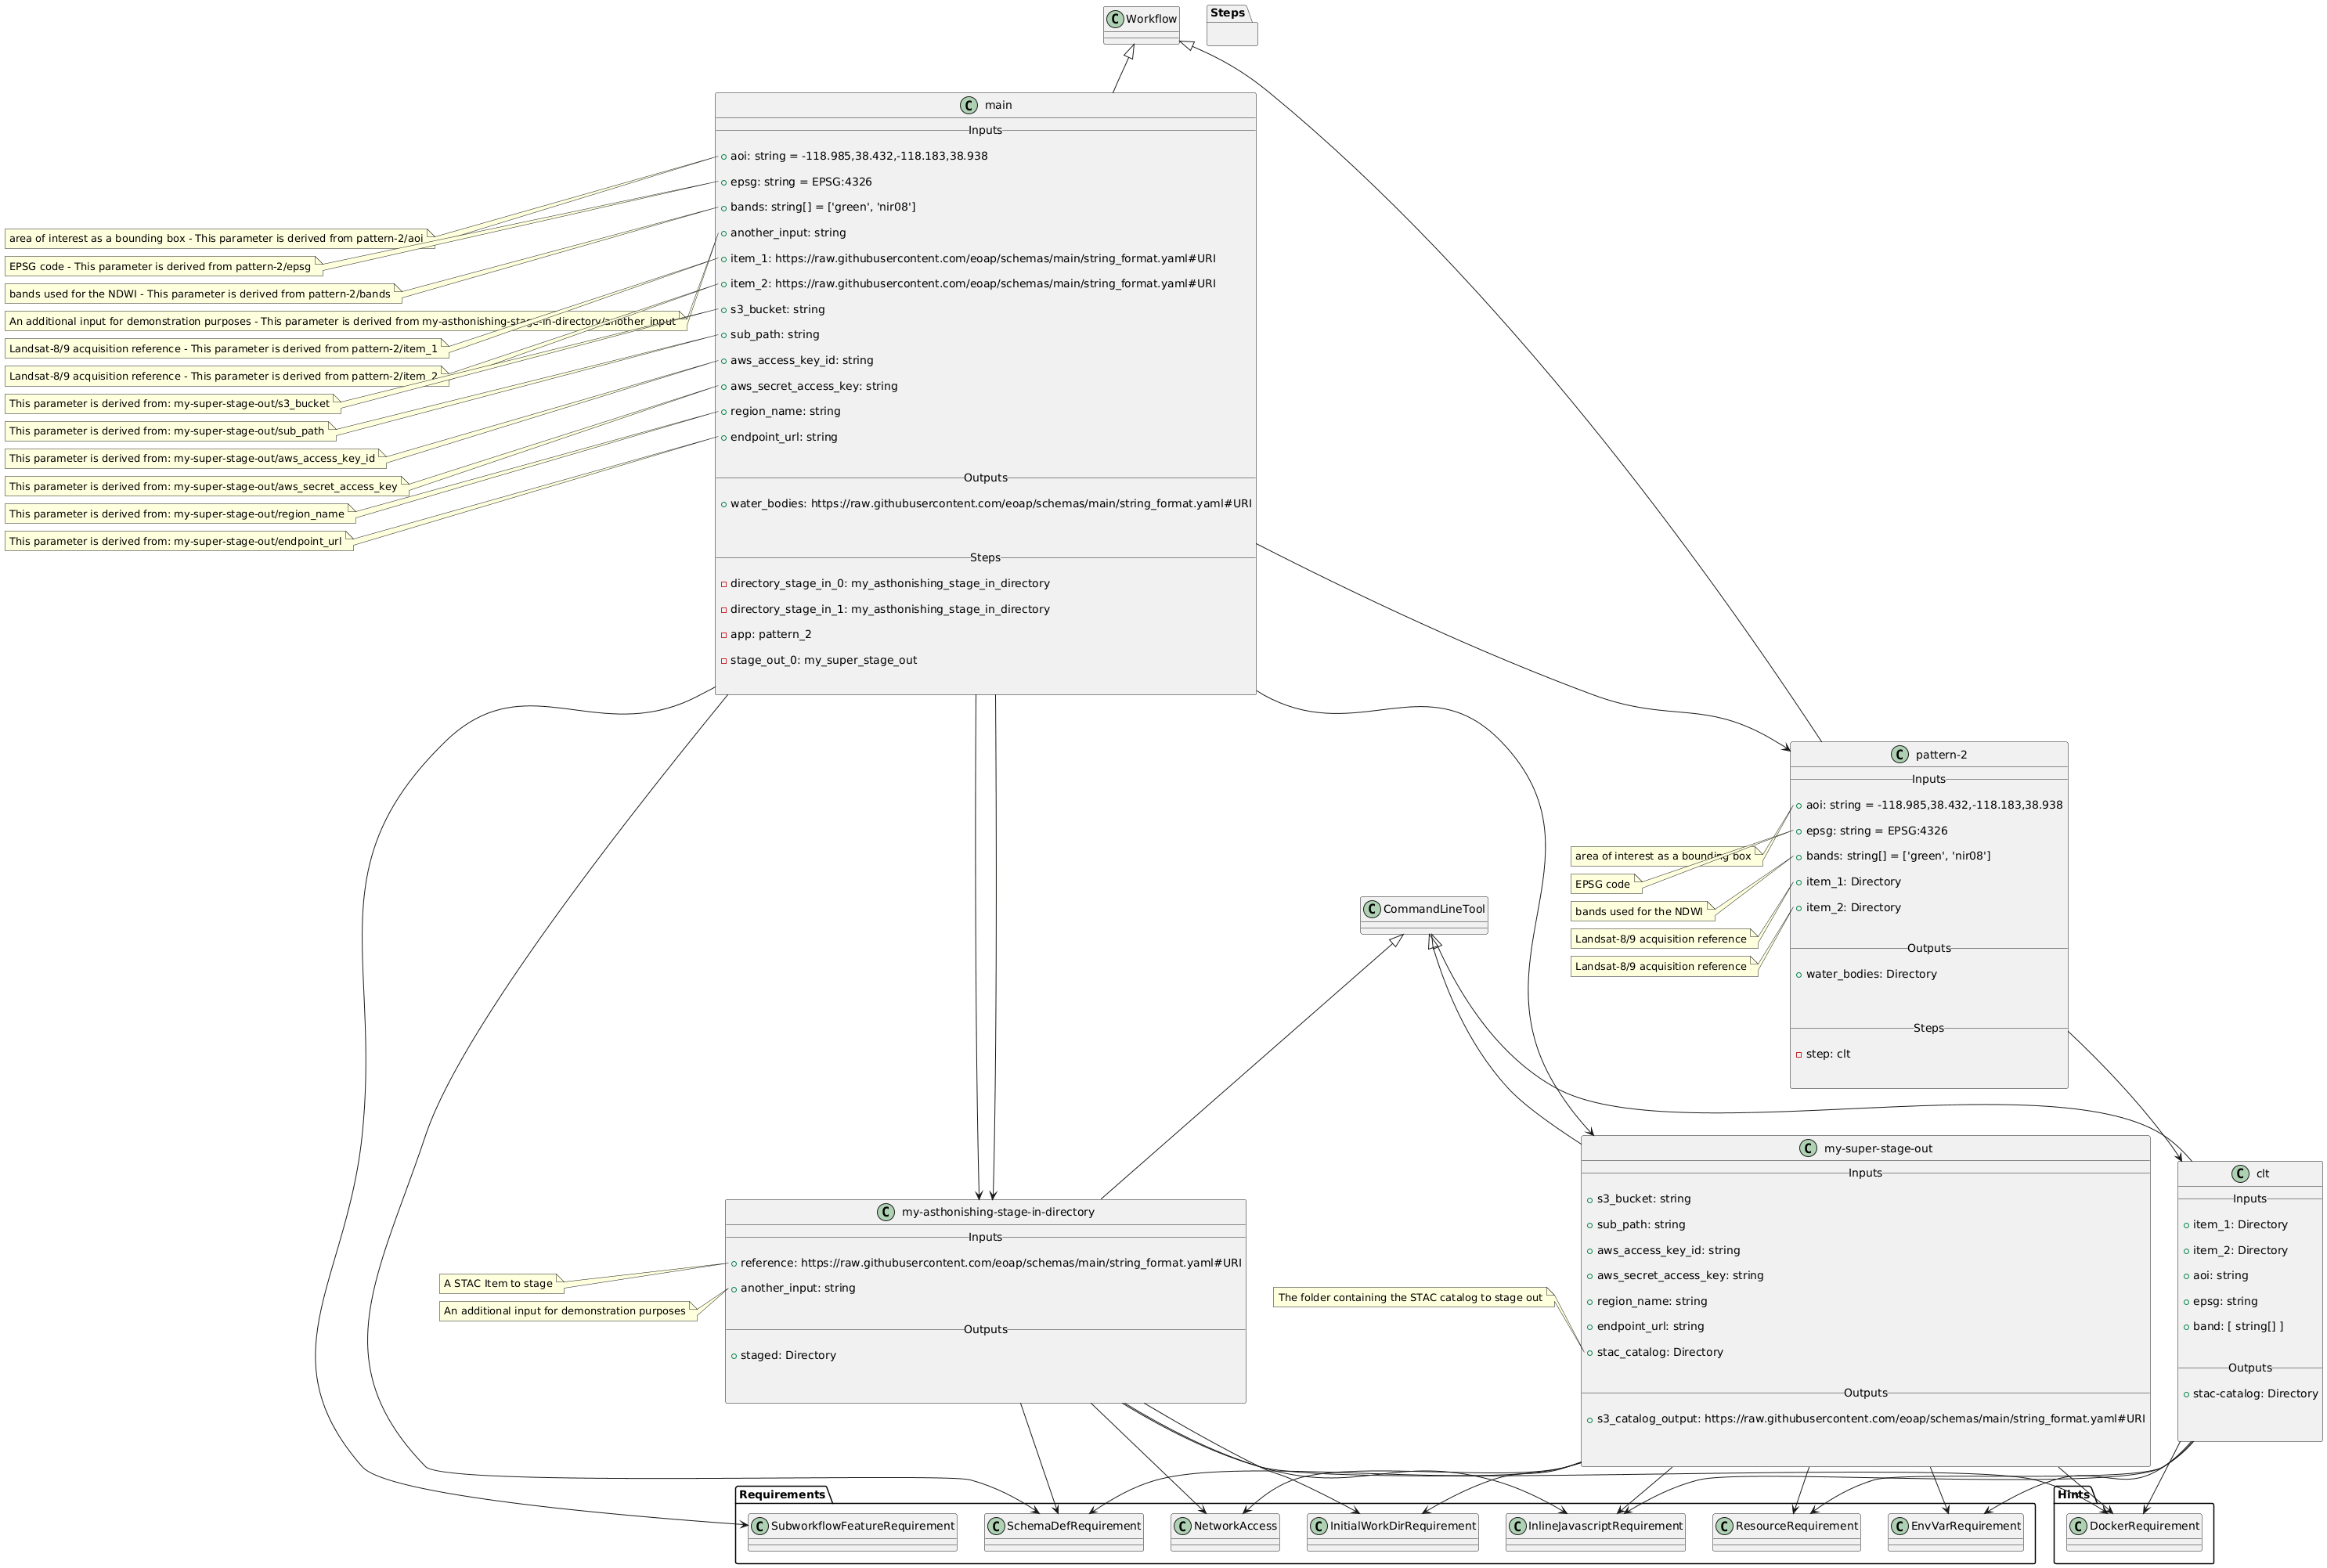

## sequence diagram

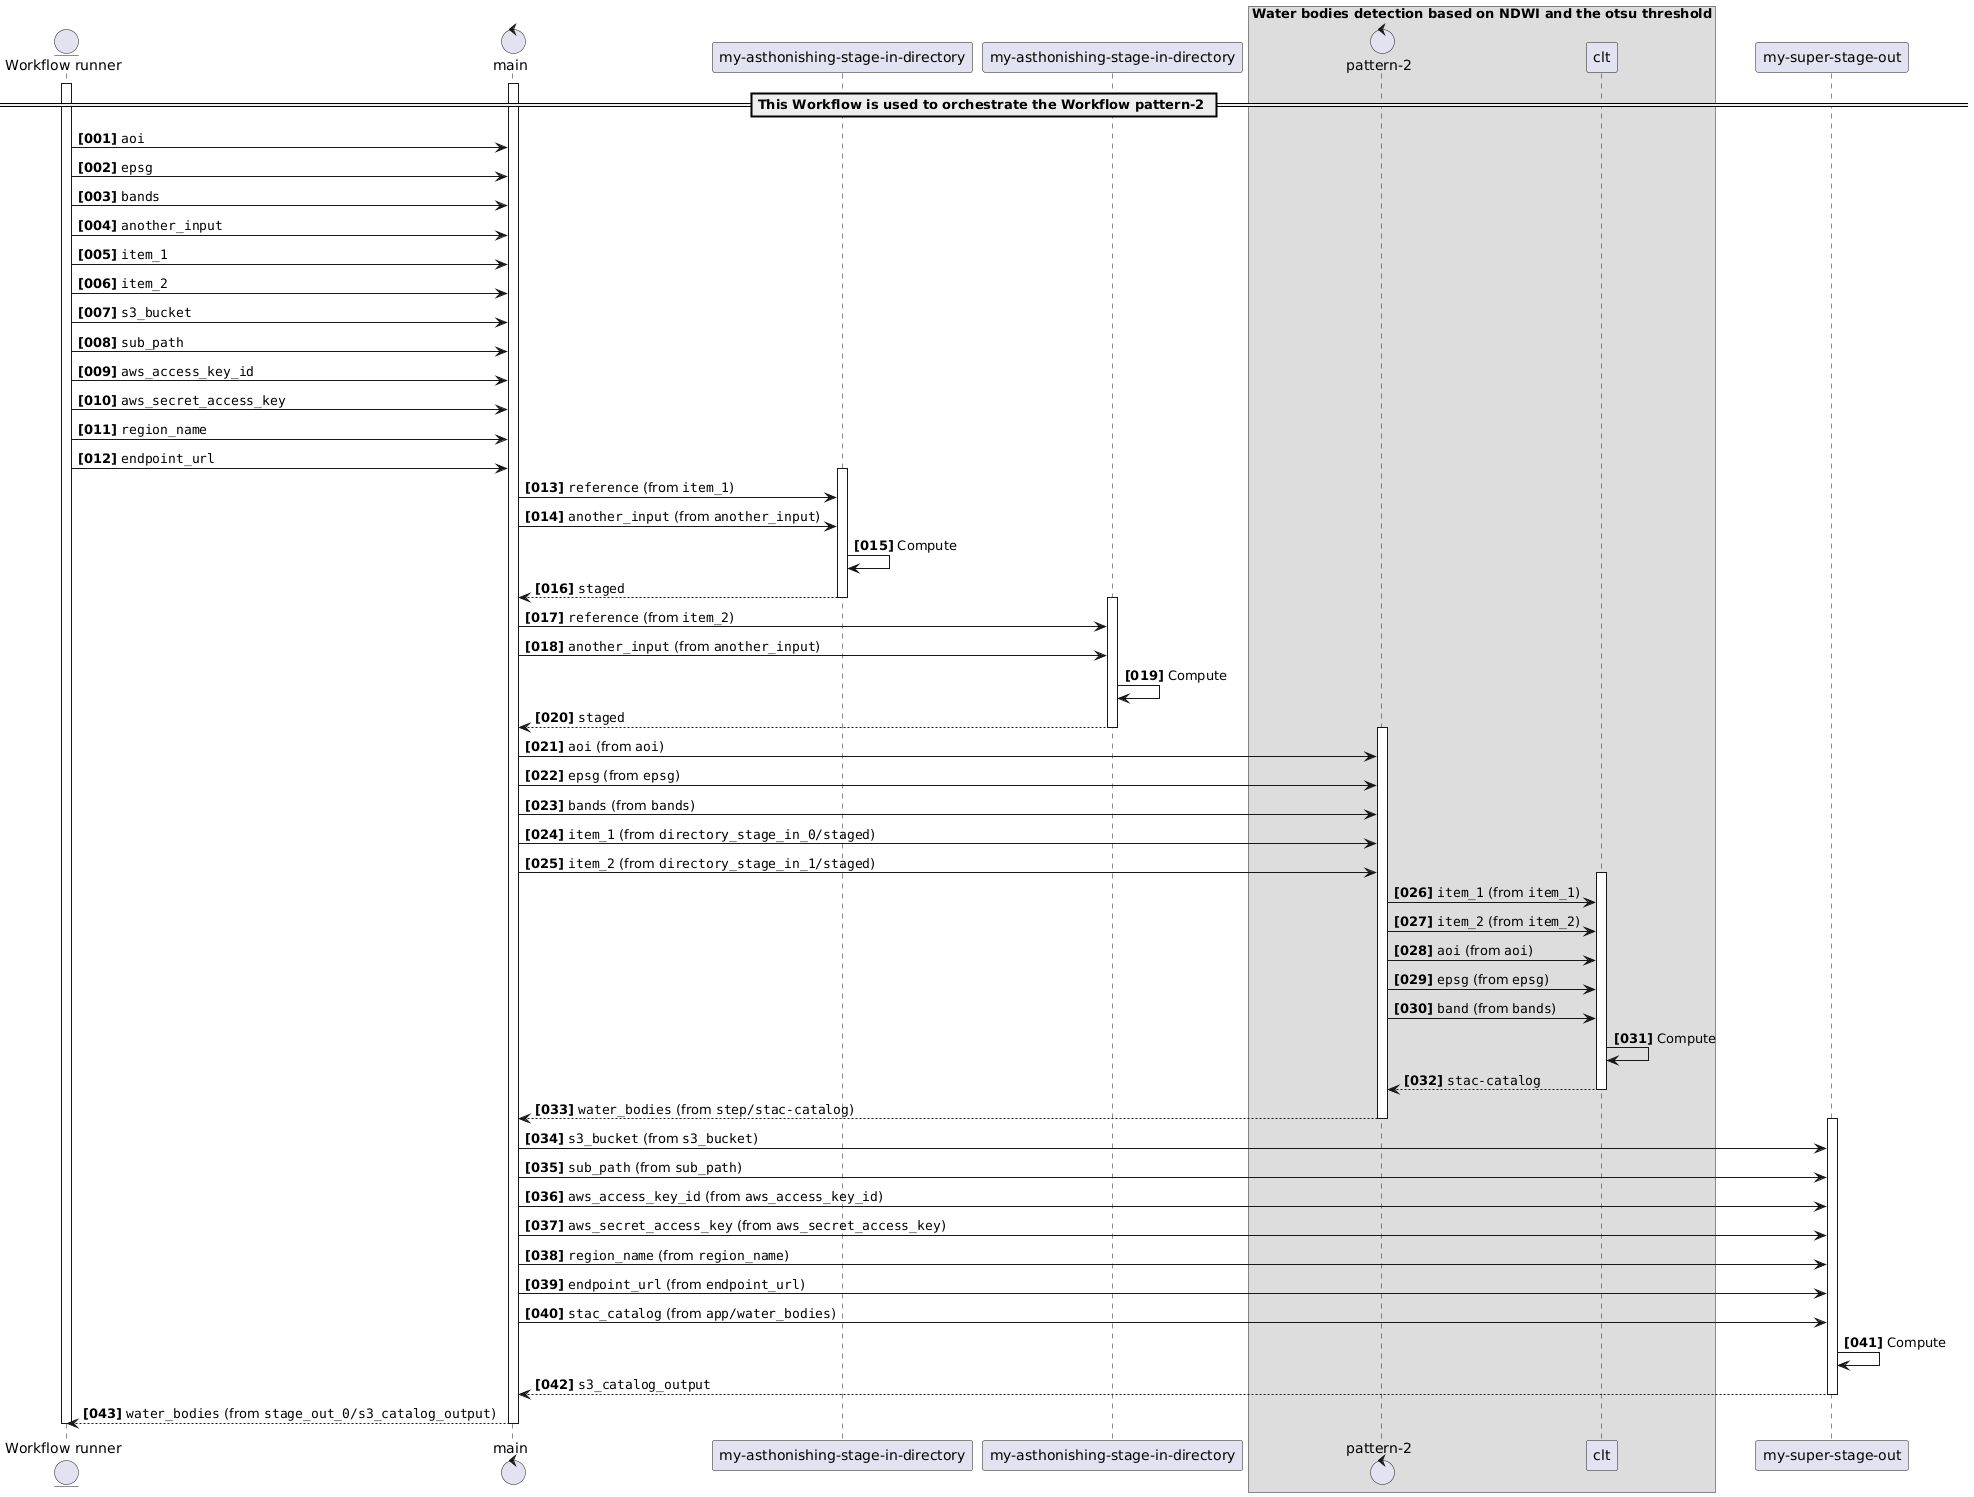

## state diagram

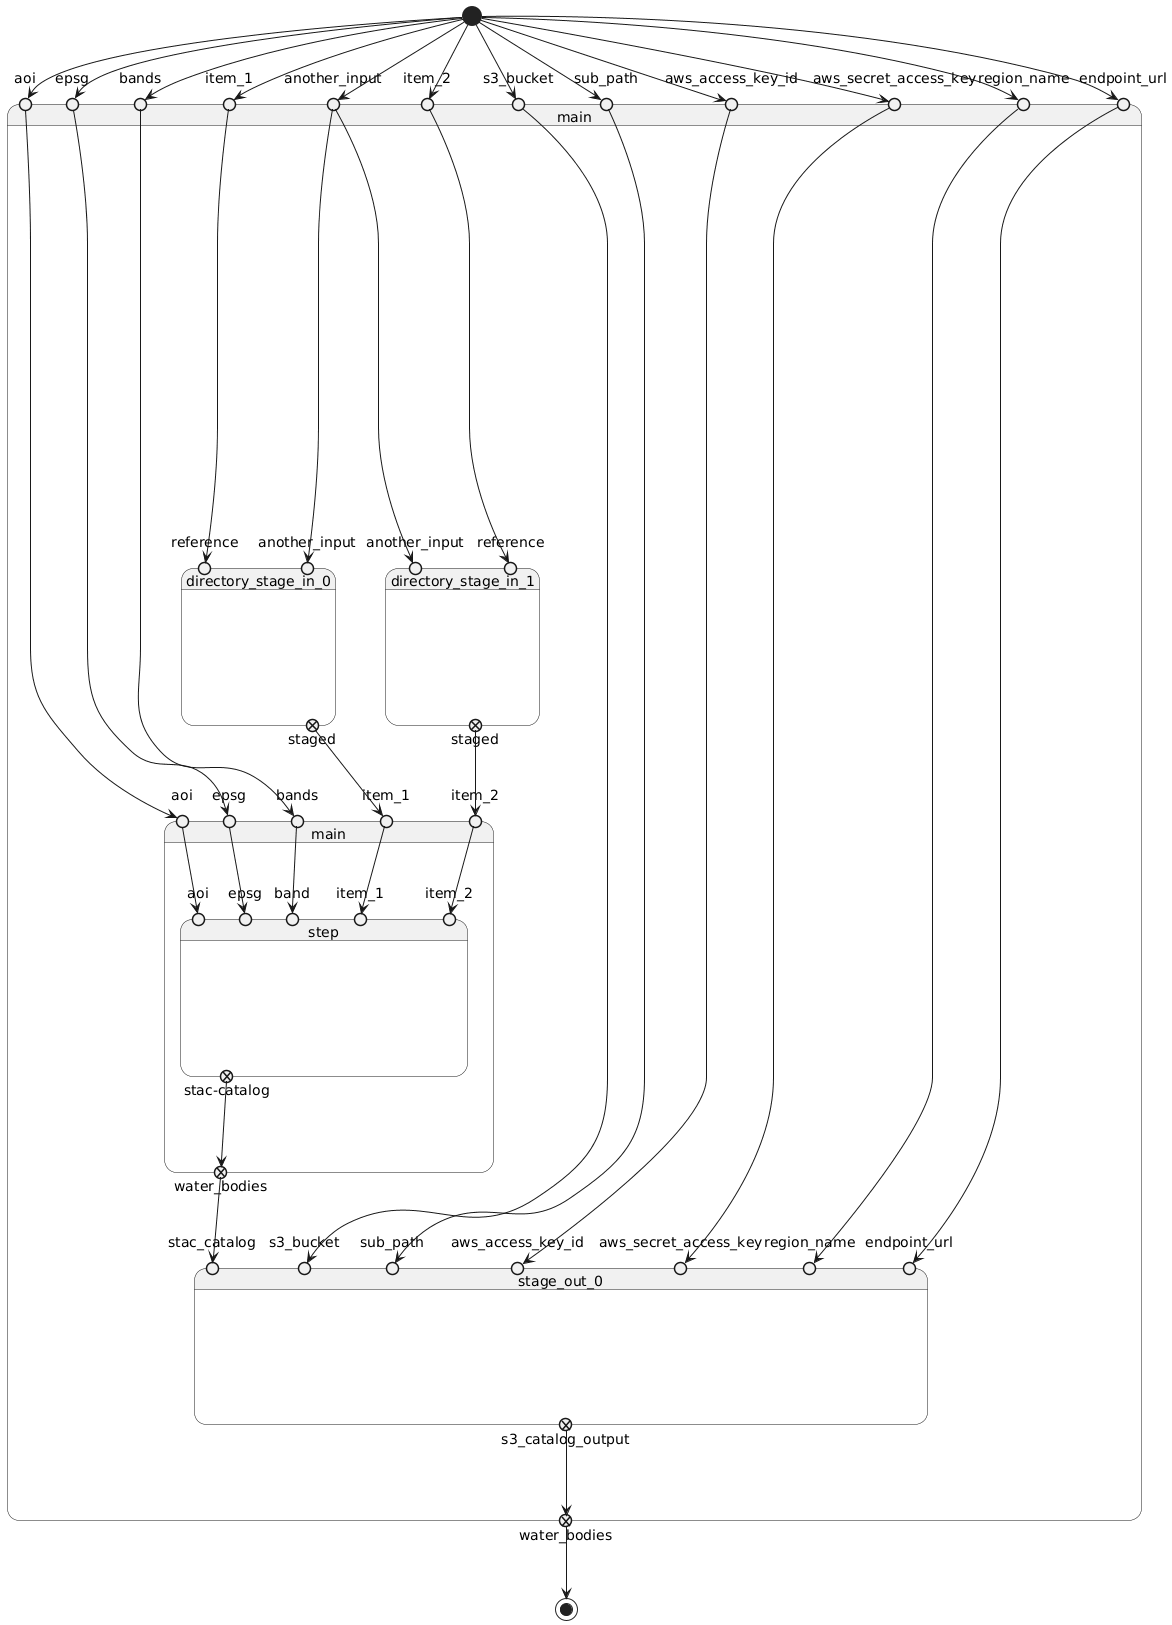

# Pattern 3

## component diagram

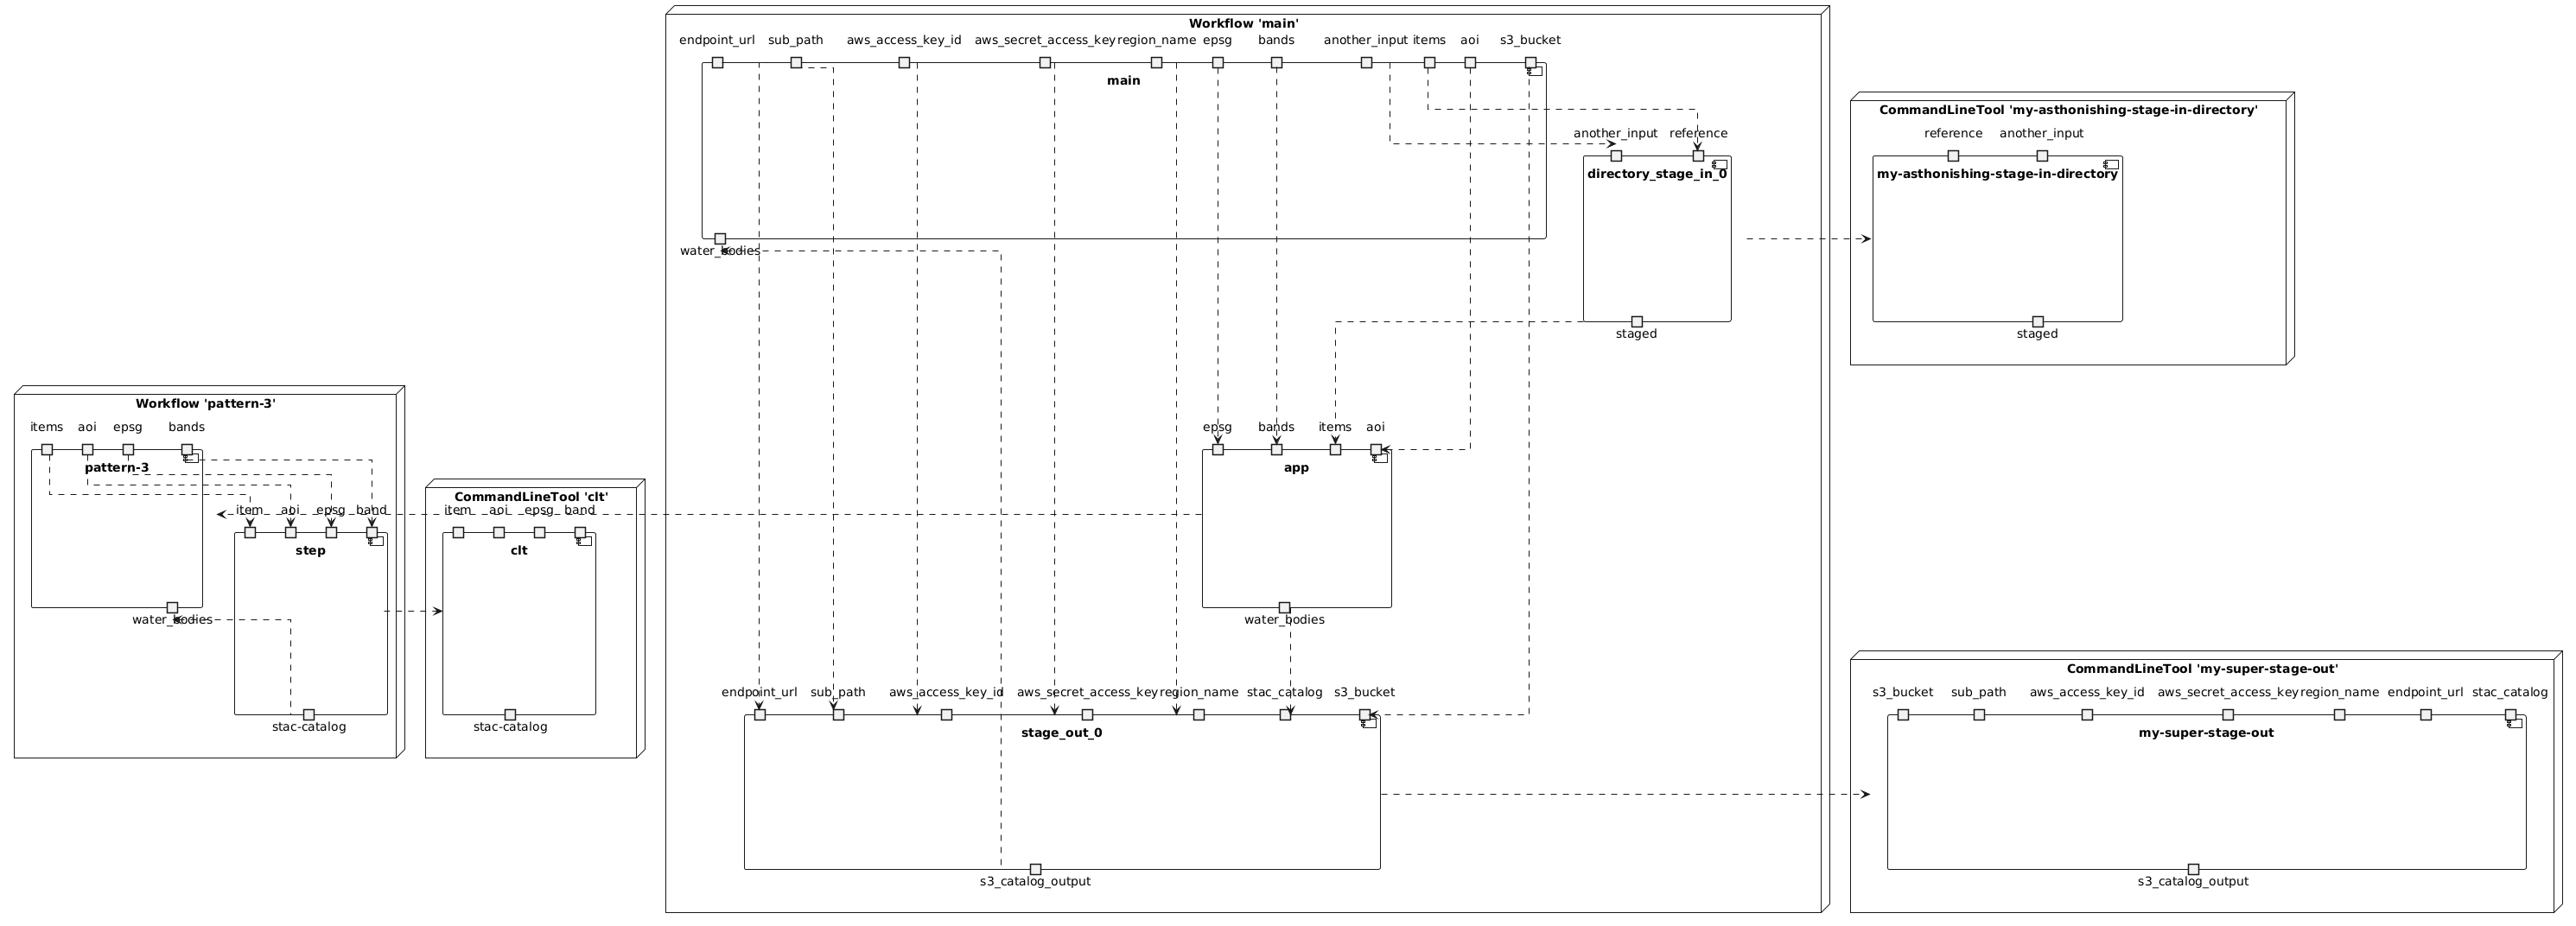

## class diagram

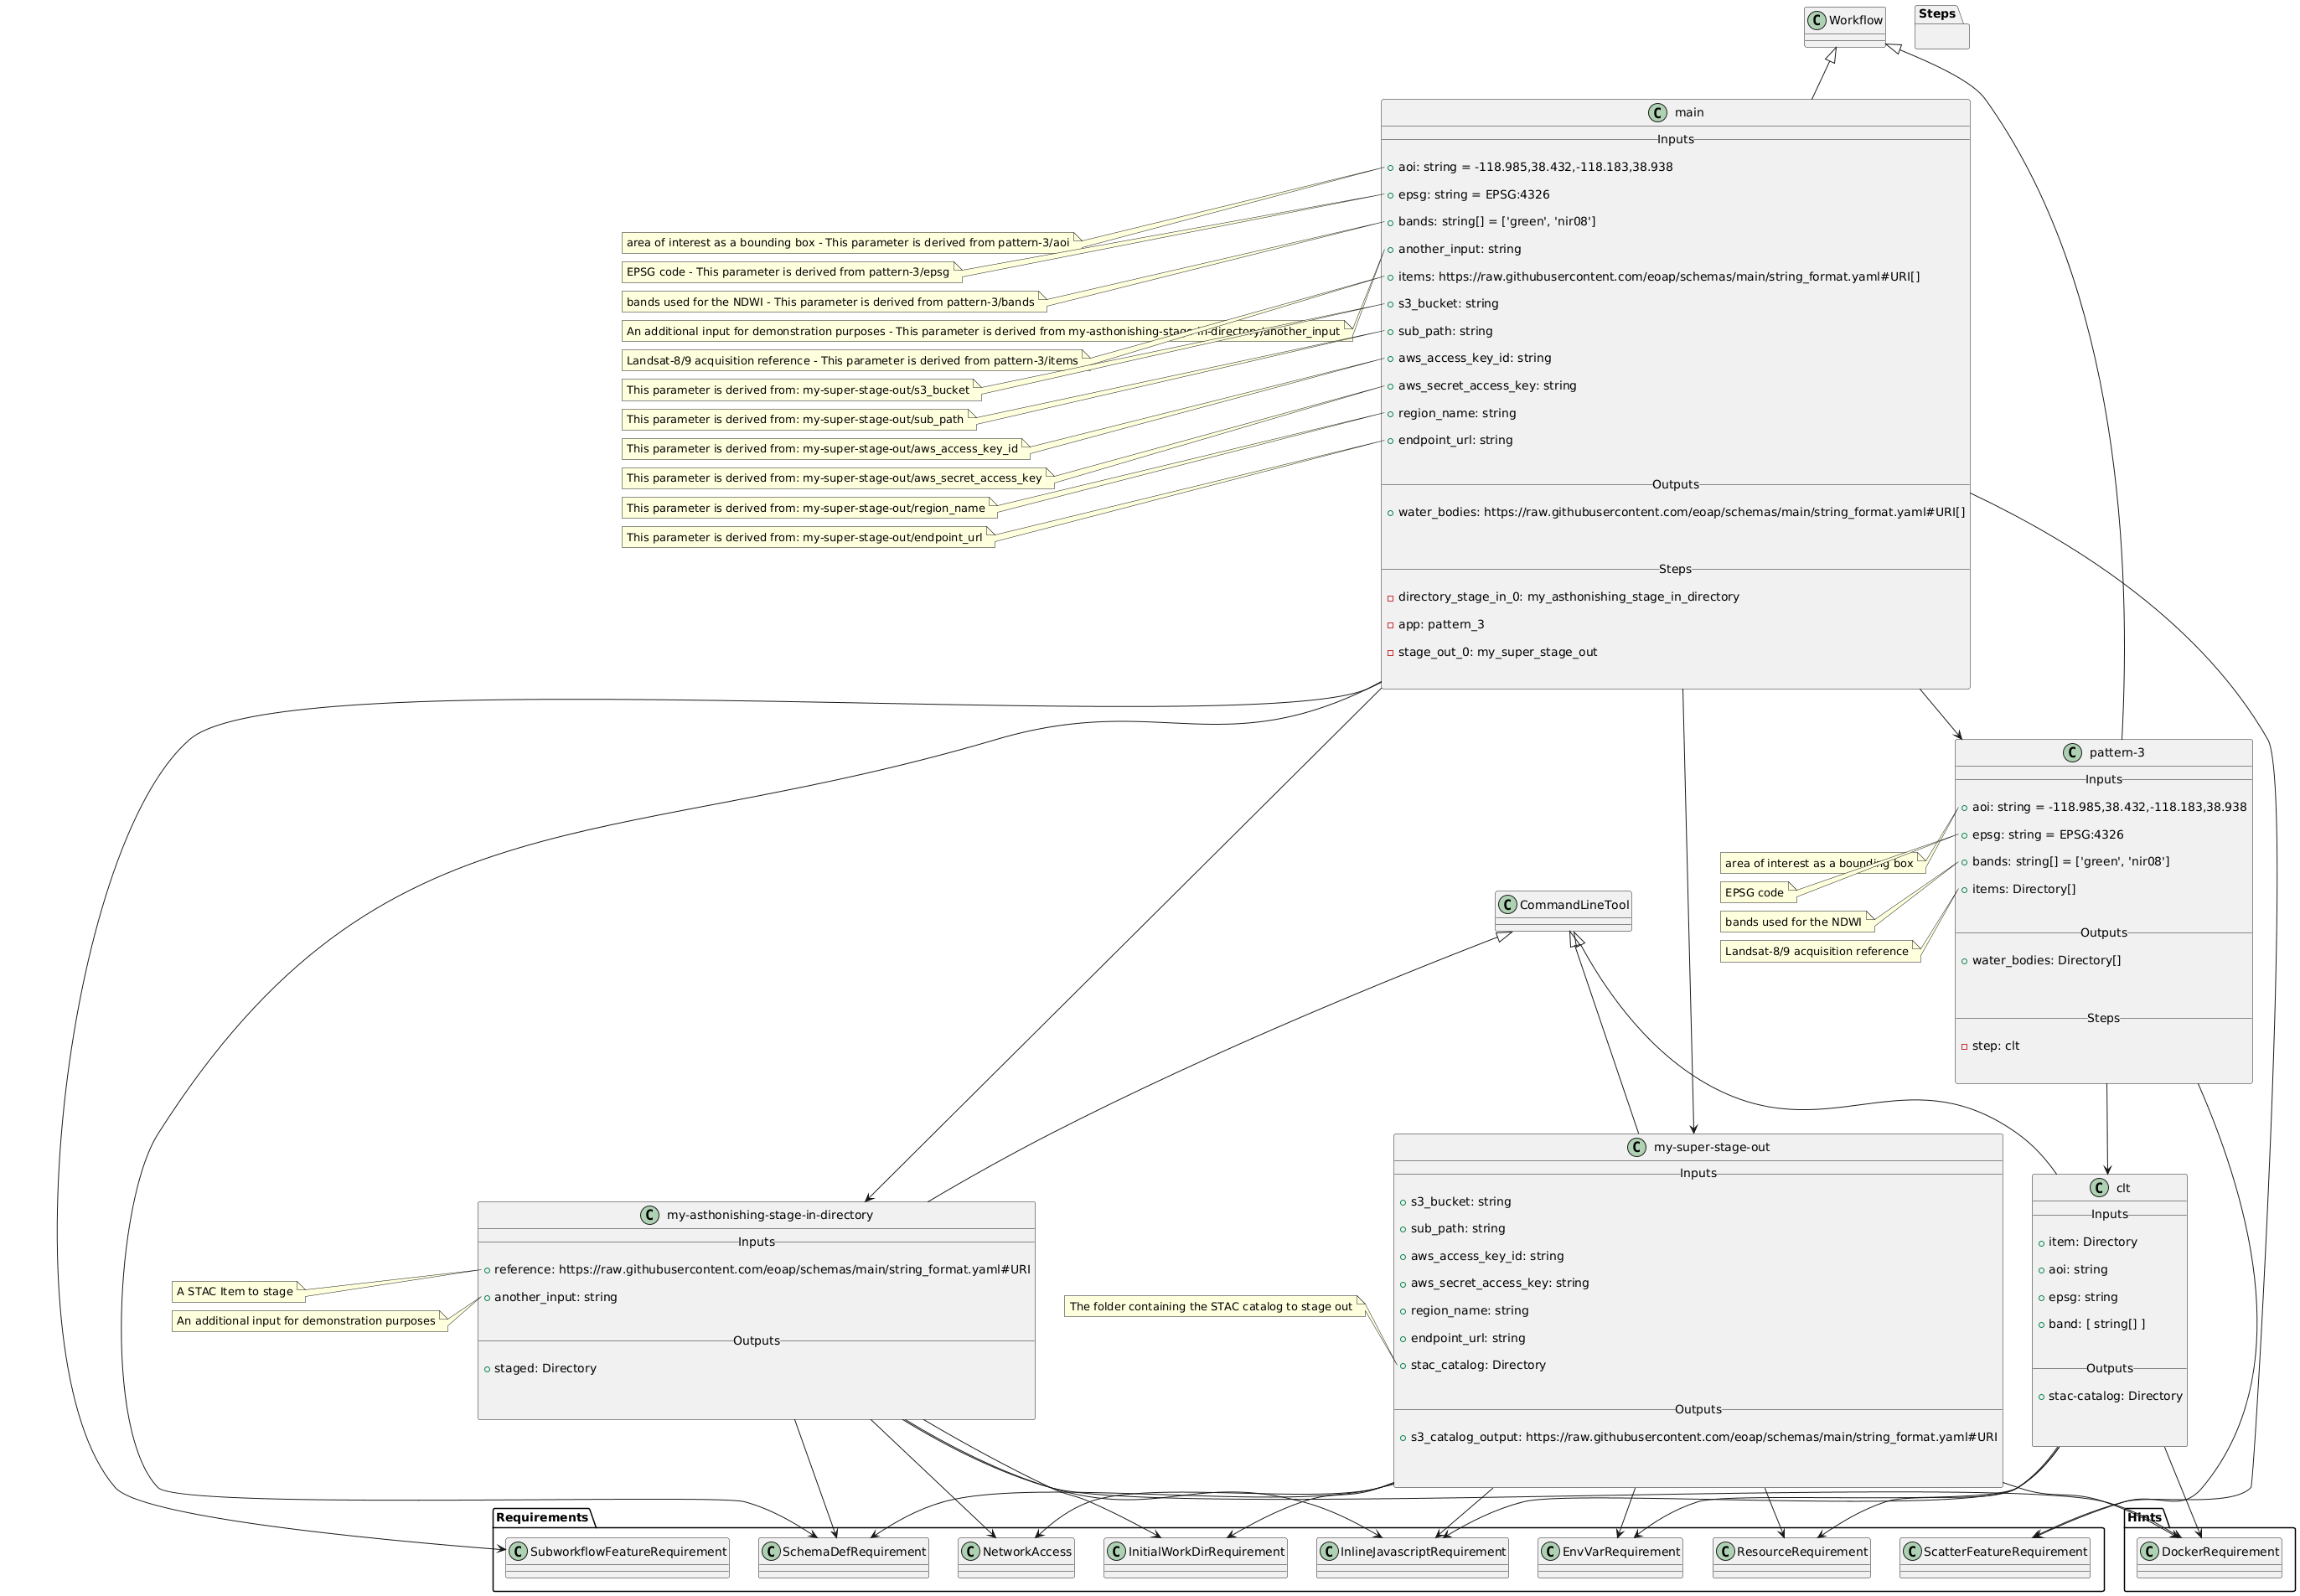

## sequence diagram

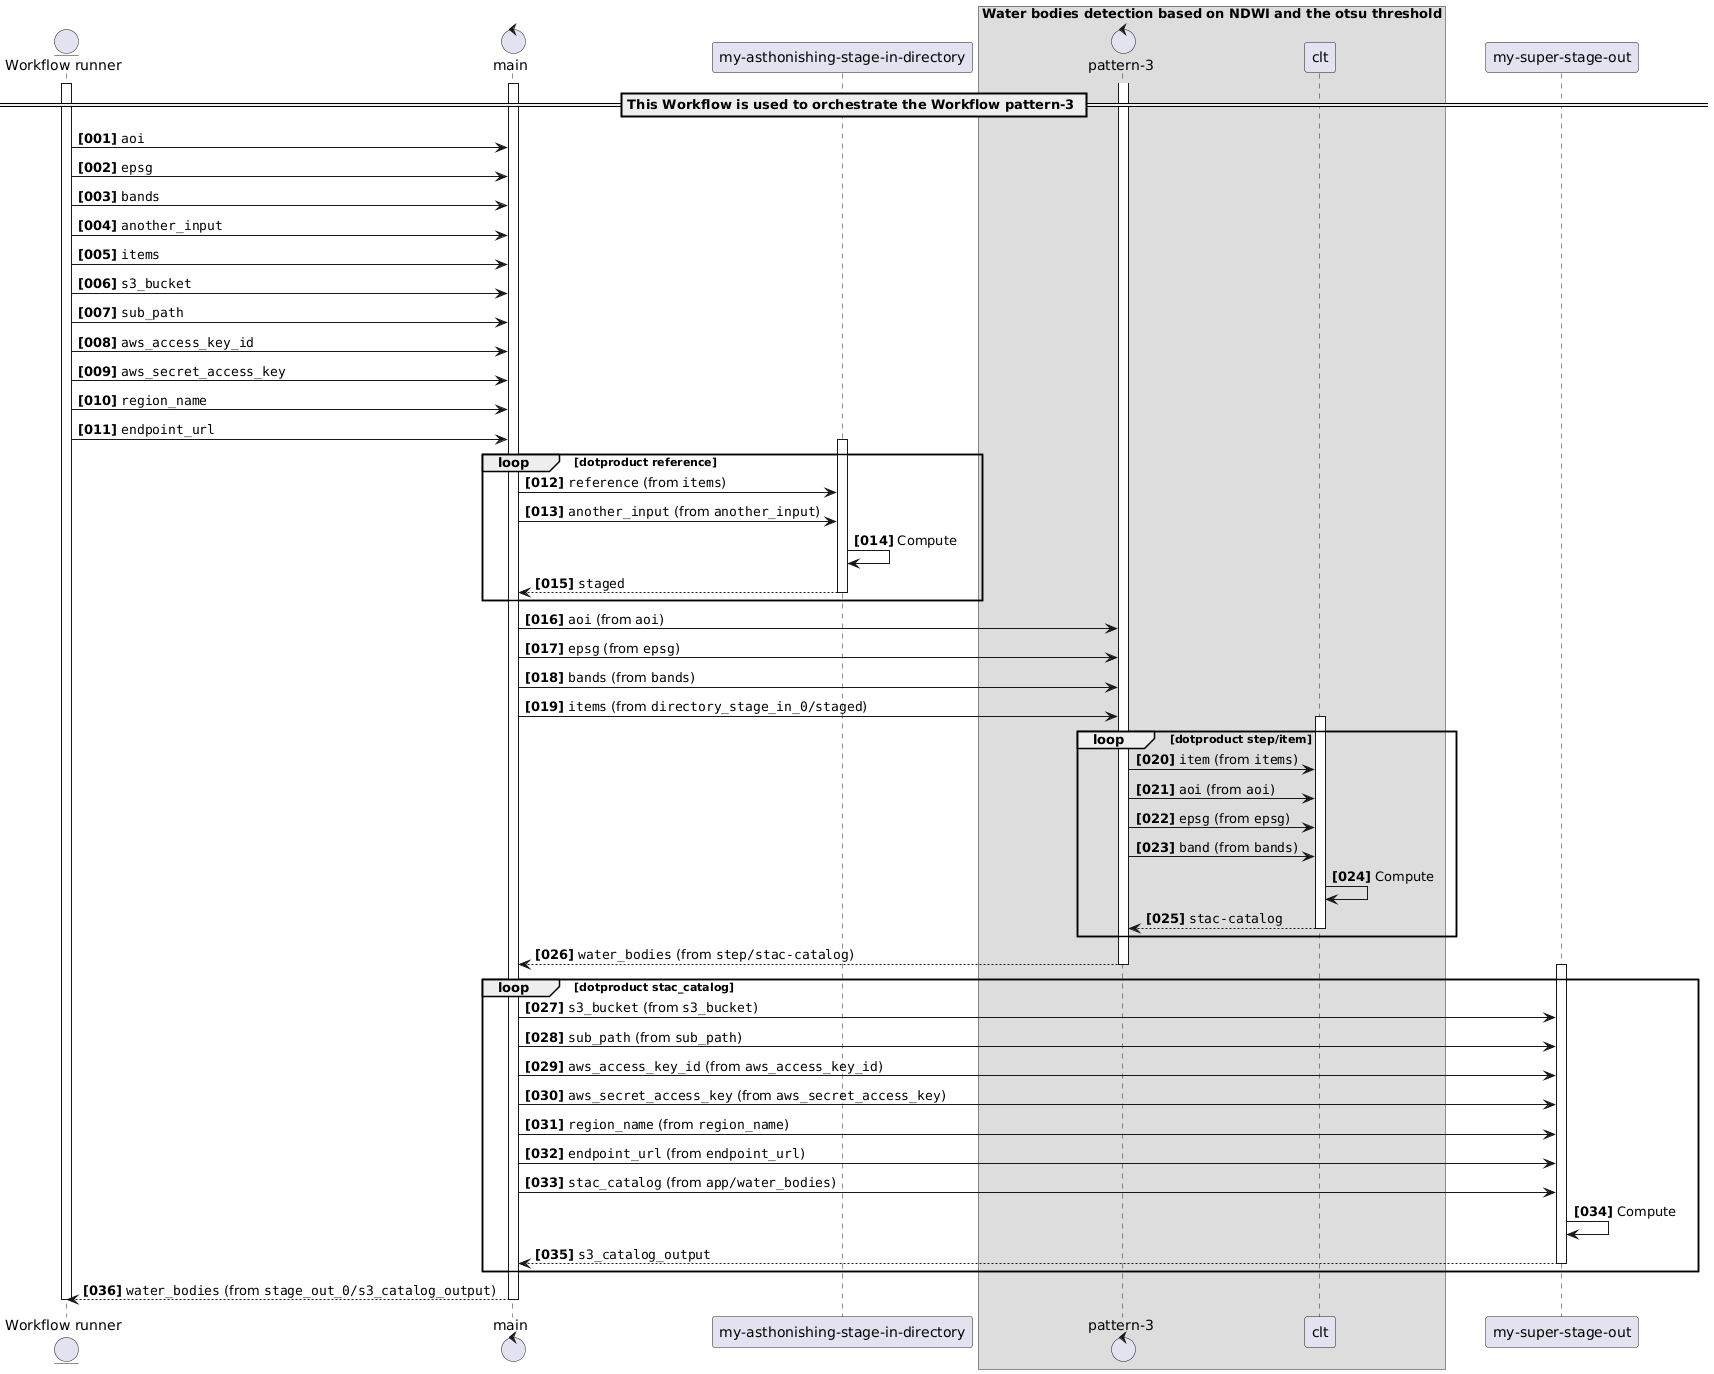

## state diagram

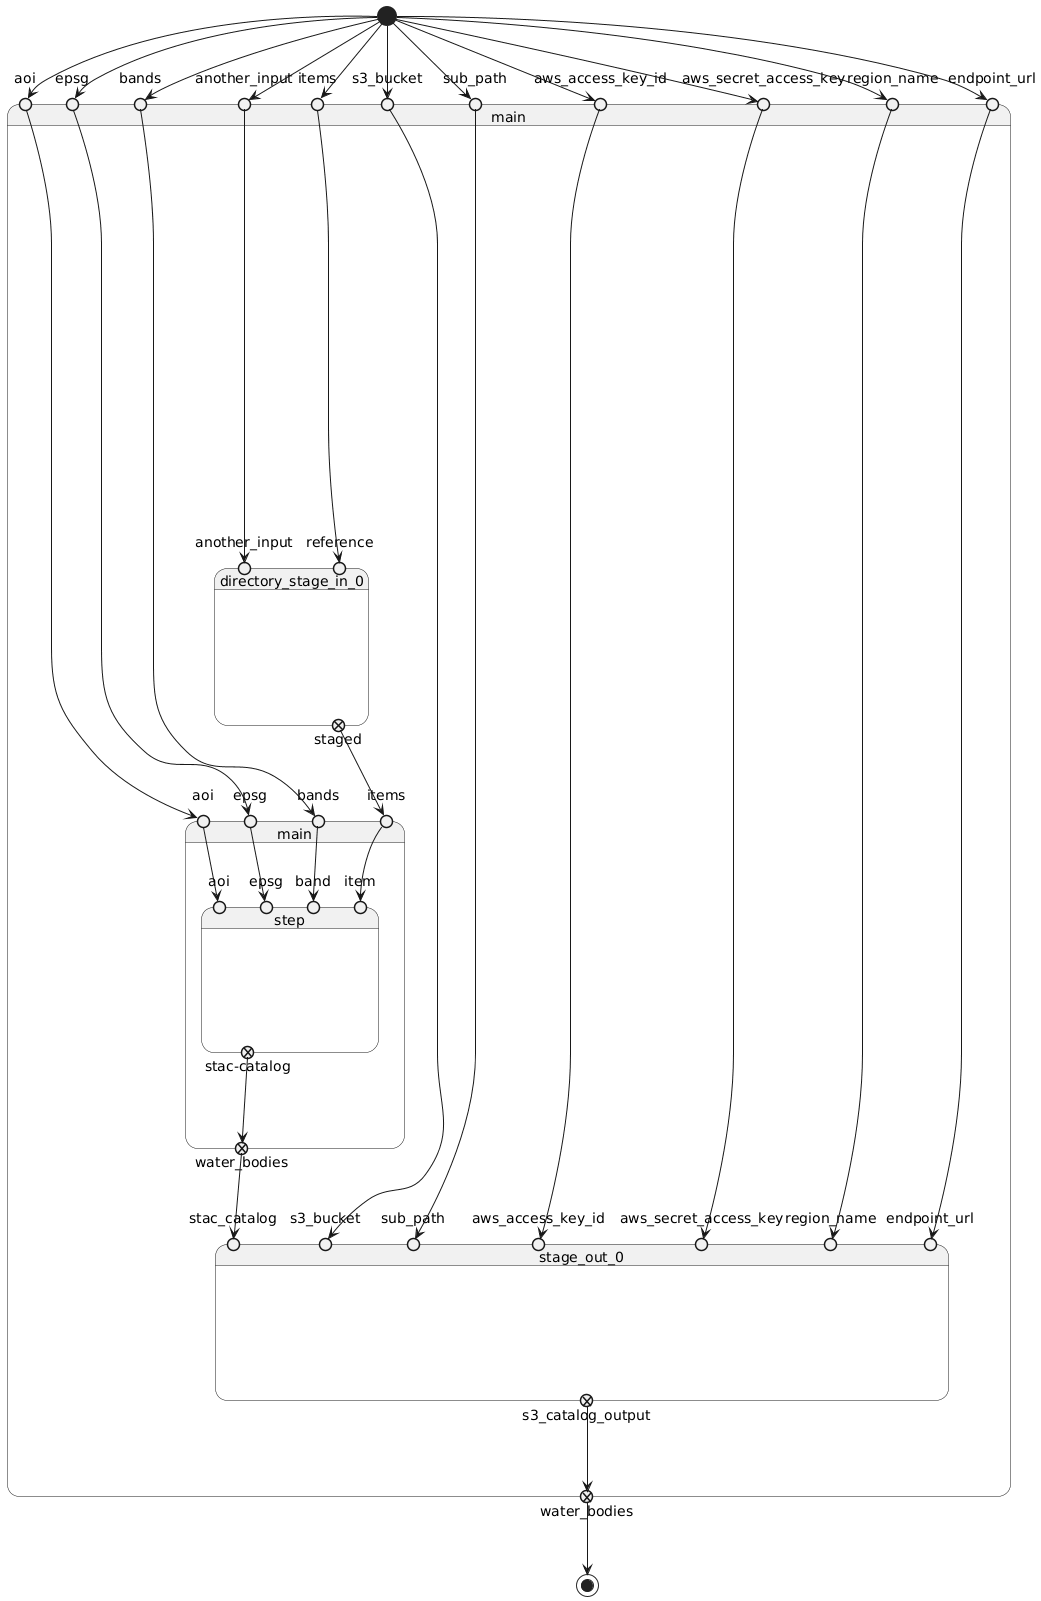

# Pattern 4

## component diagram

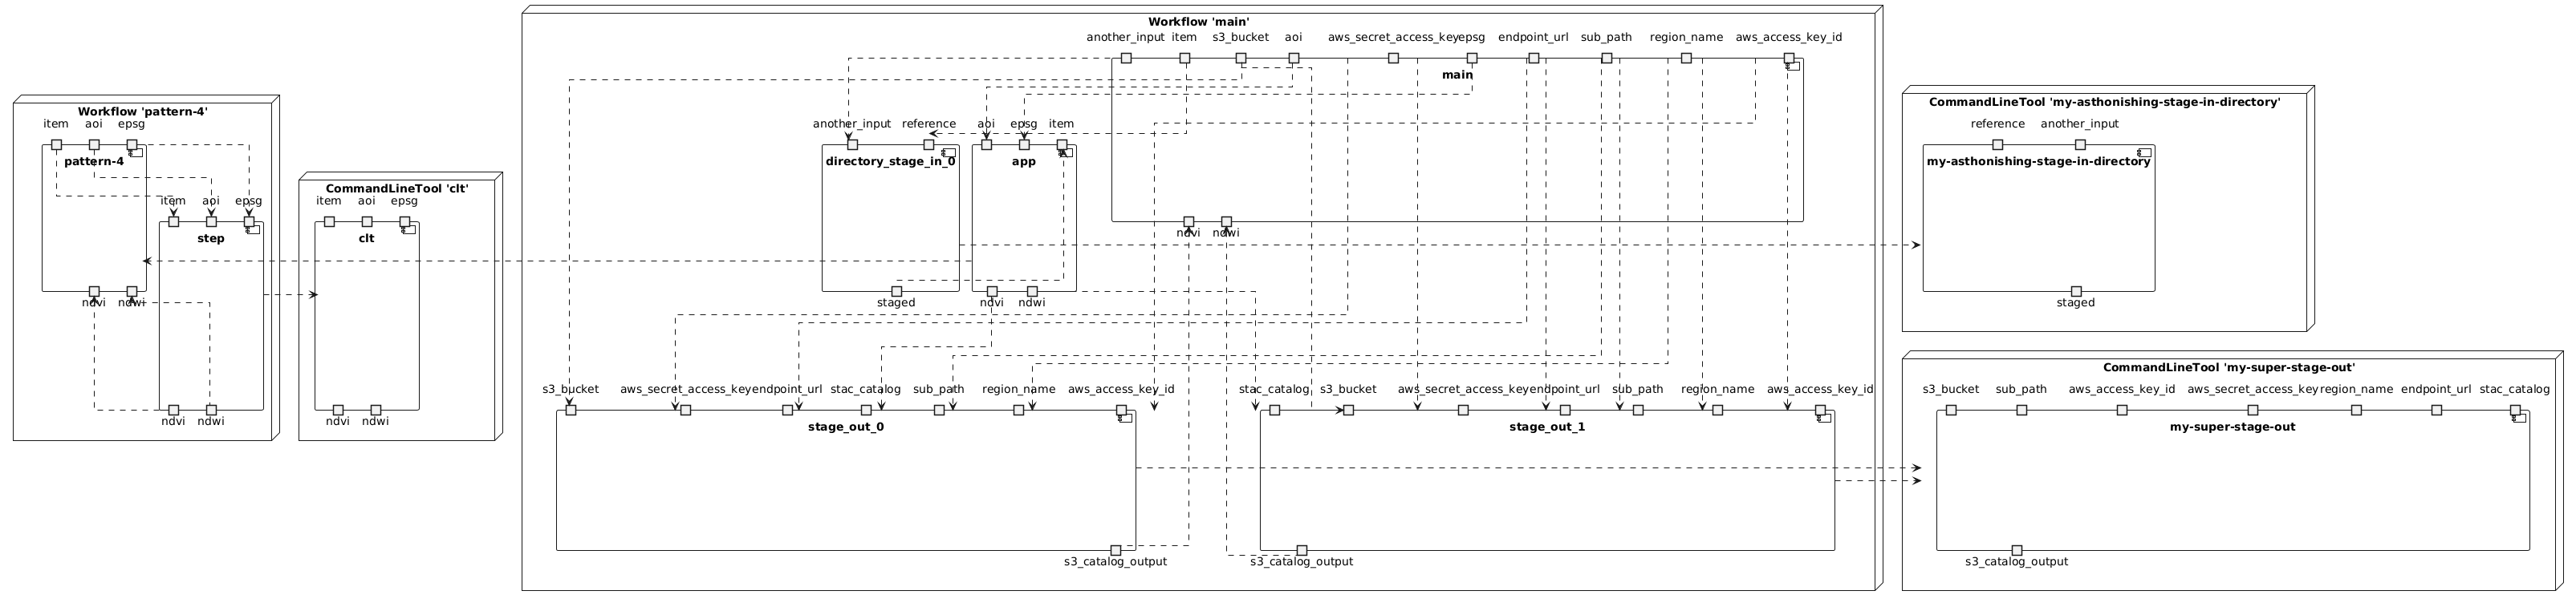

## class diagram

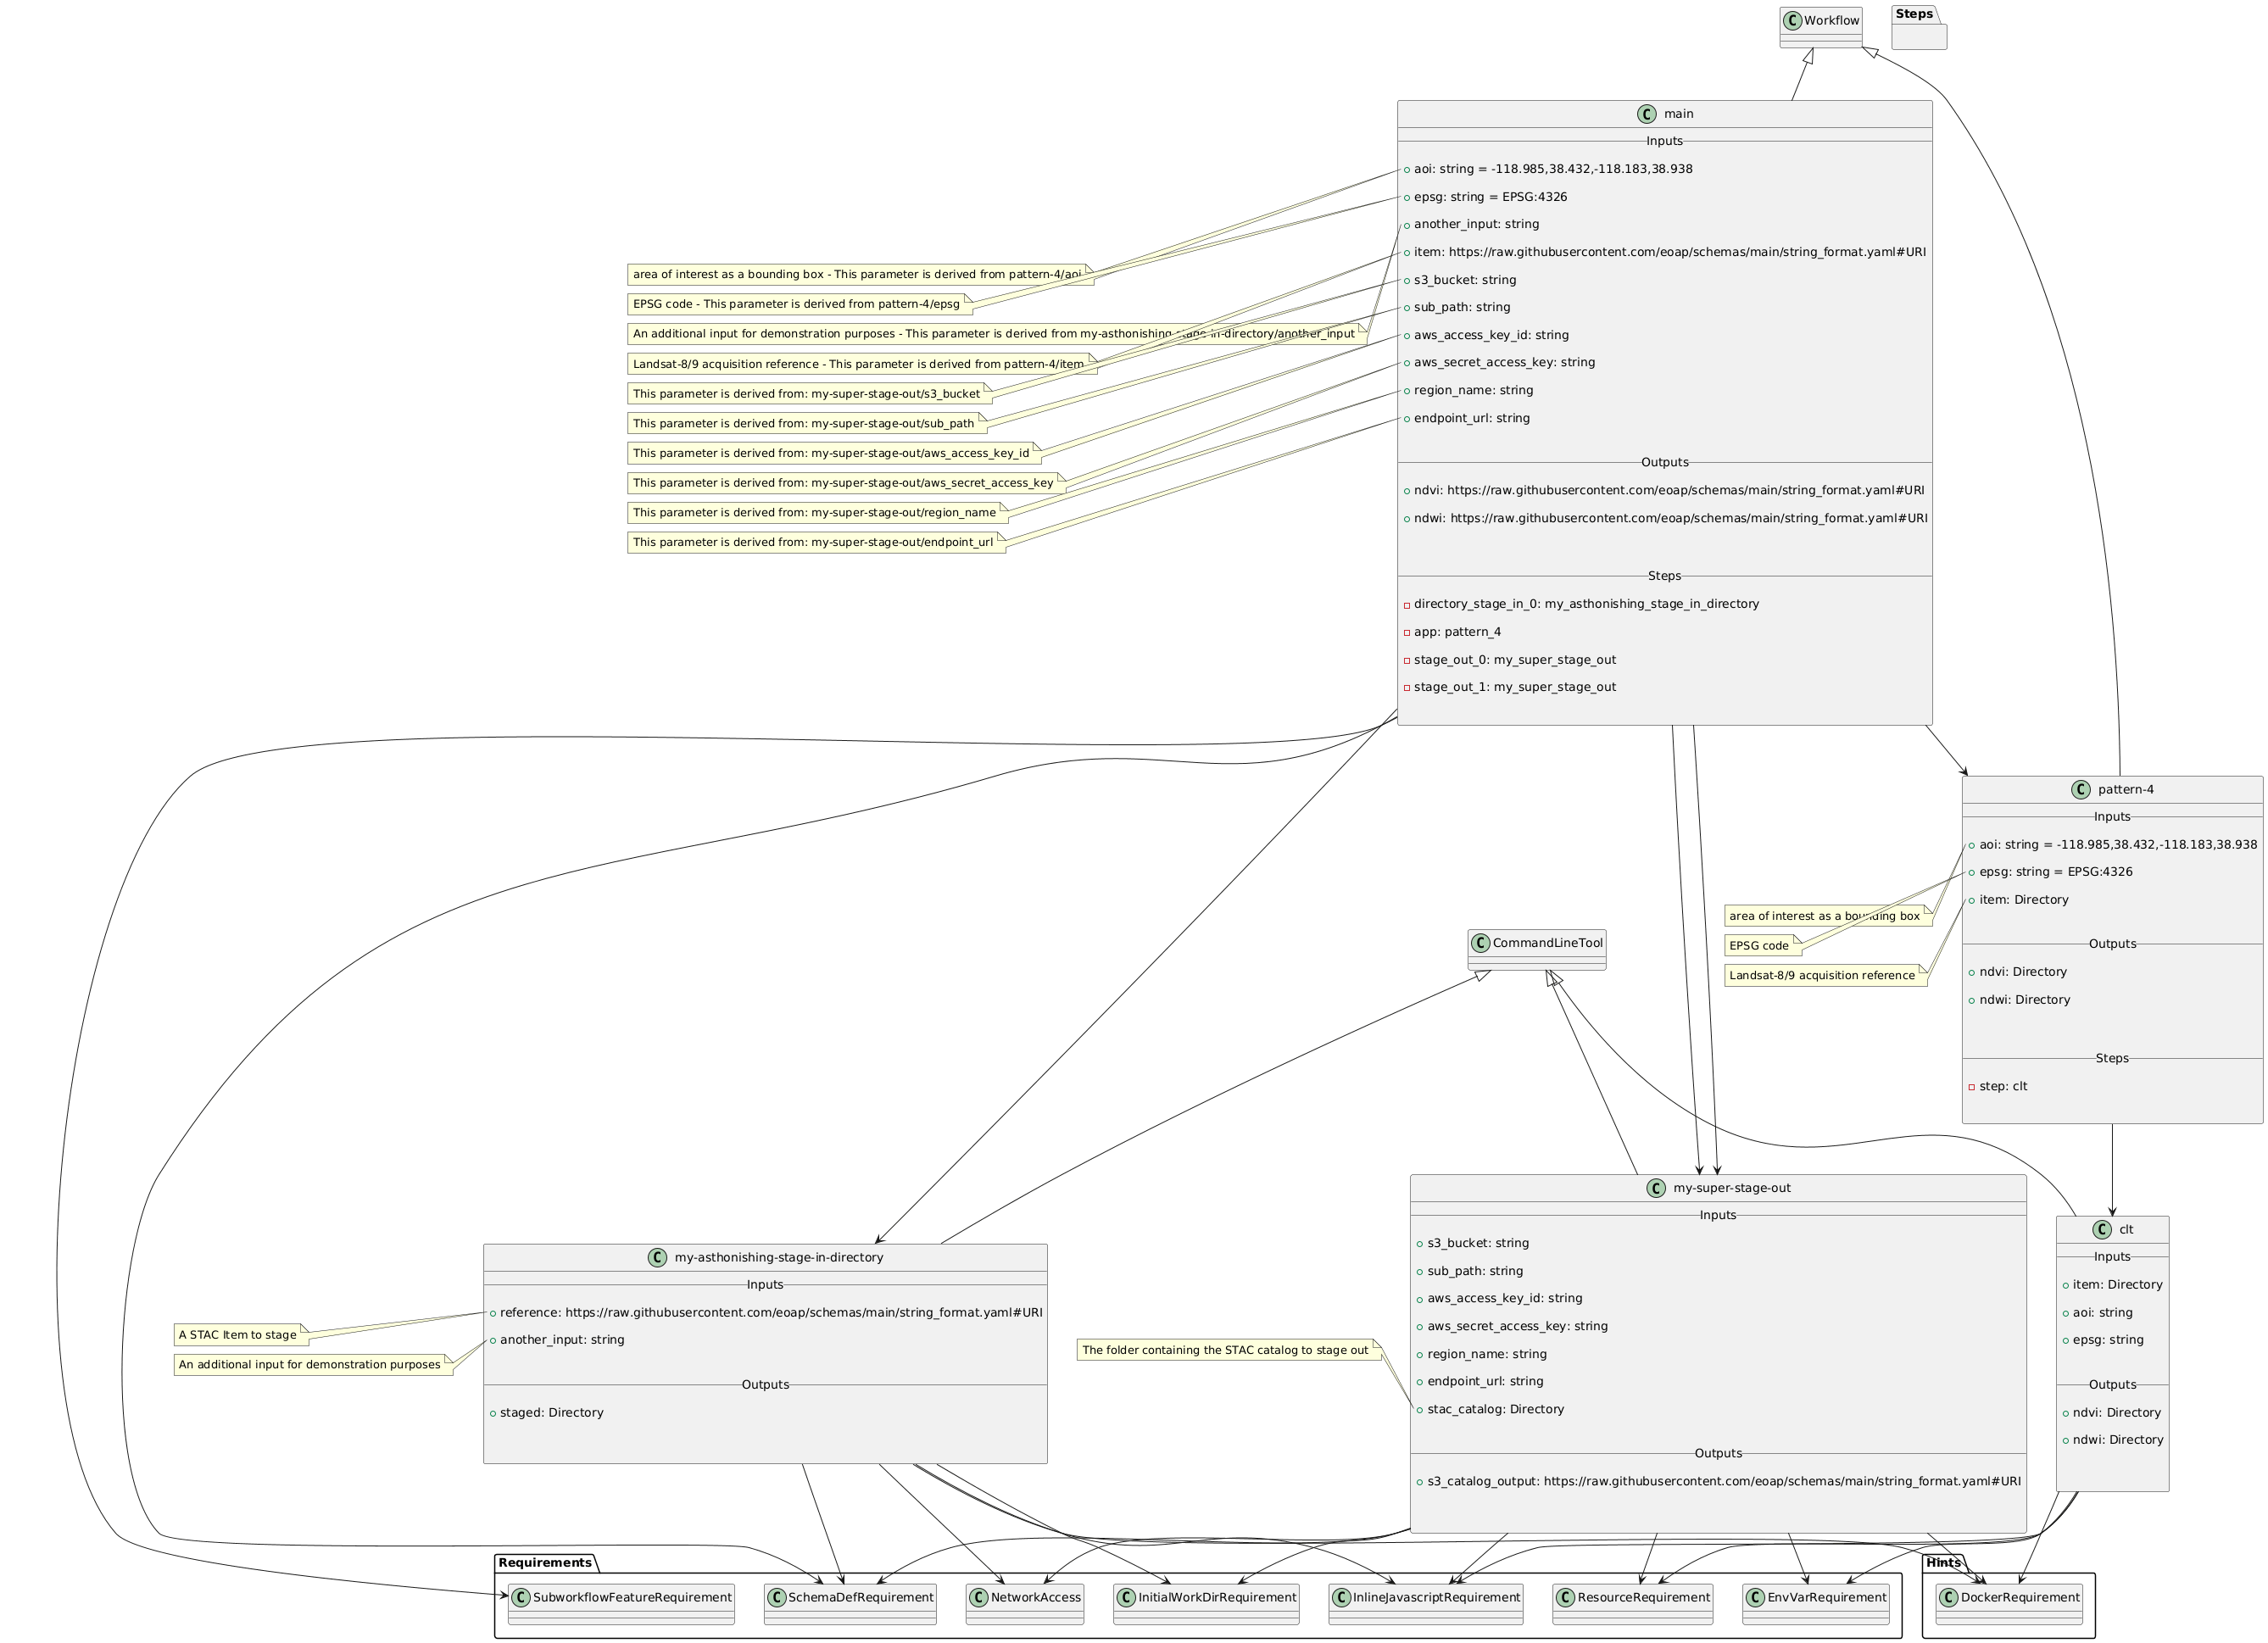

## sequence diagram

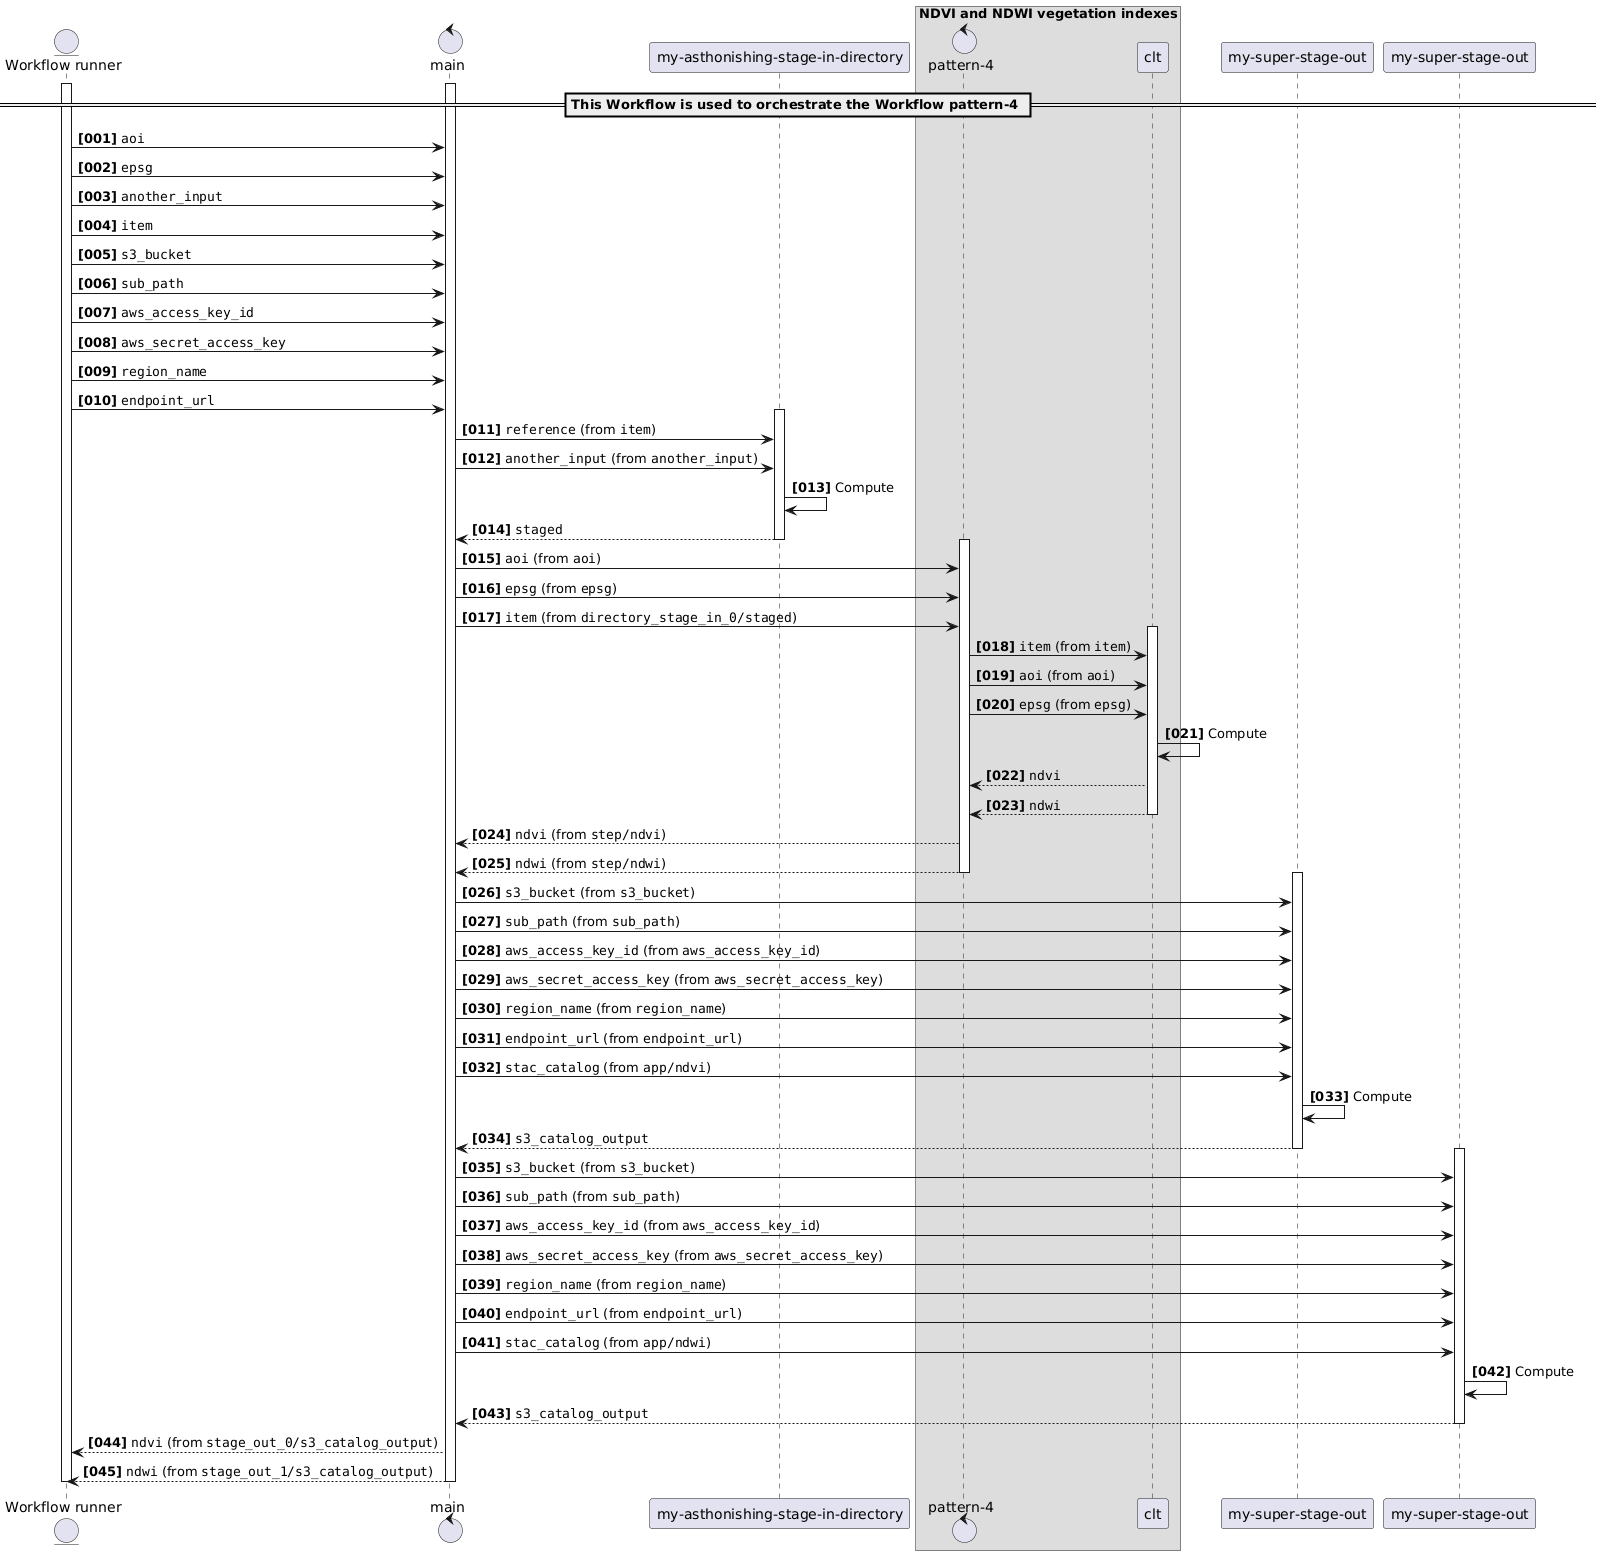

## state diagram

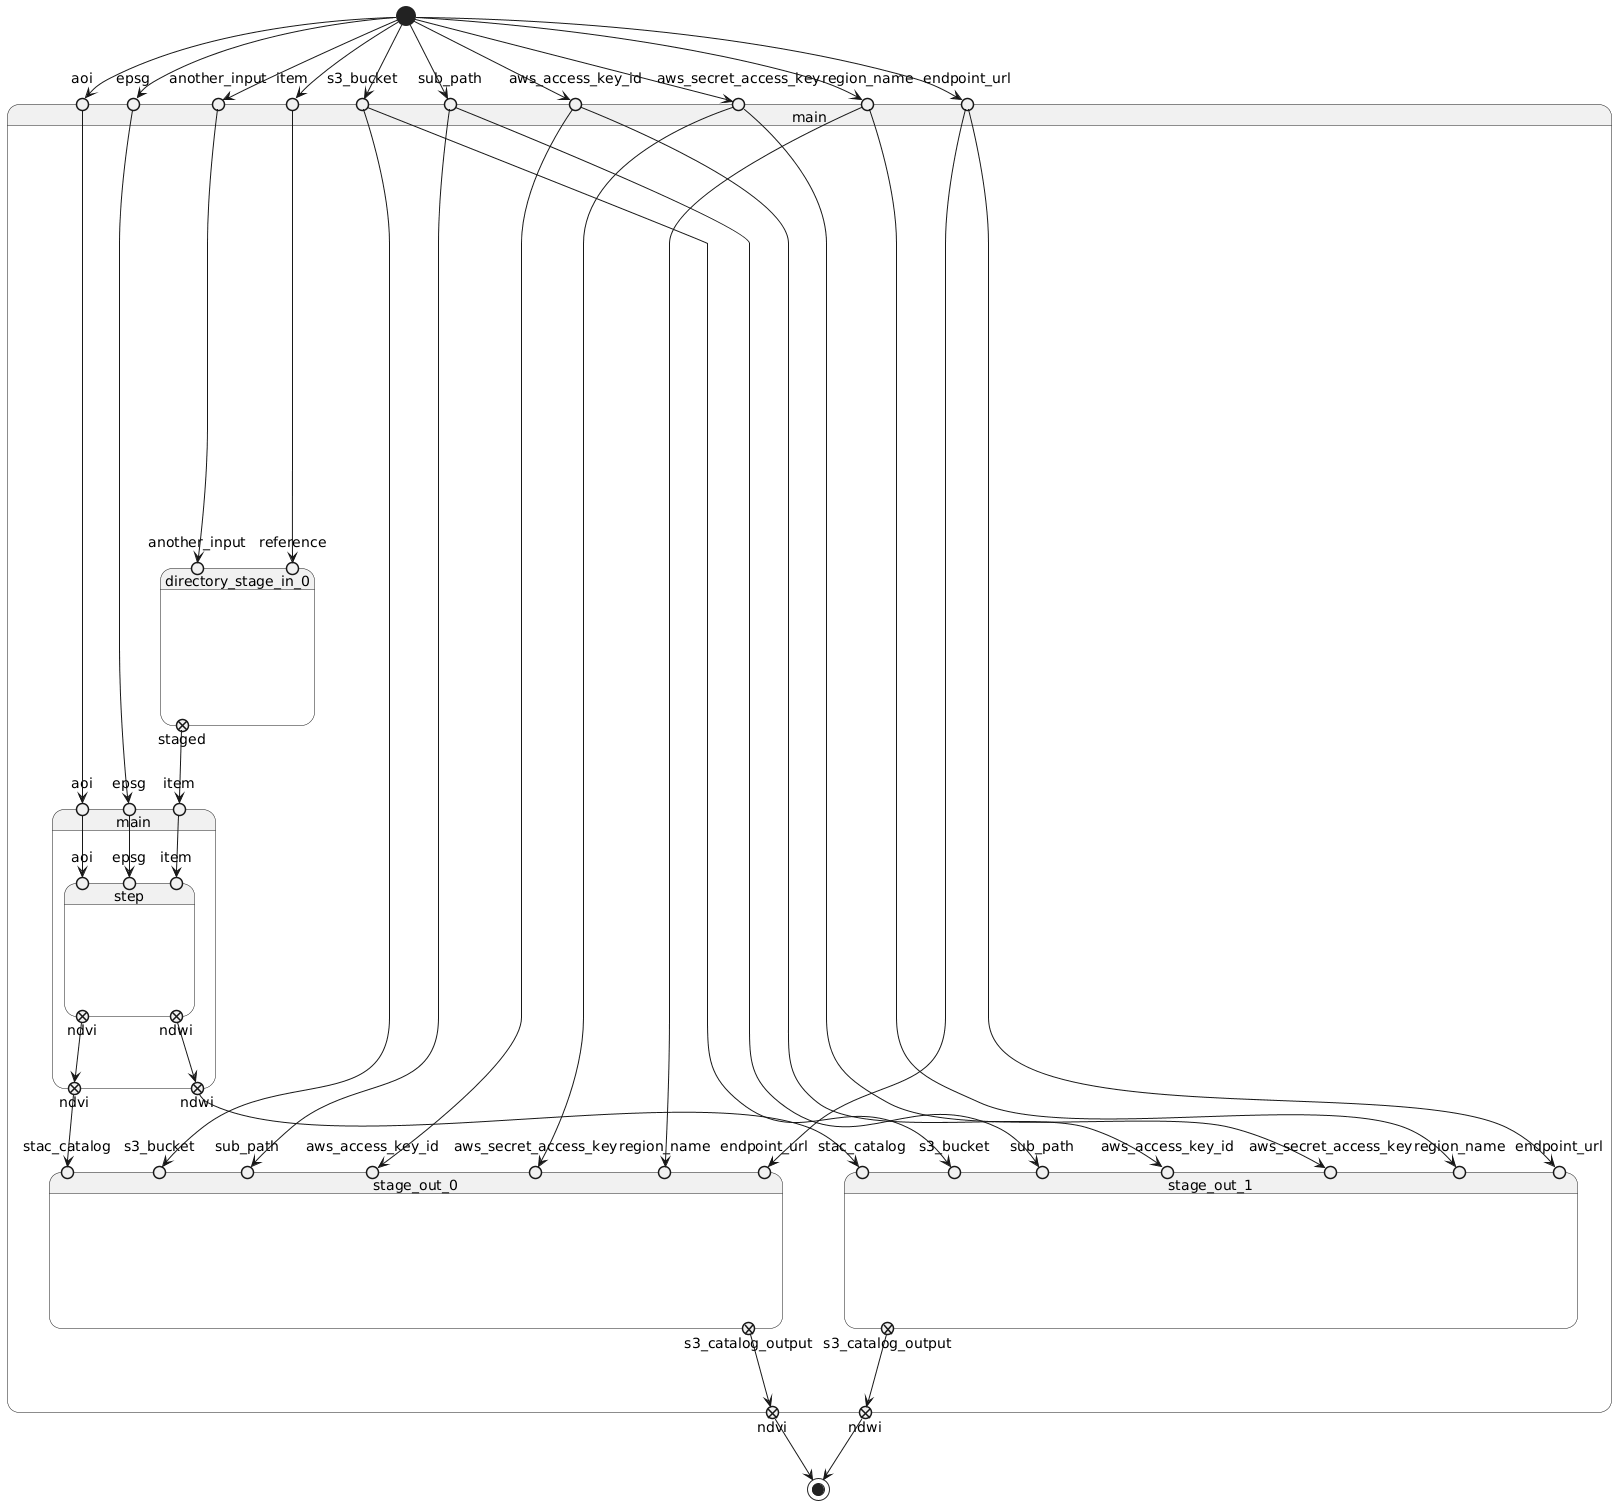

# Pattern 5

## component diagram

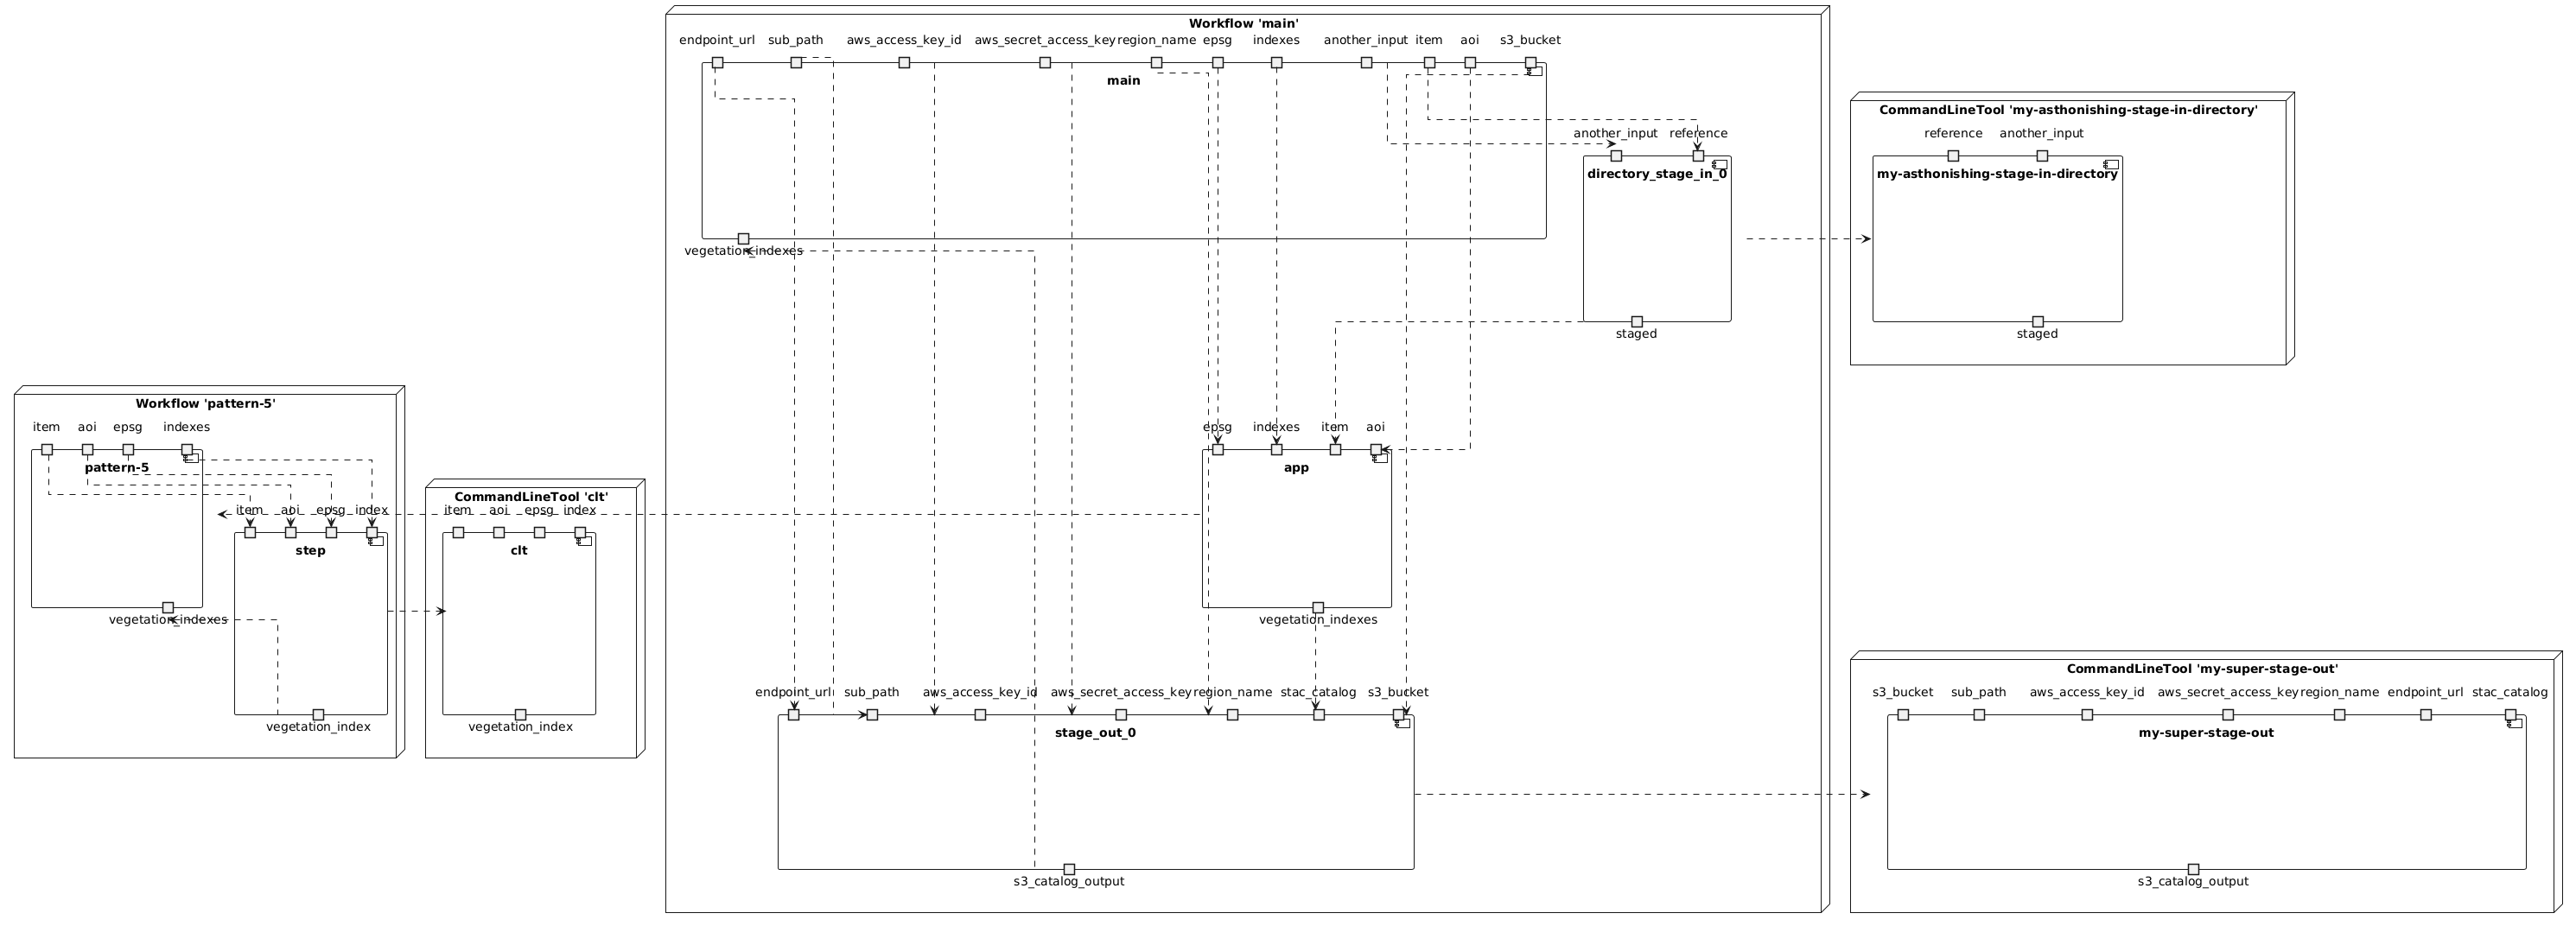

## class diagram

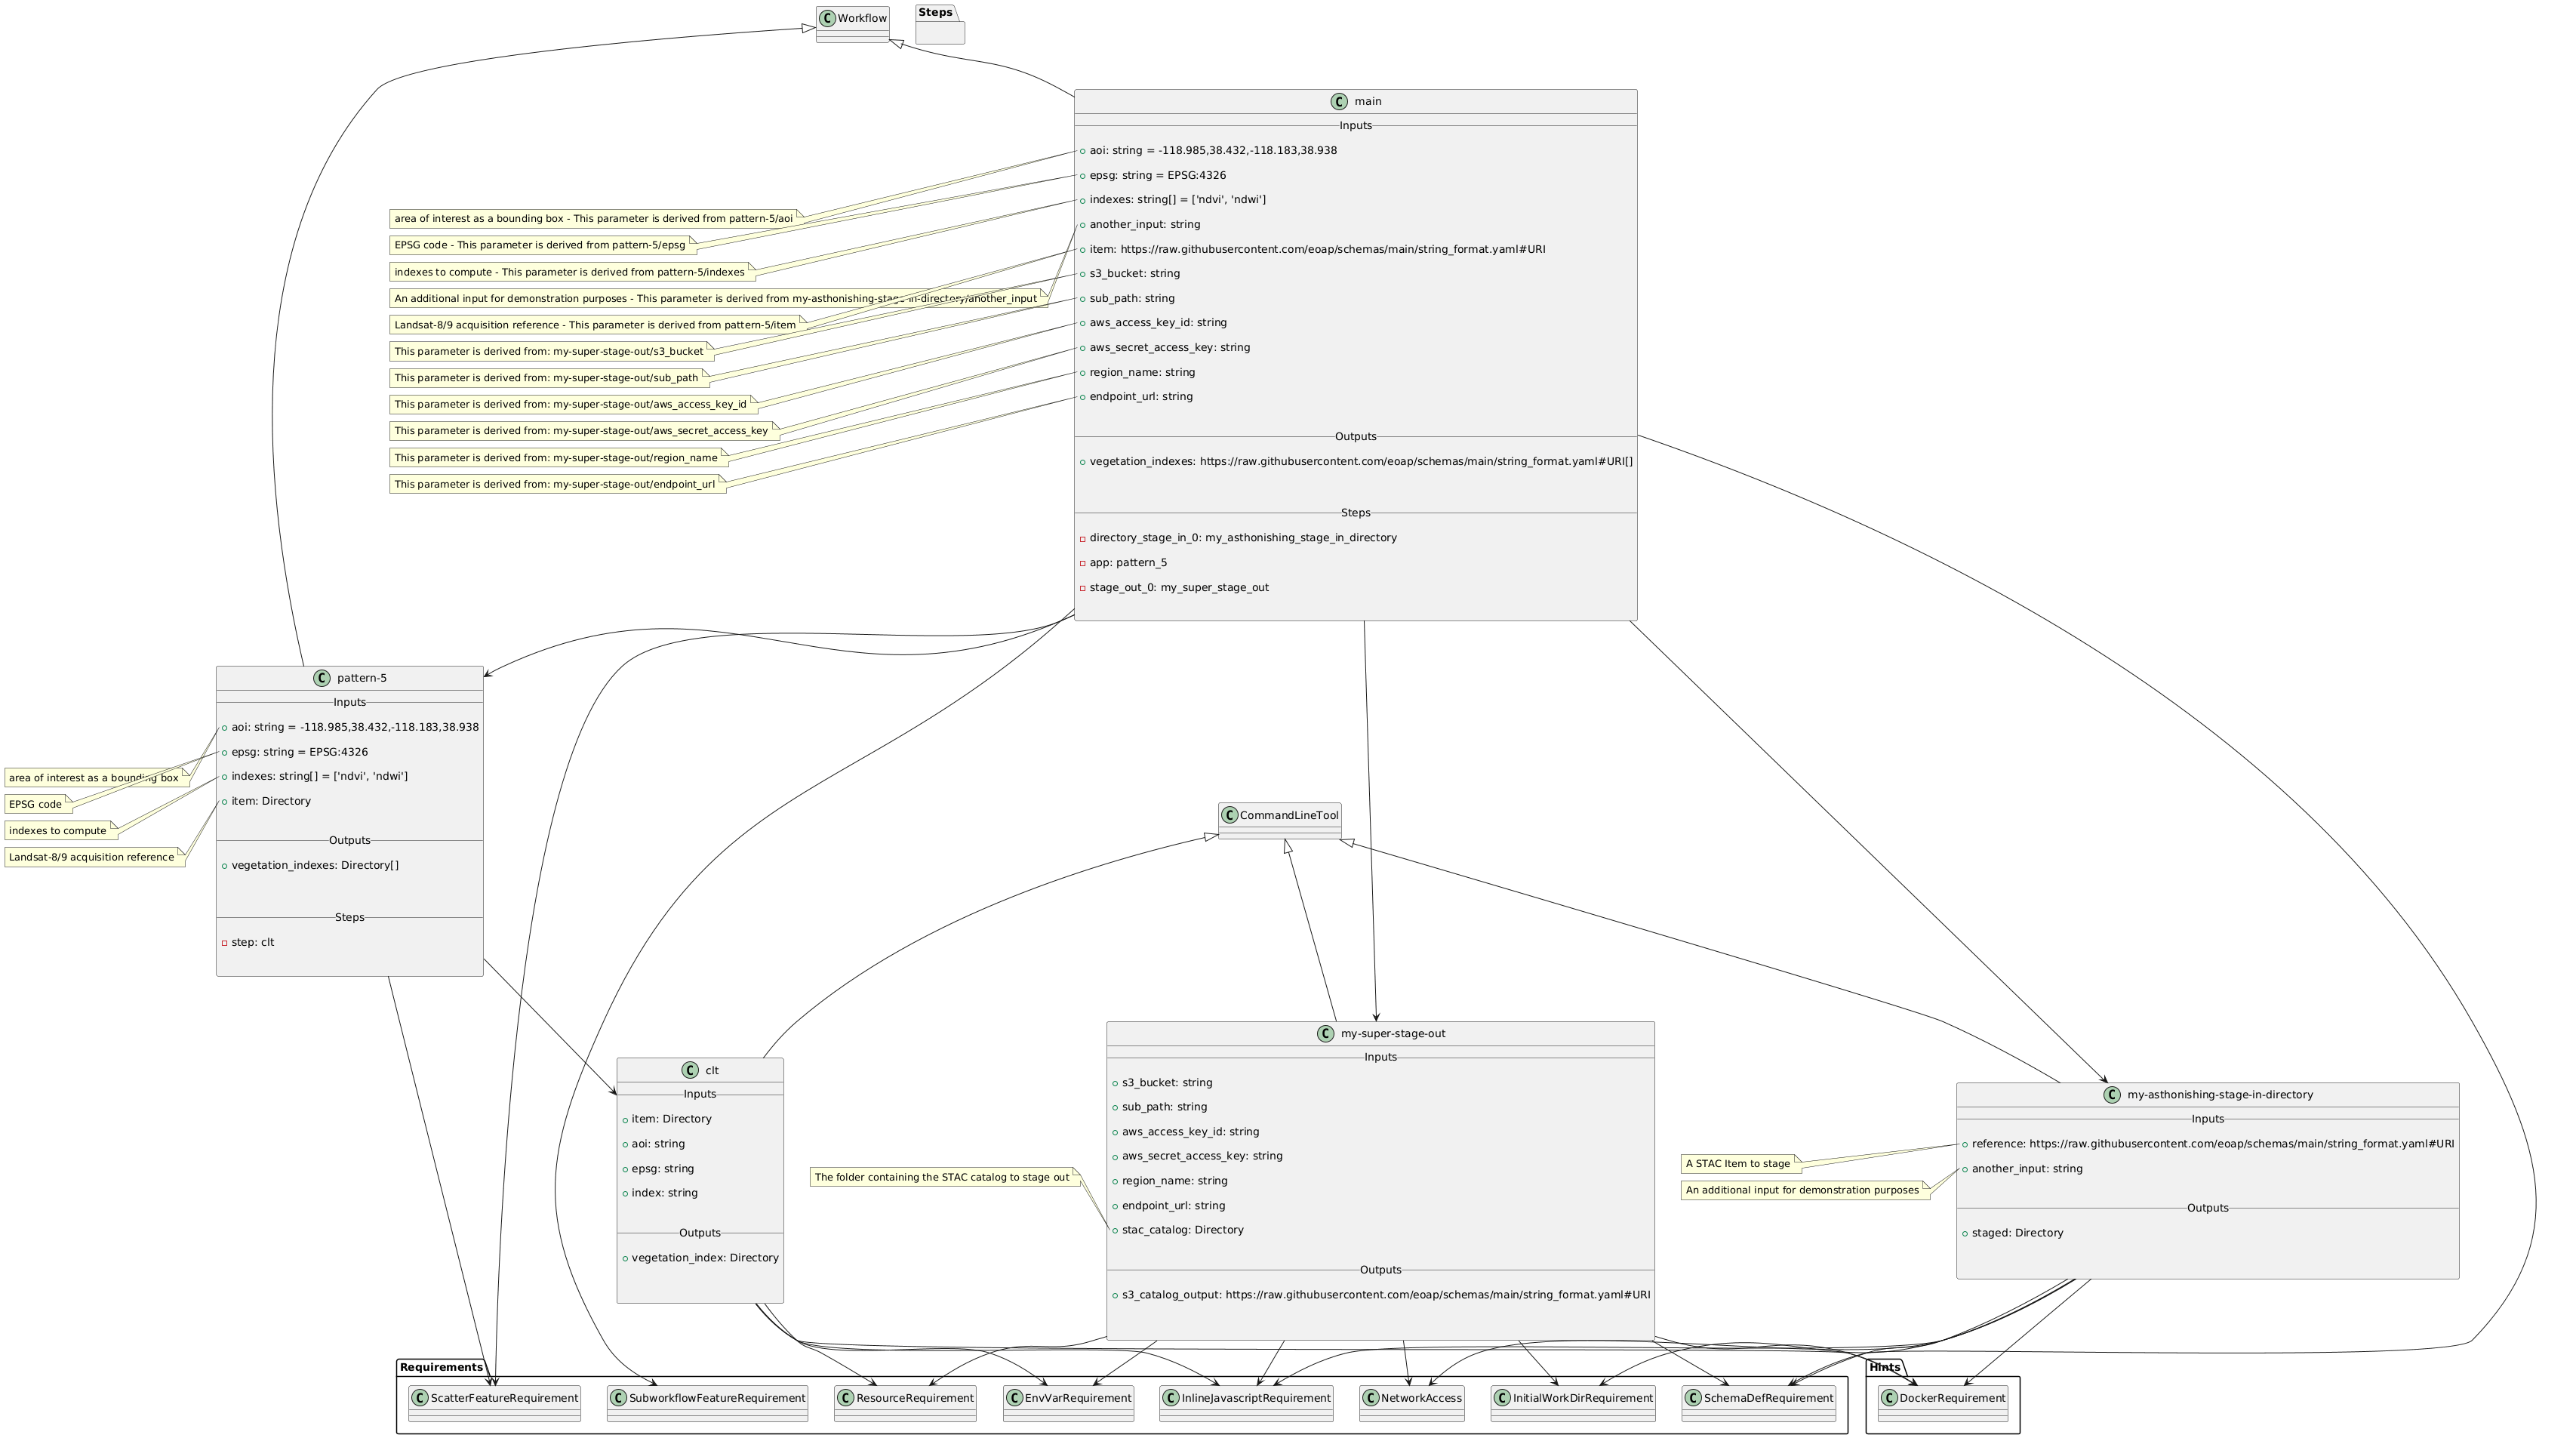

## sequence diagram

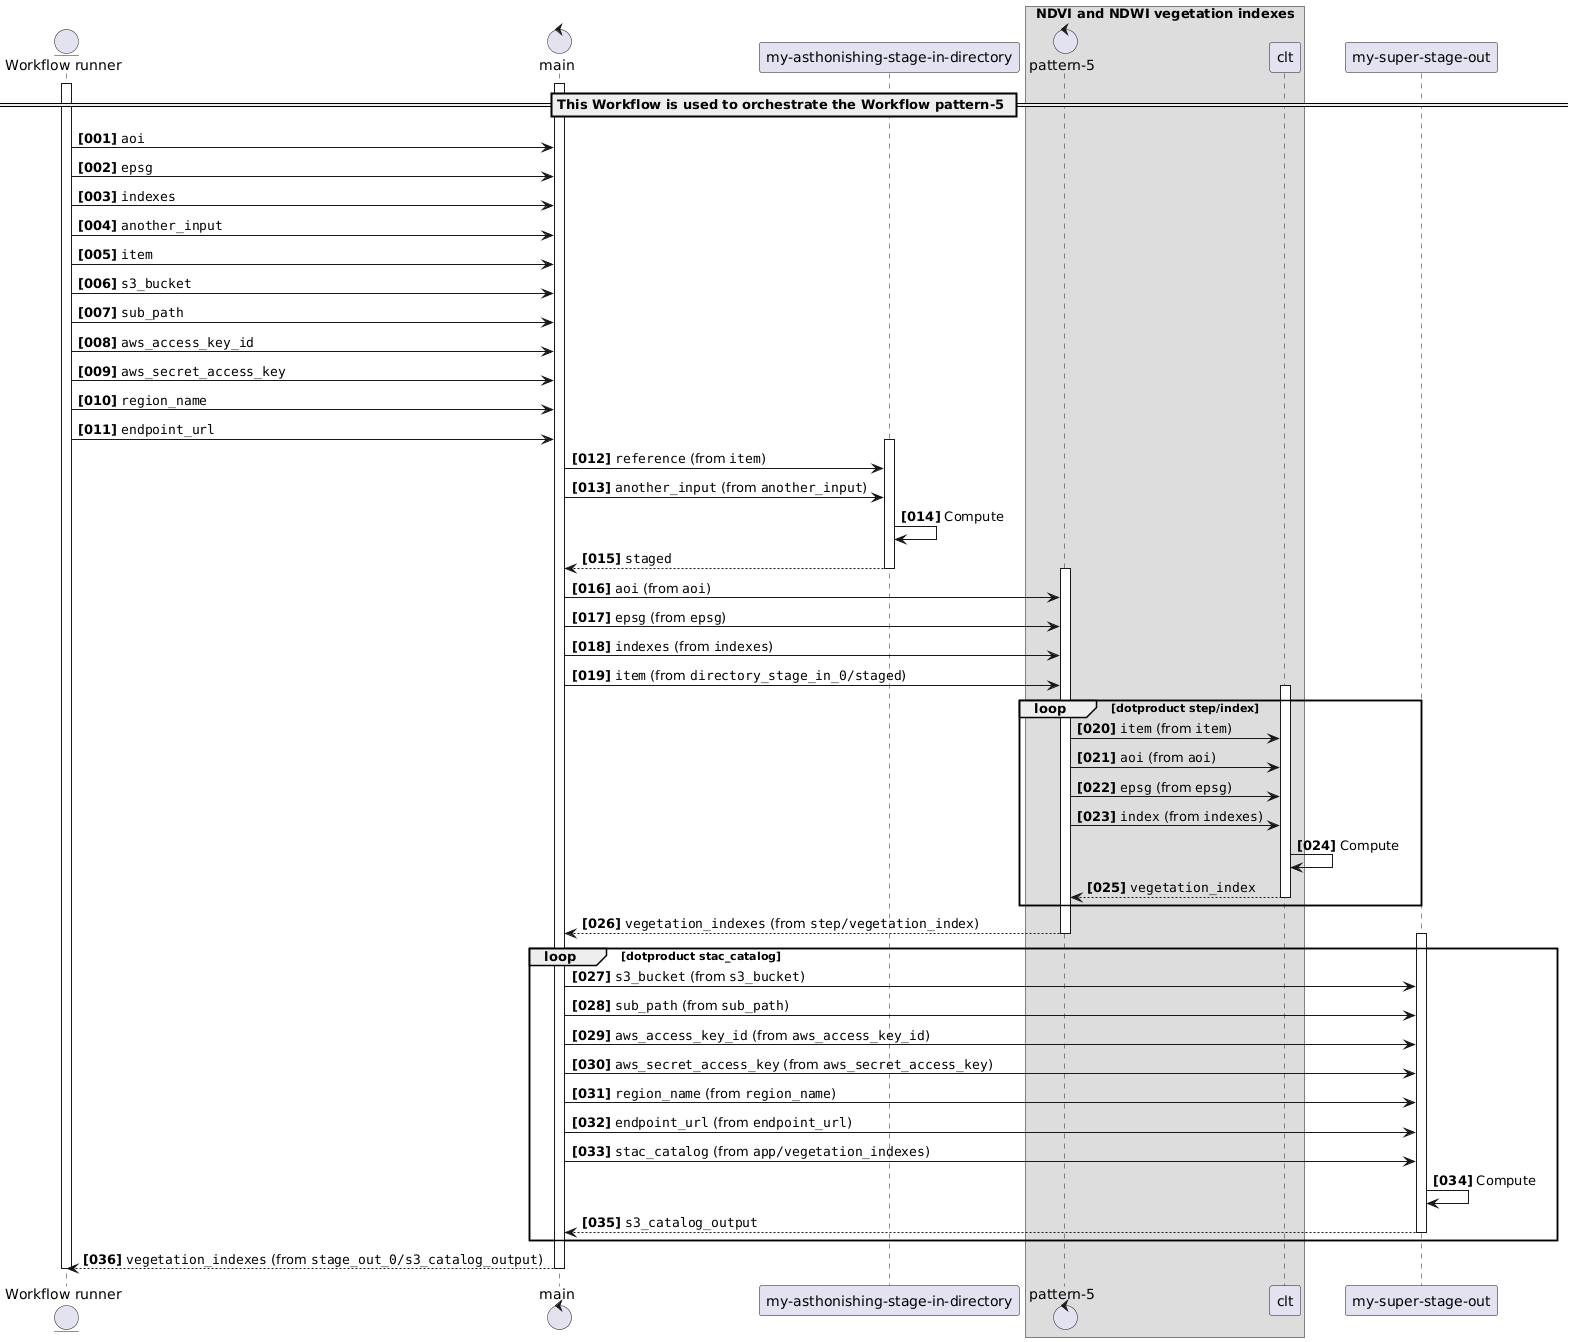

## state diagram

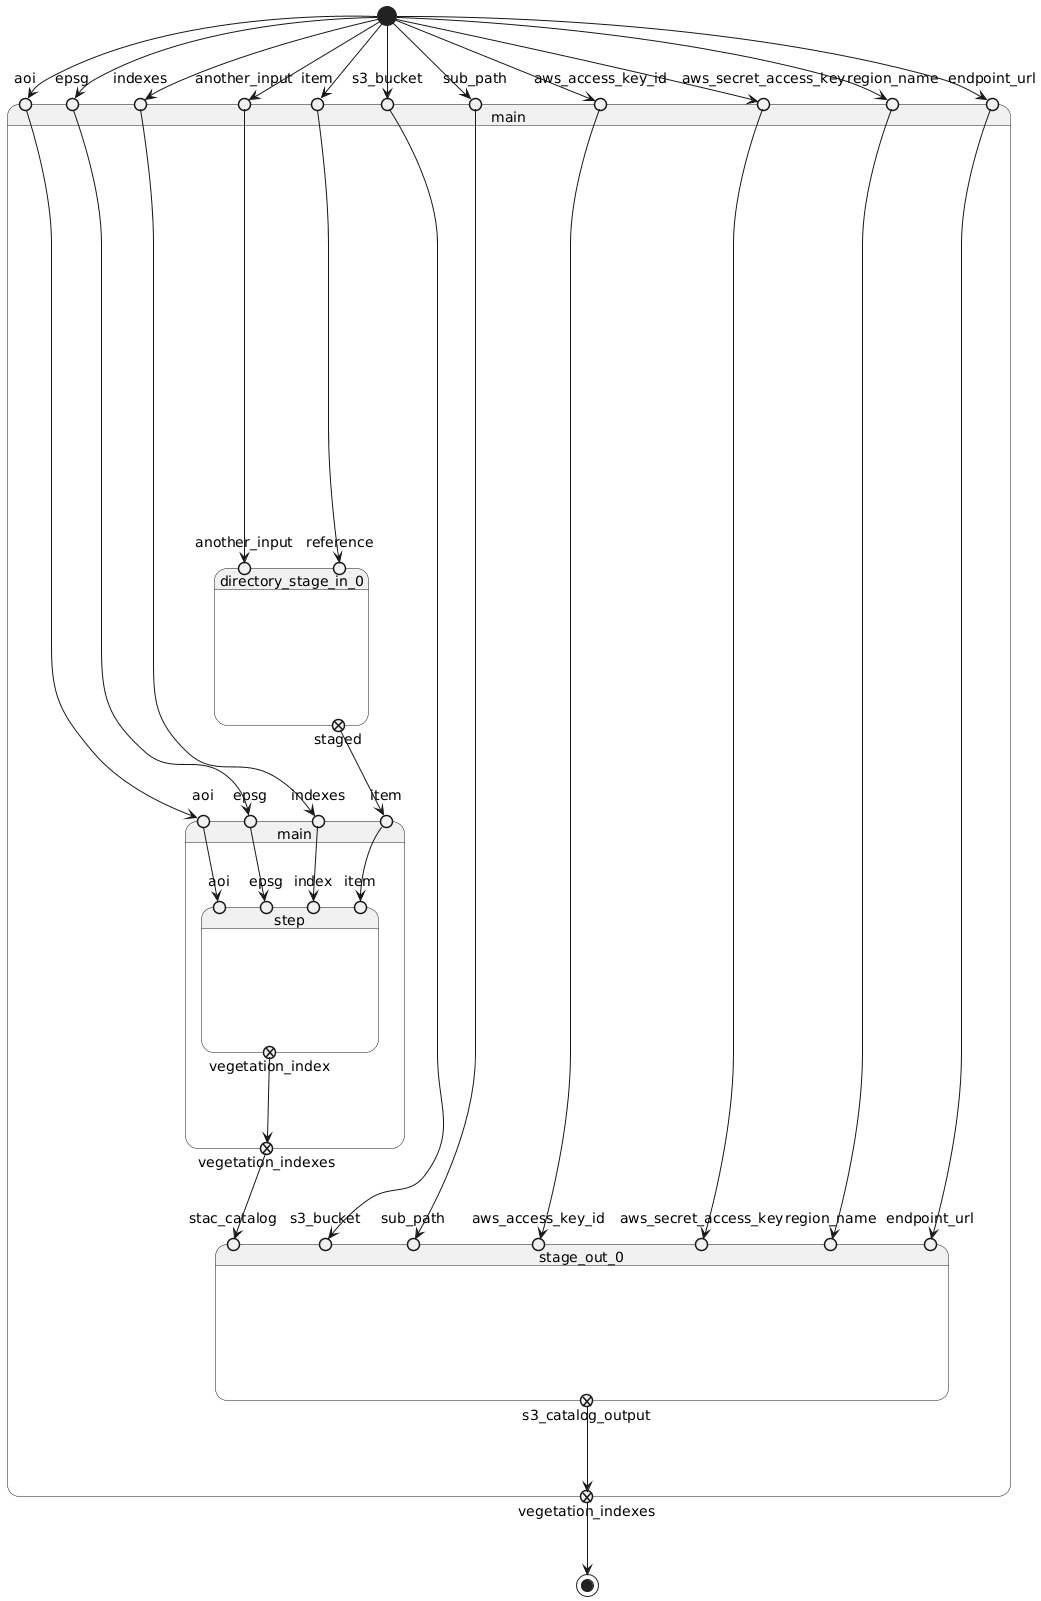

# Pattern 6

## component diagram

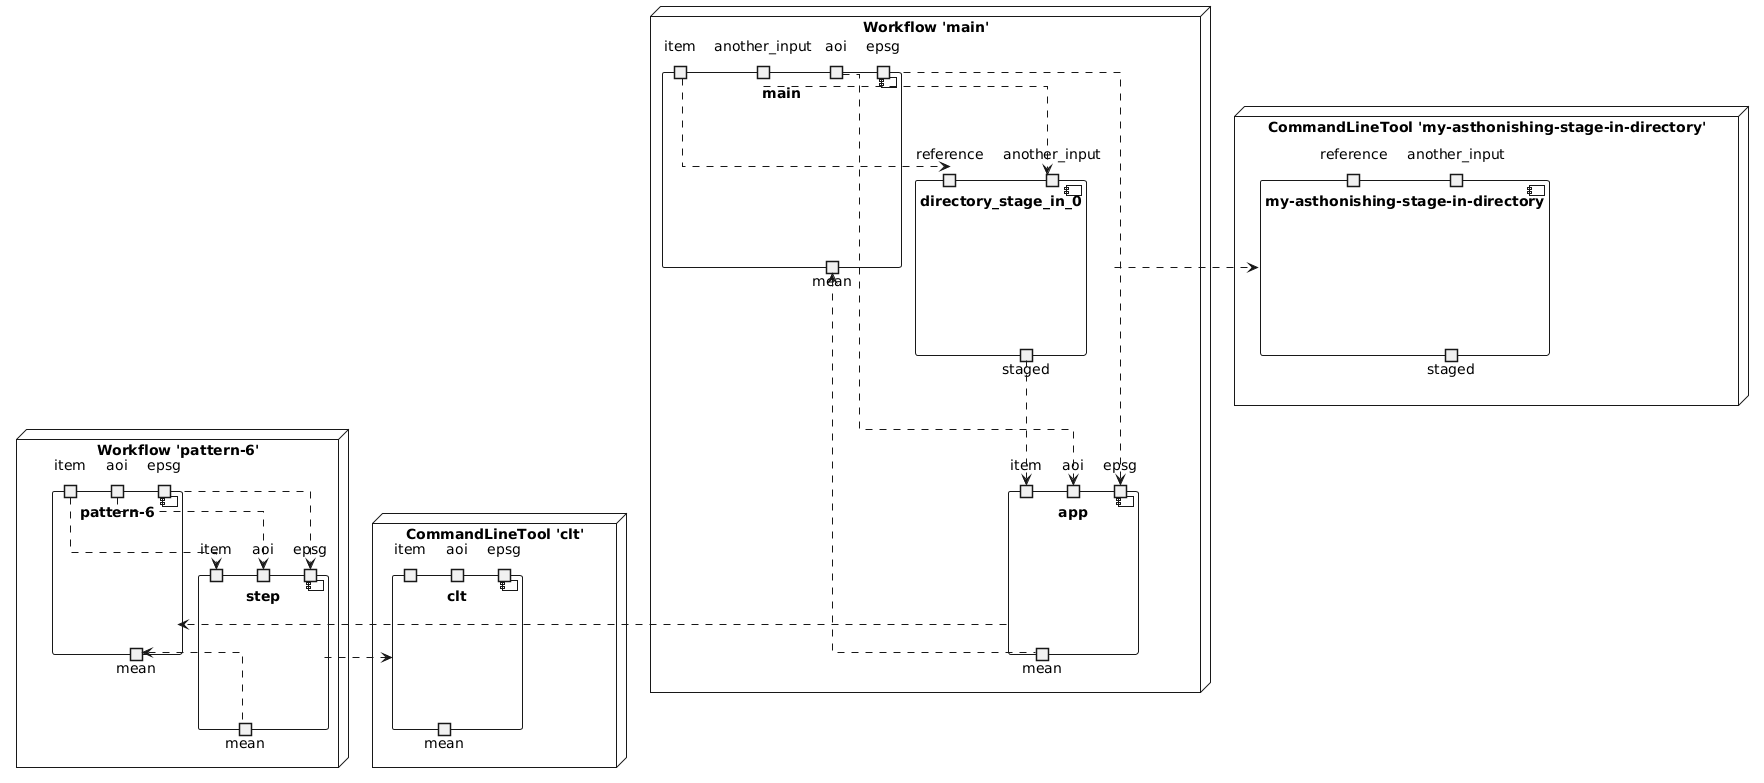

## class diagram

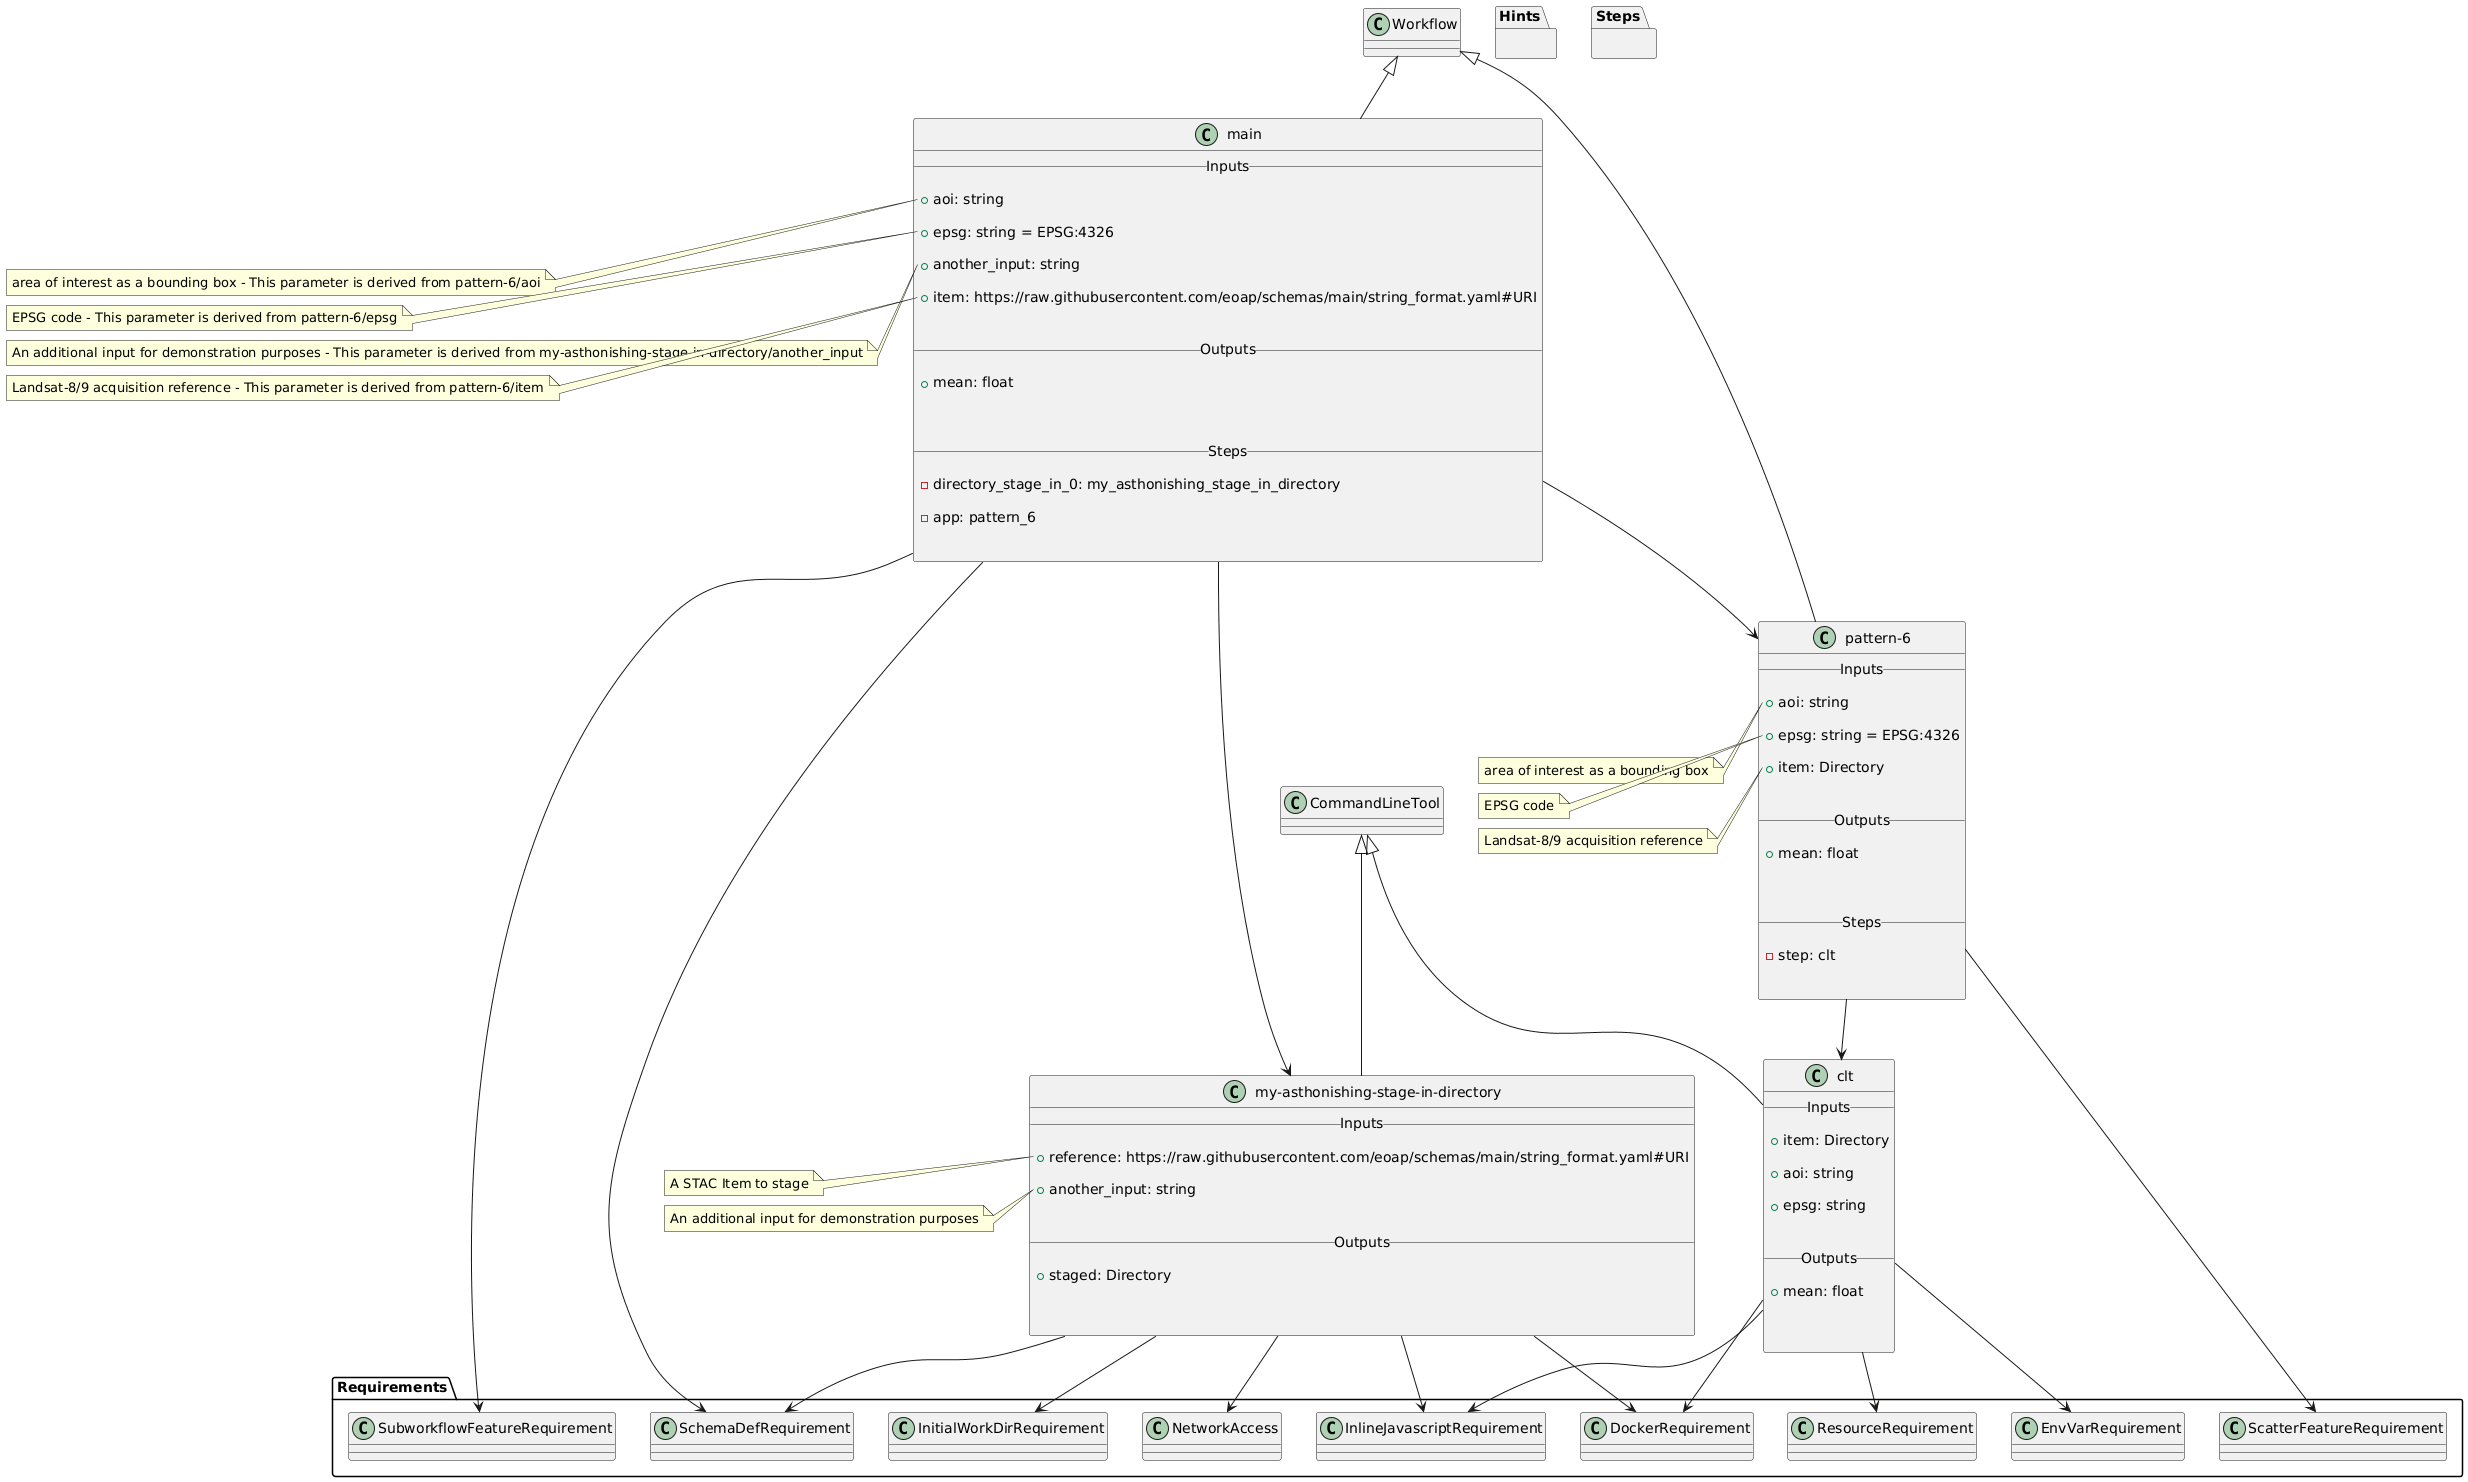

## sequence diagram

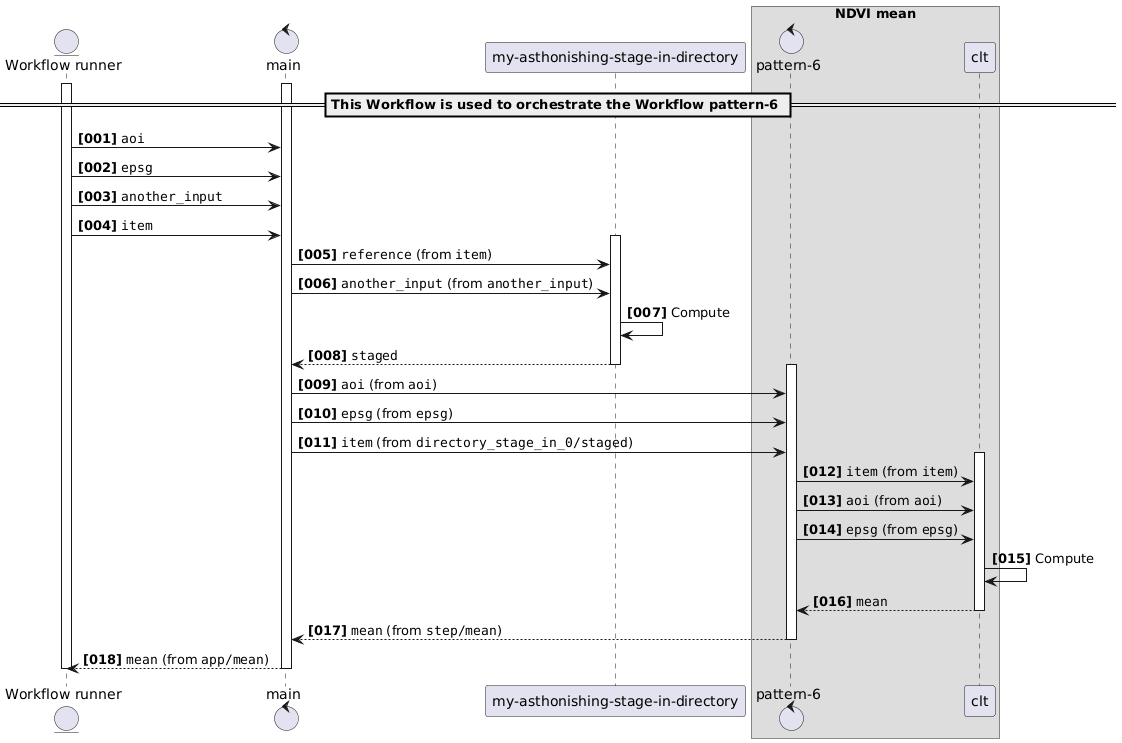

## state diagram

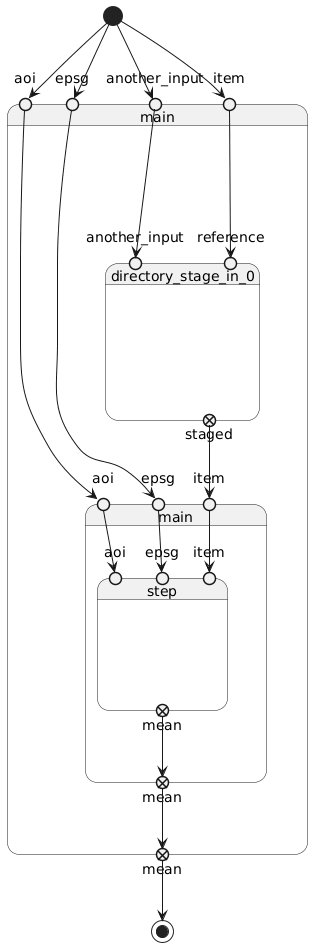

# Pattern 7

## component diagram

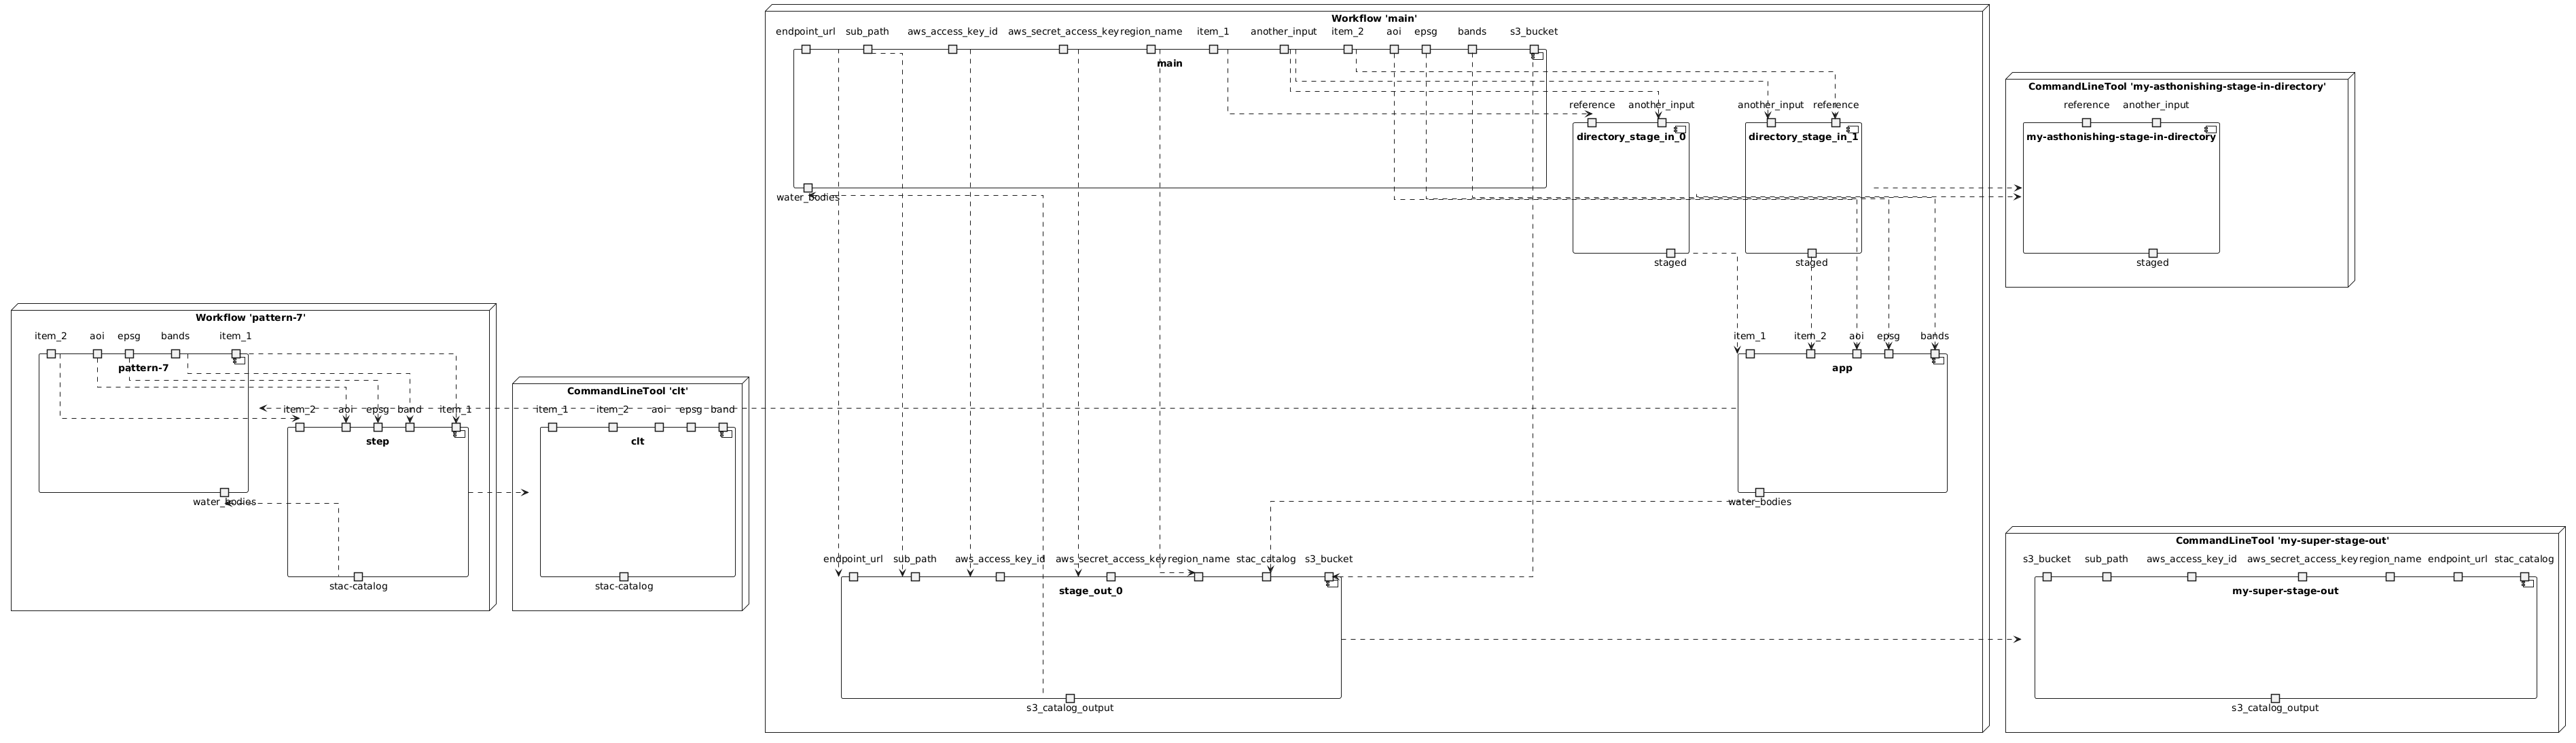

## class diagram

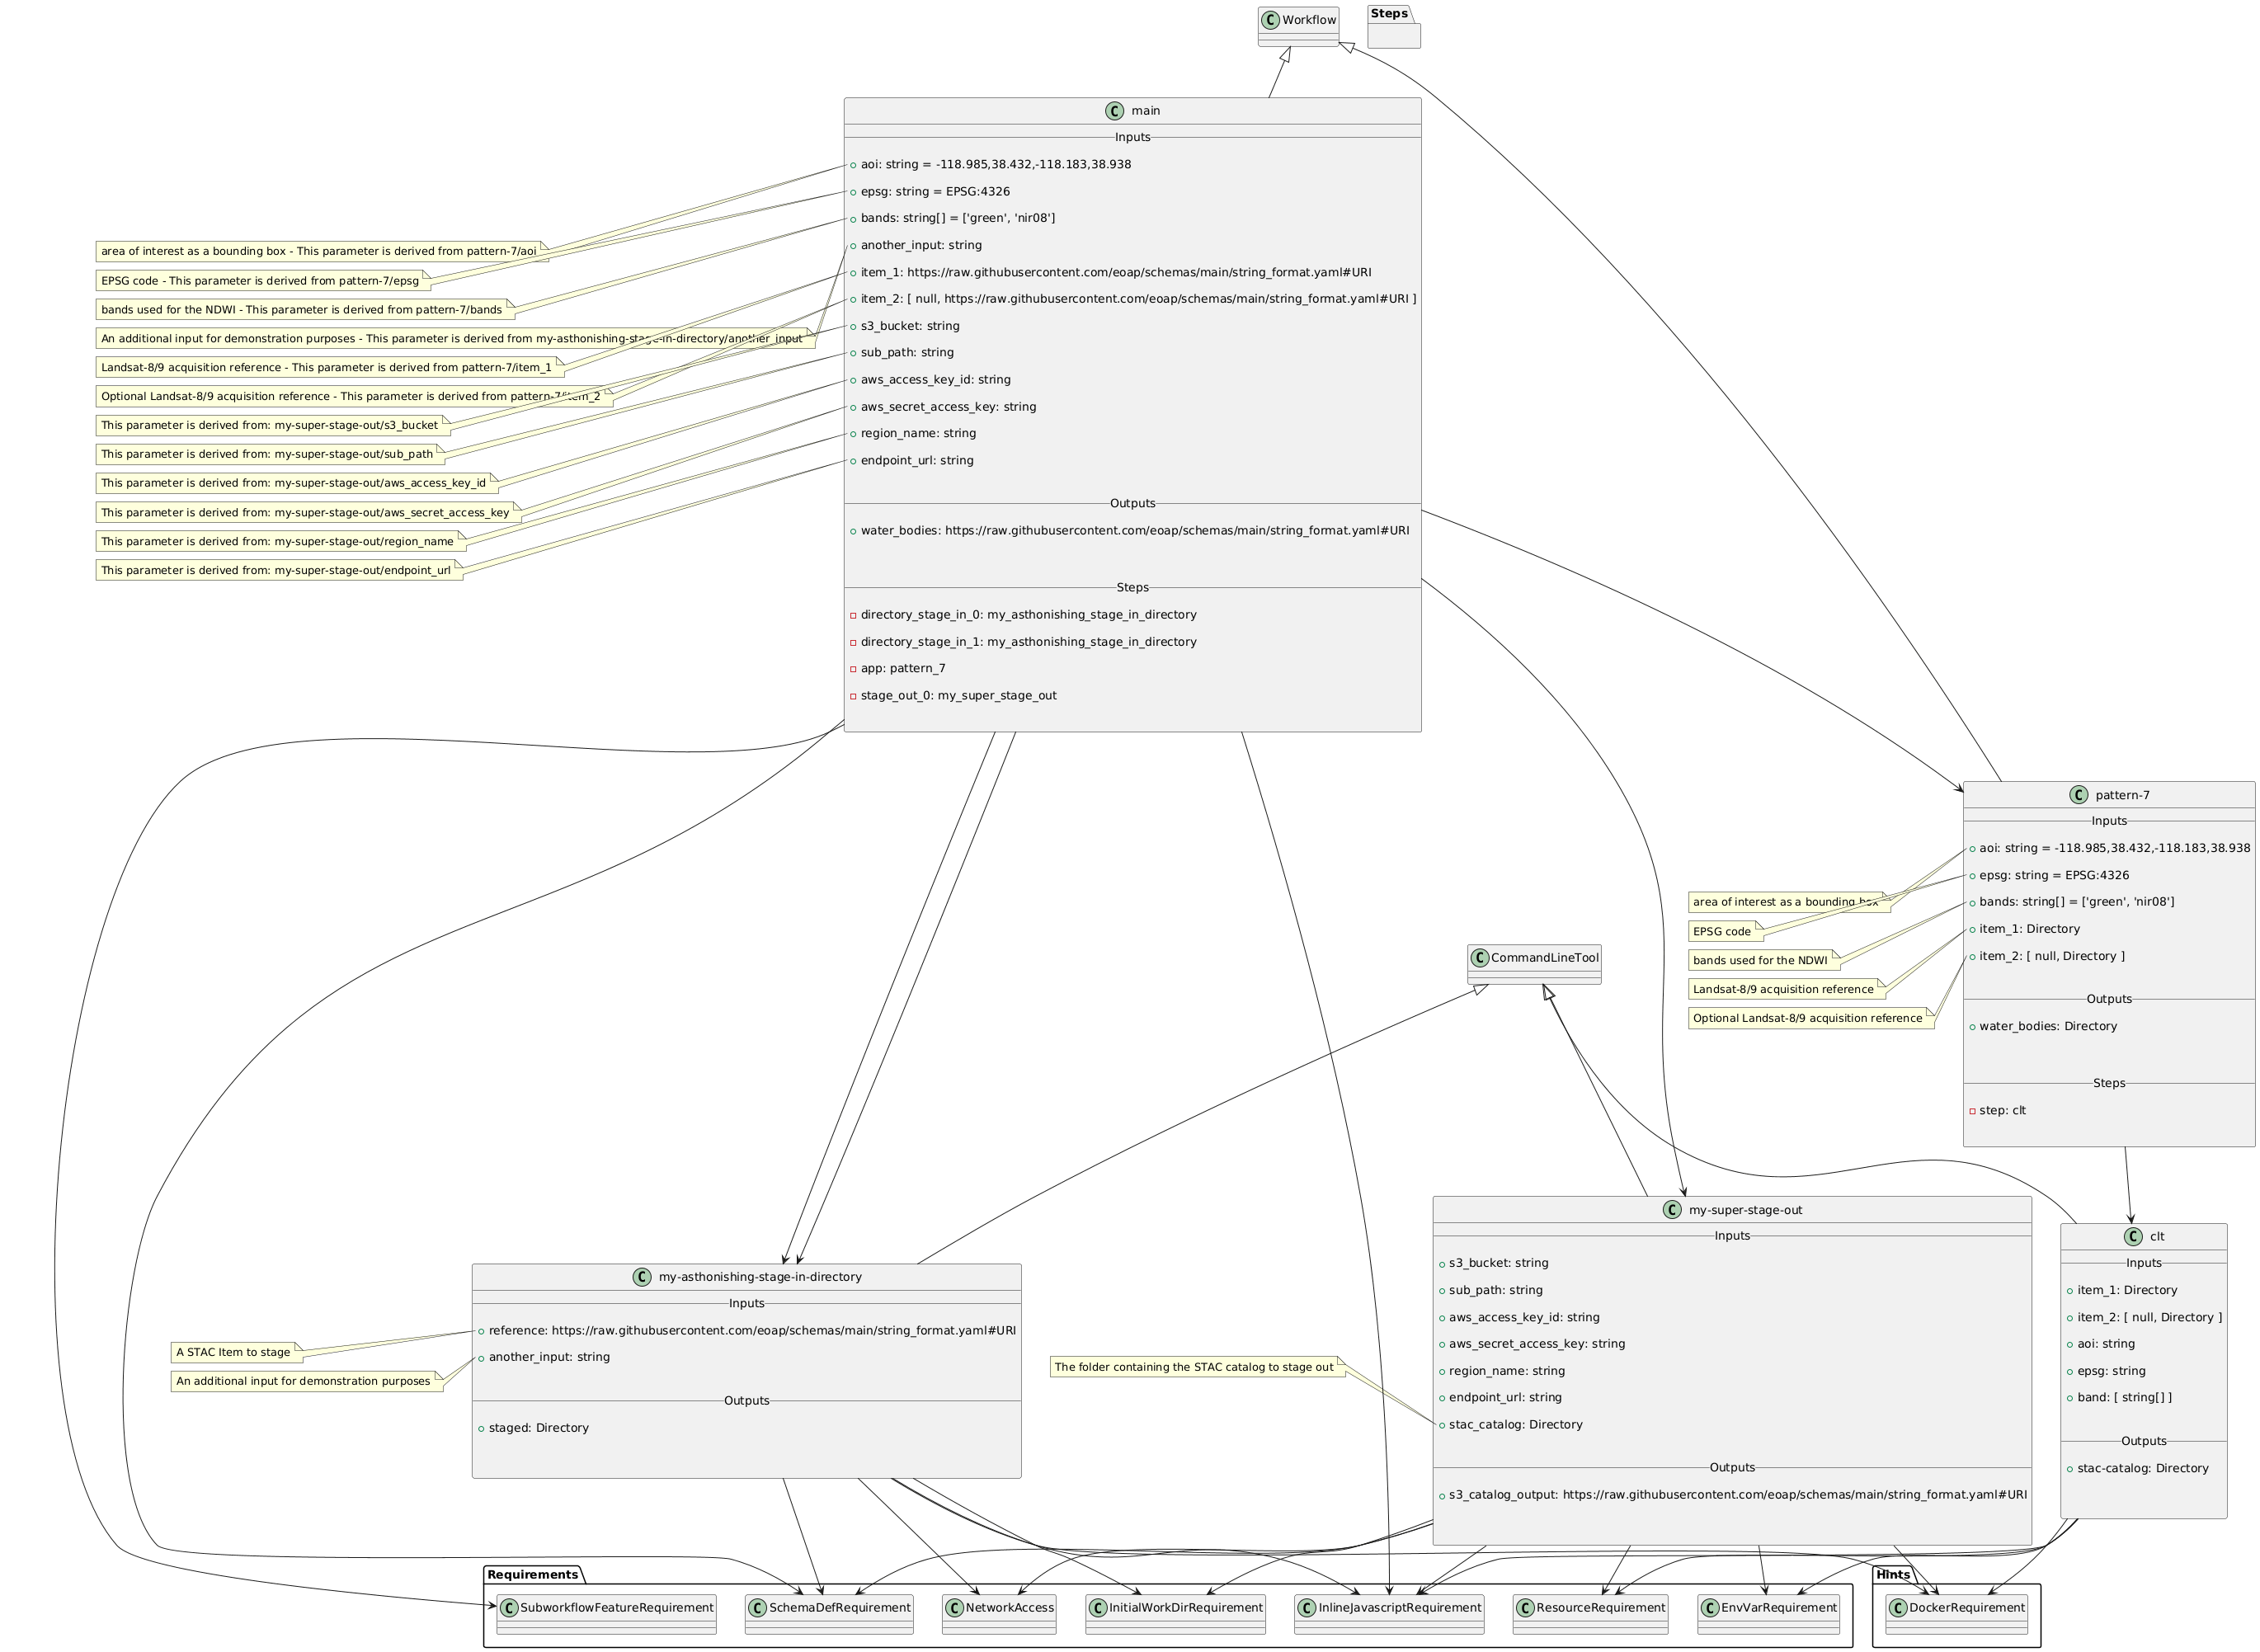

## sequence diagram

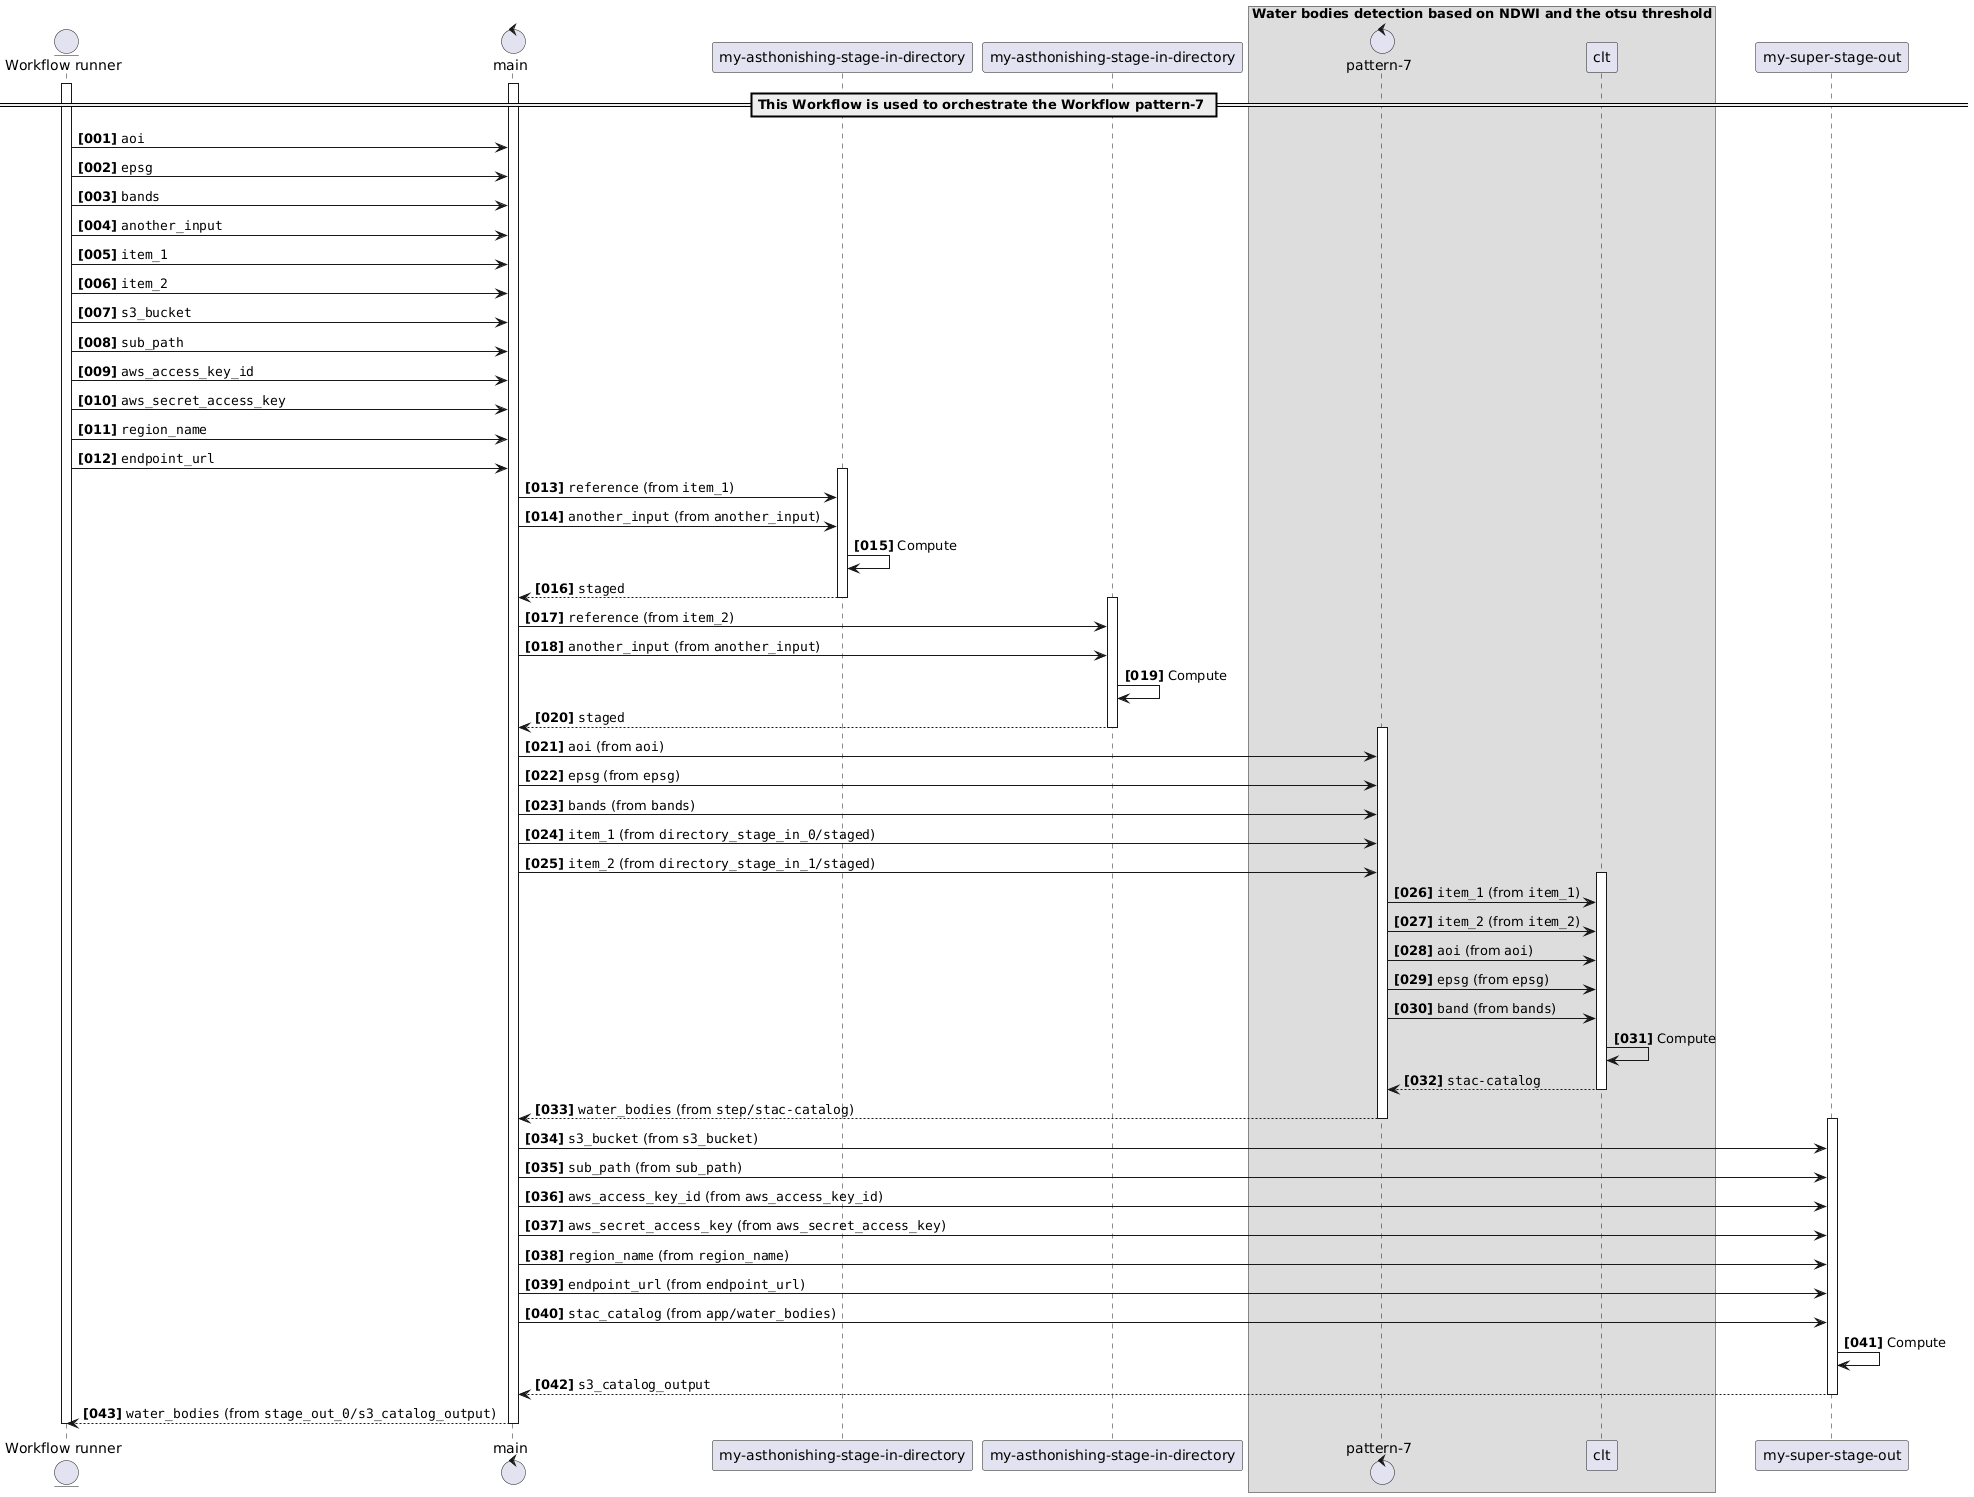

## state diagram

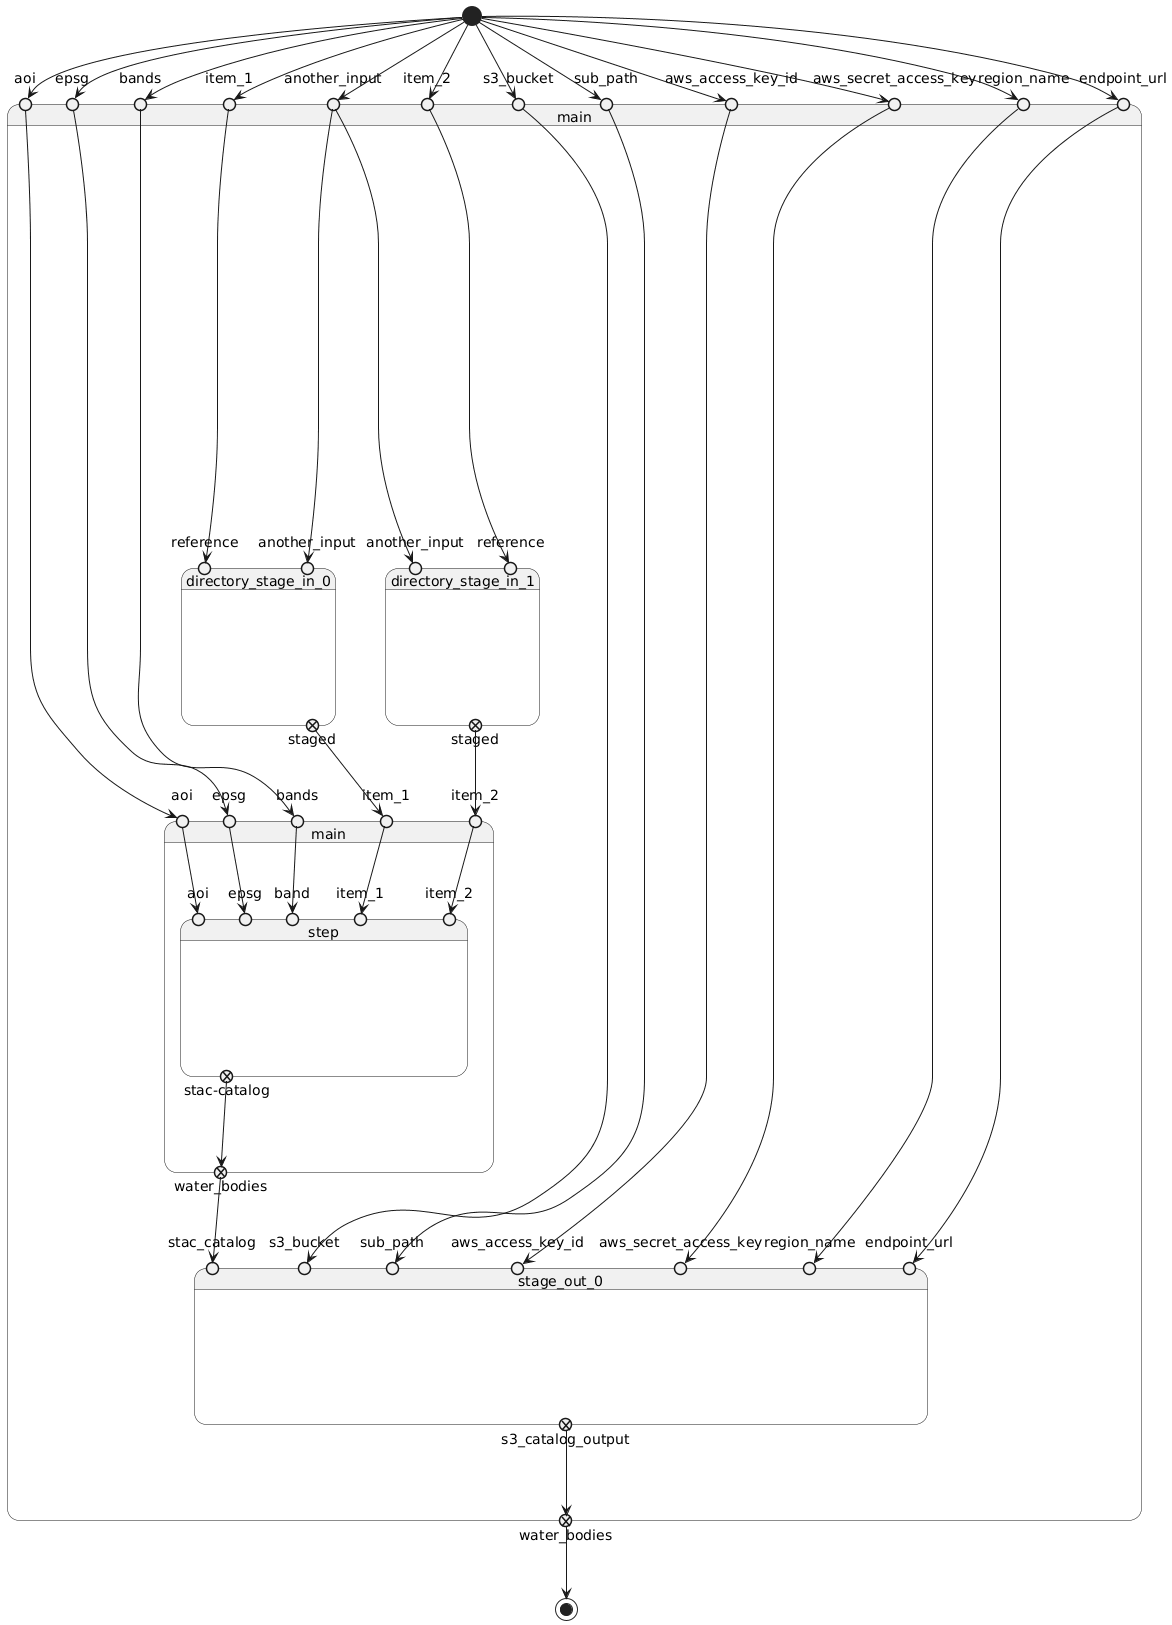

# Pattern 8

## component diagram

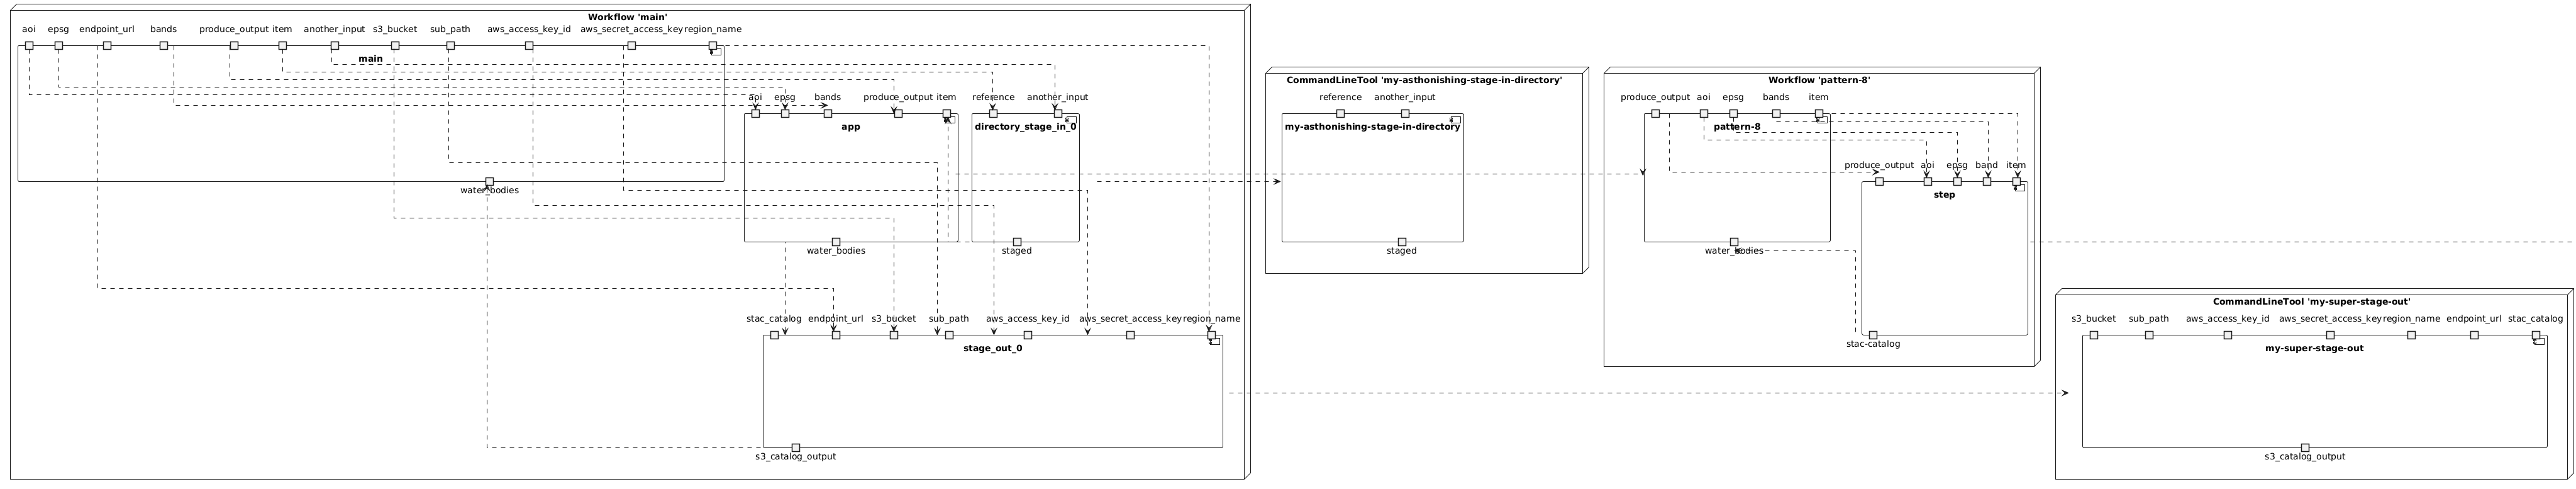

## class diagram

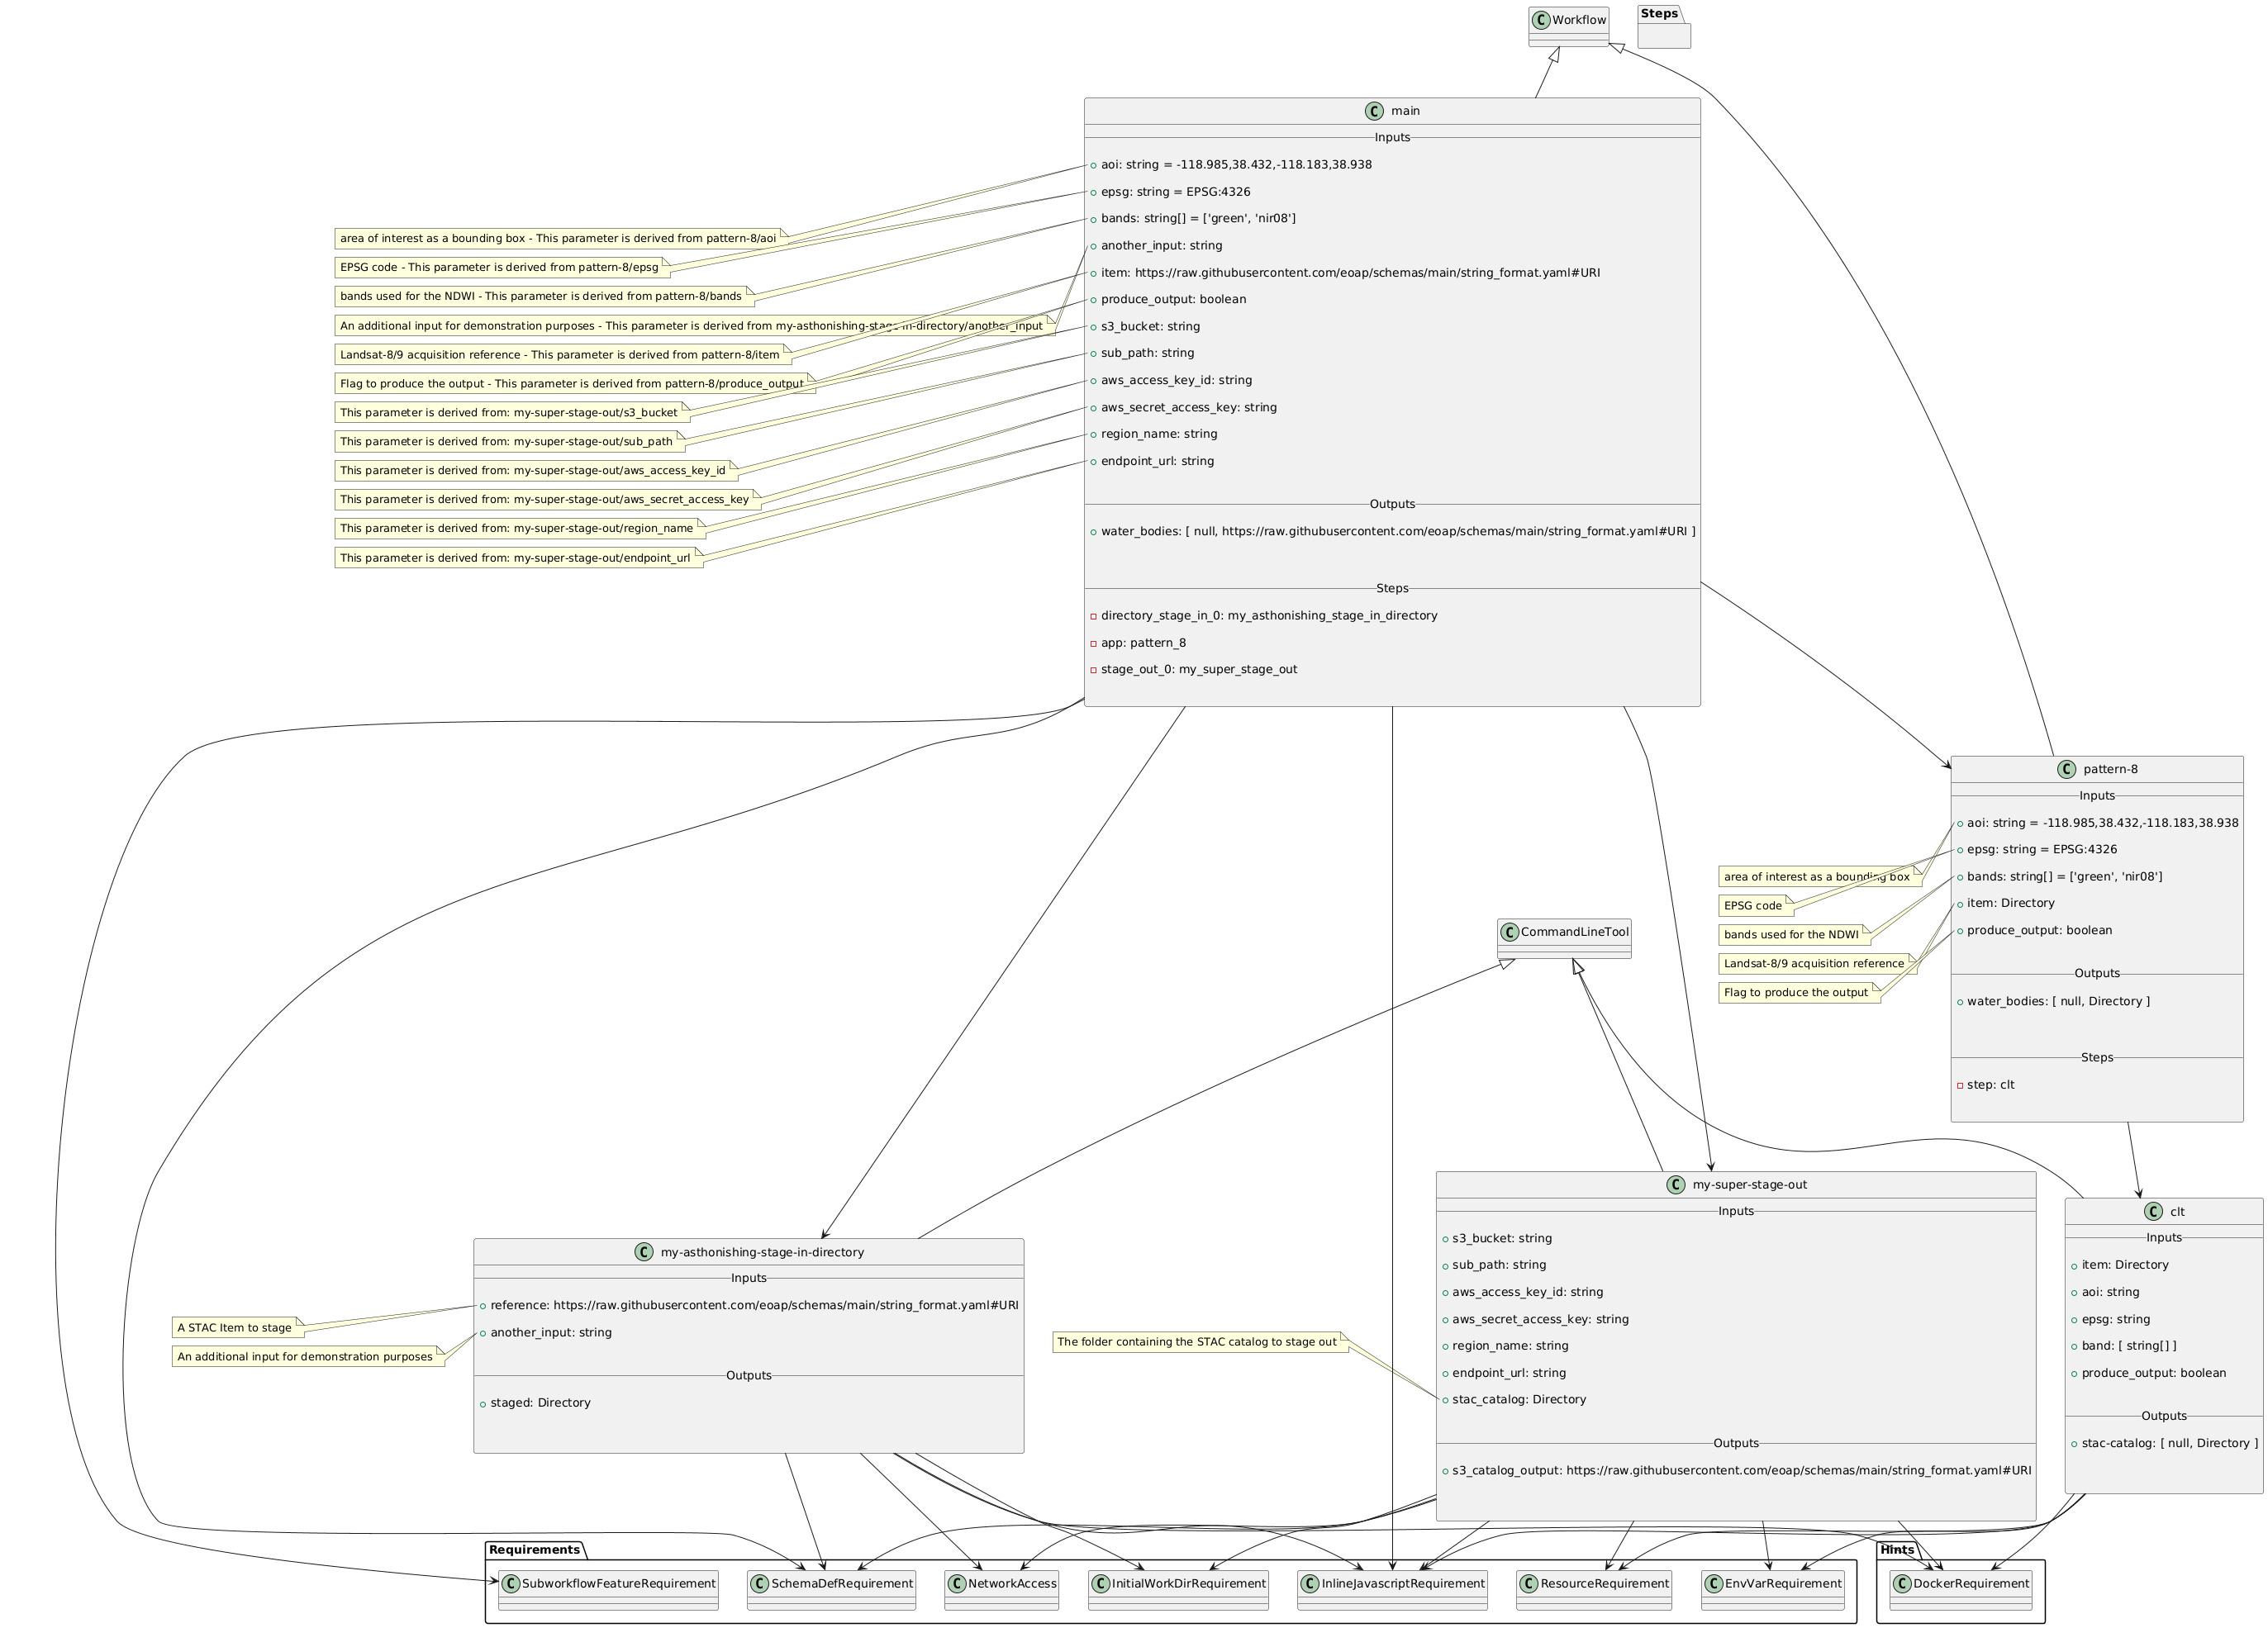

## sequence diagram

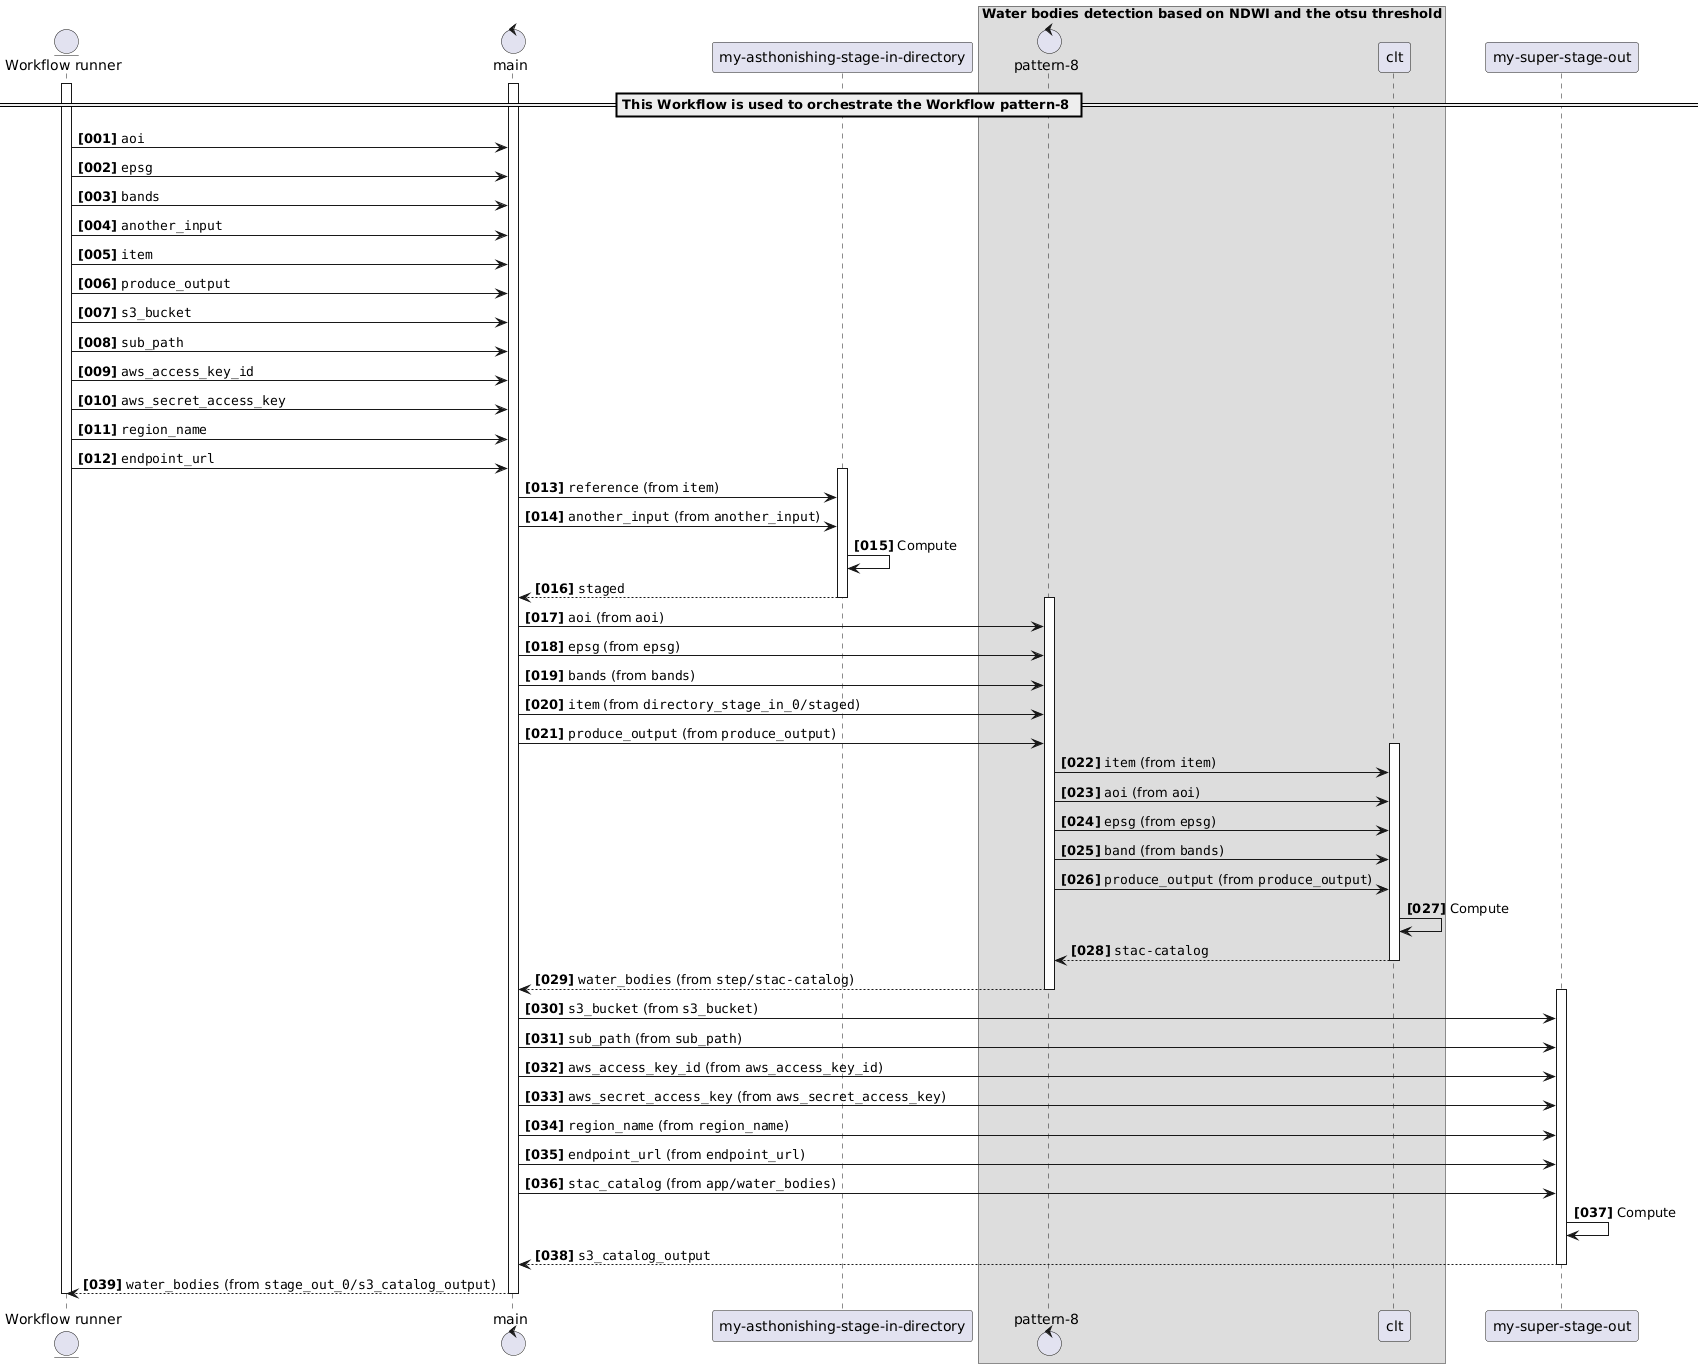

## state diagram

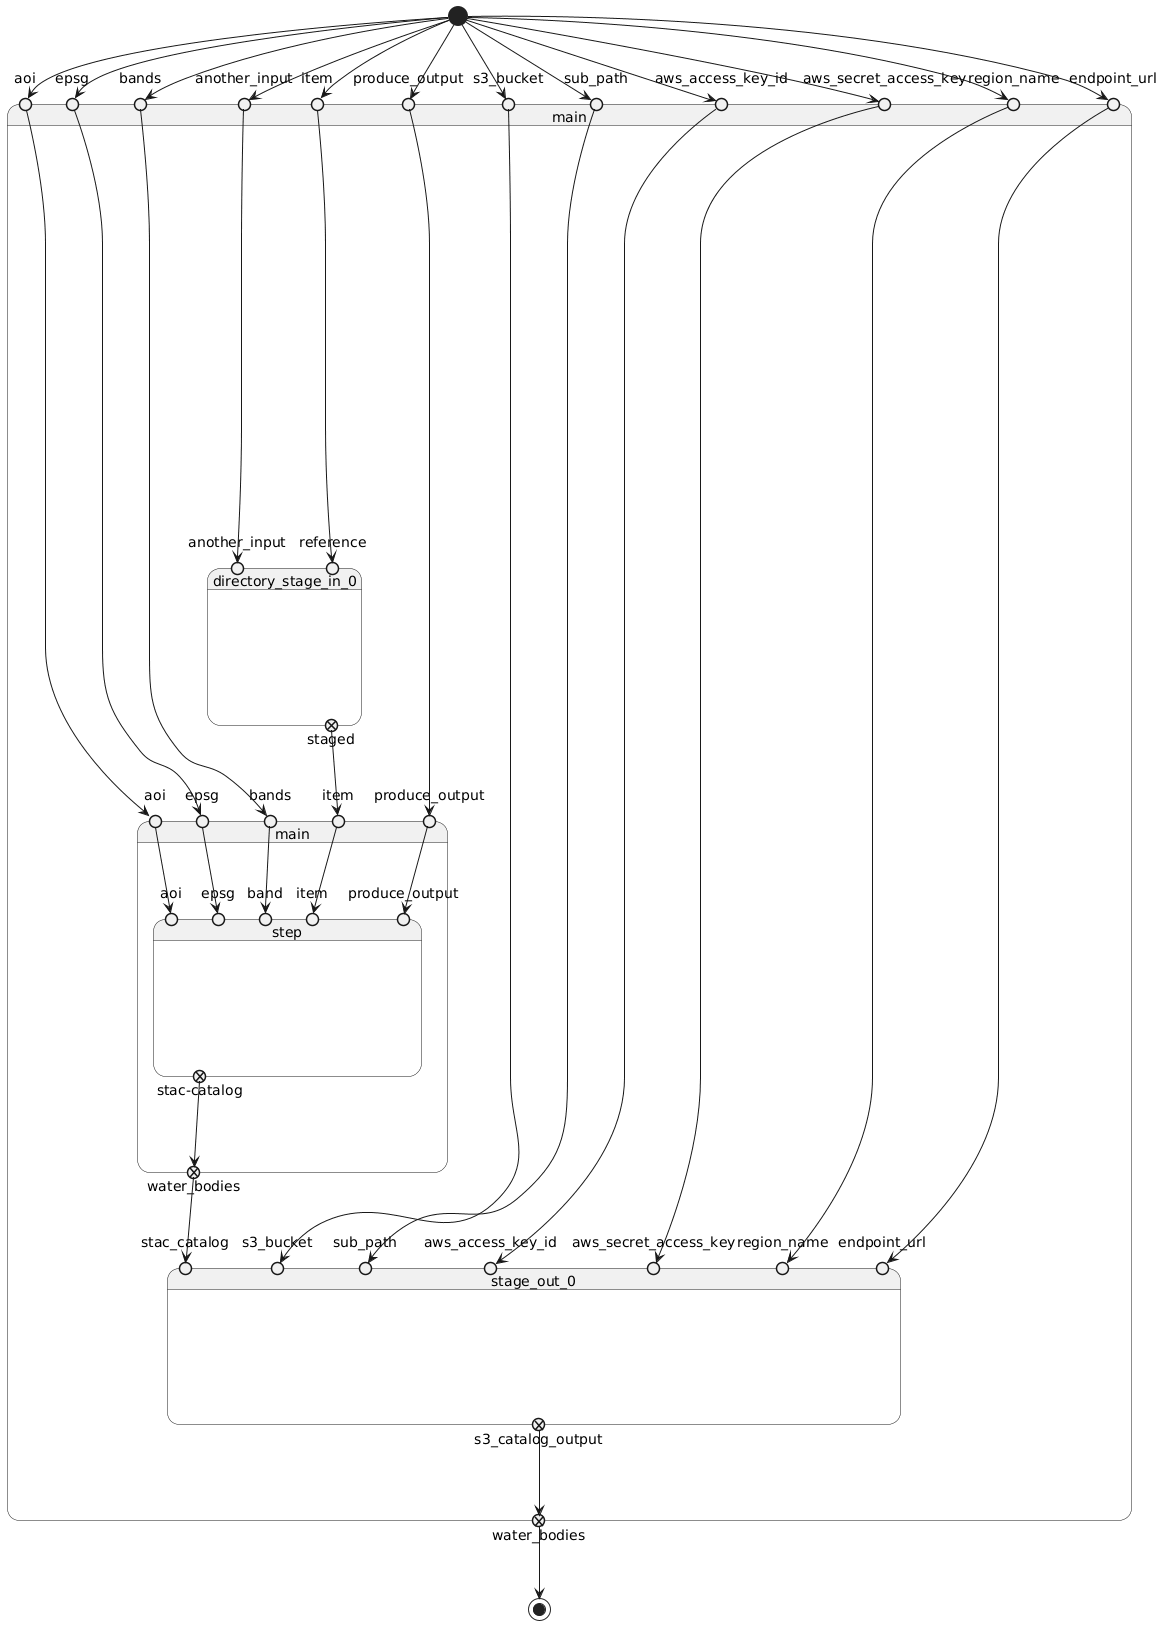

# Pattern 9

## component diagram

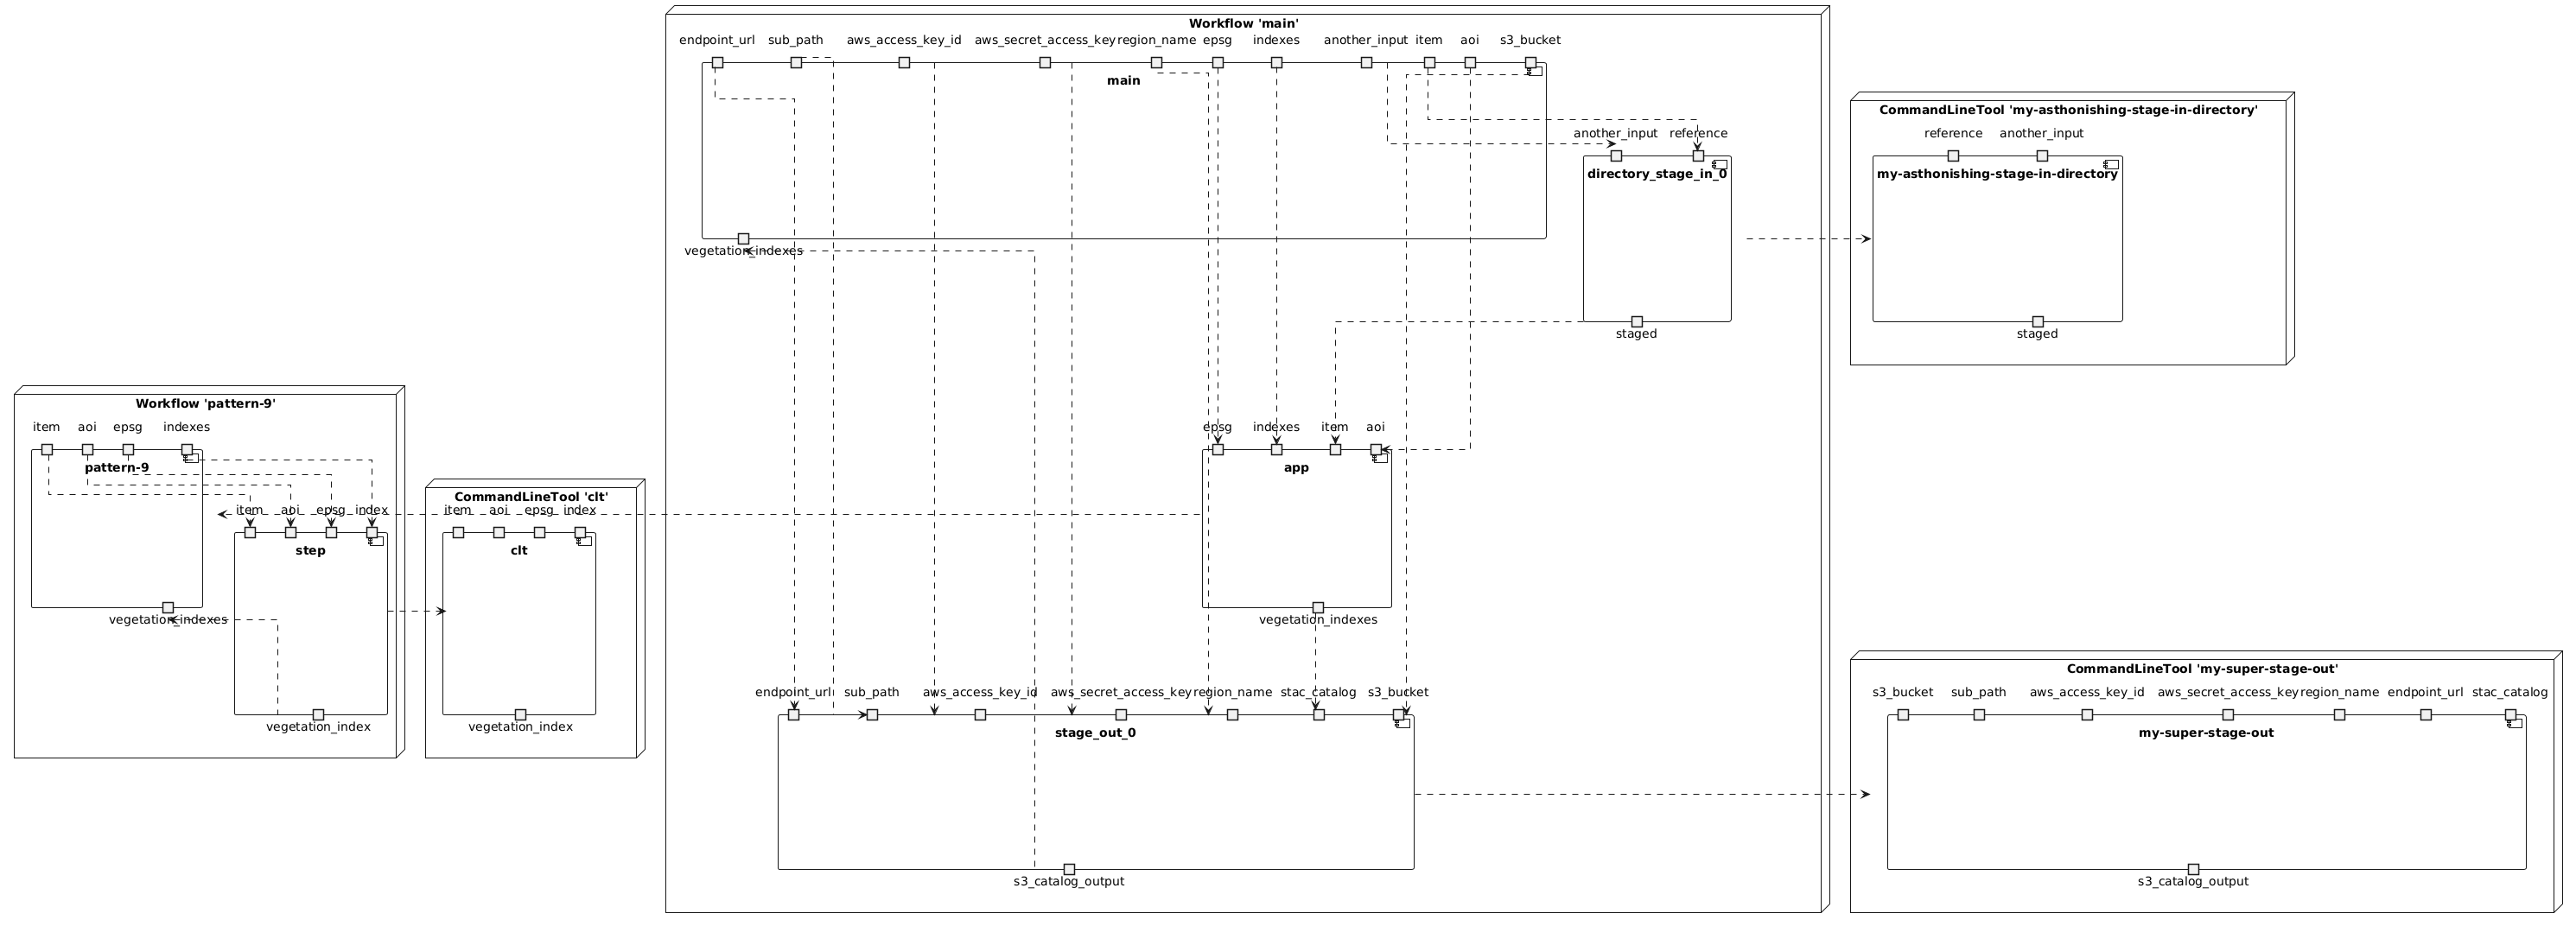

## class diagram

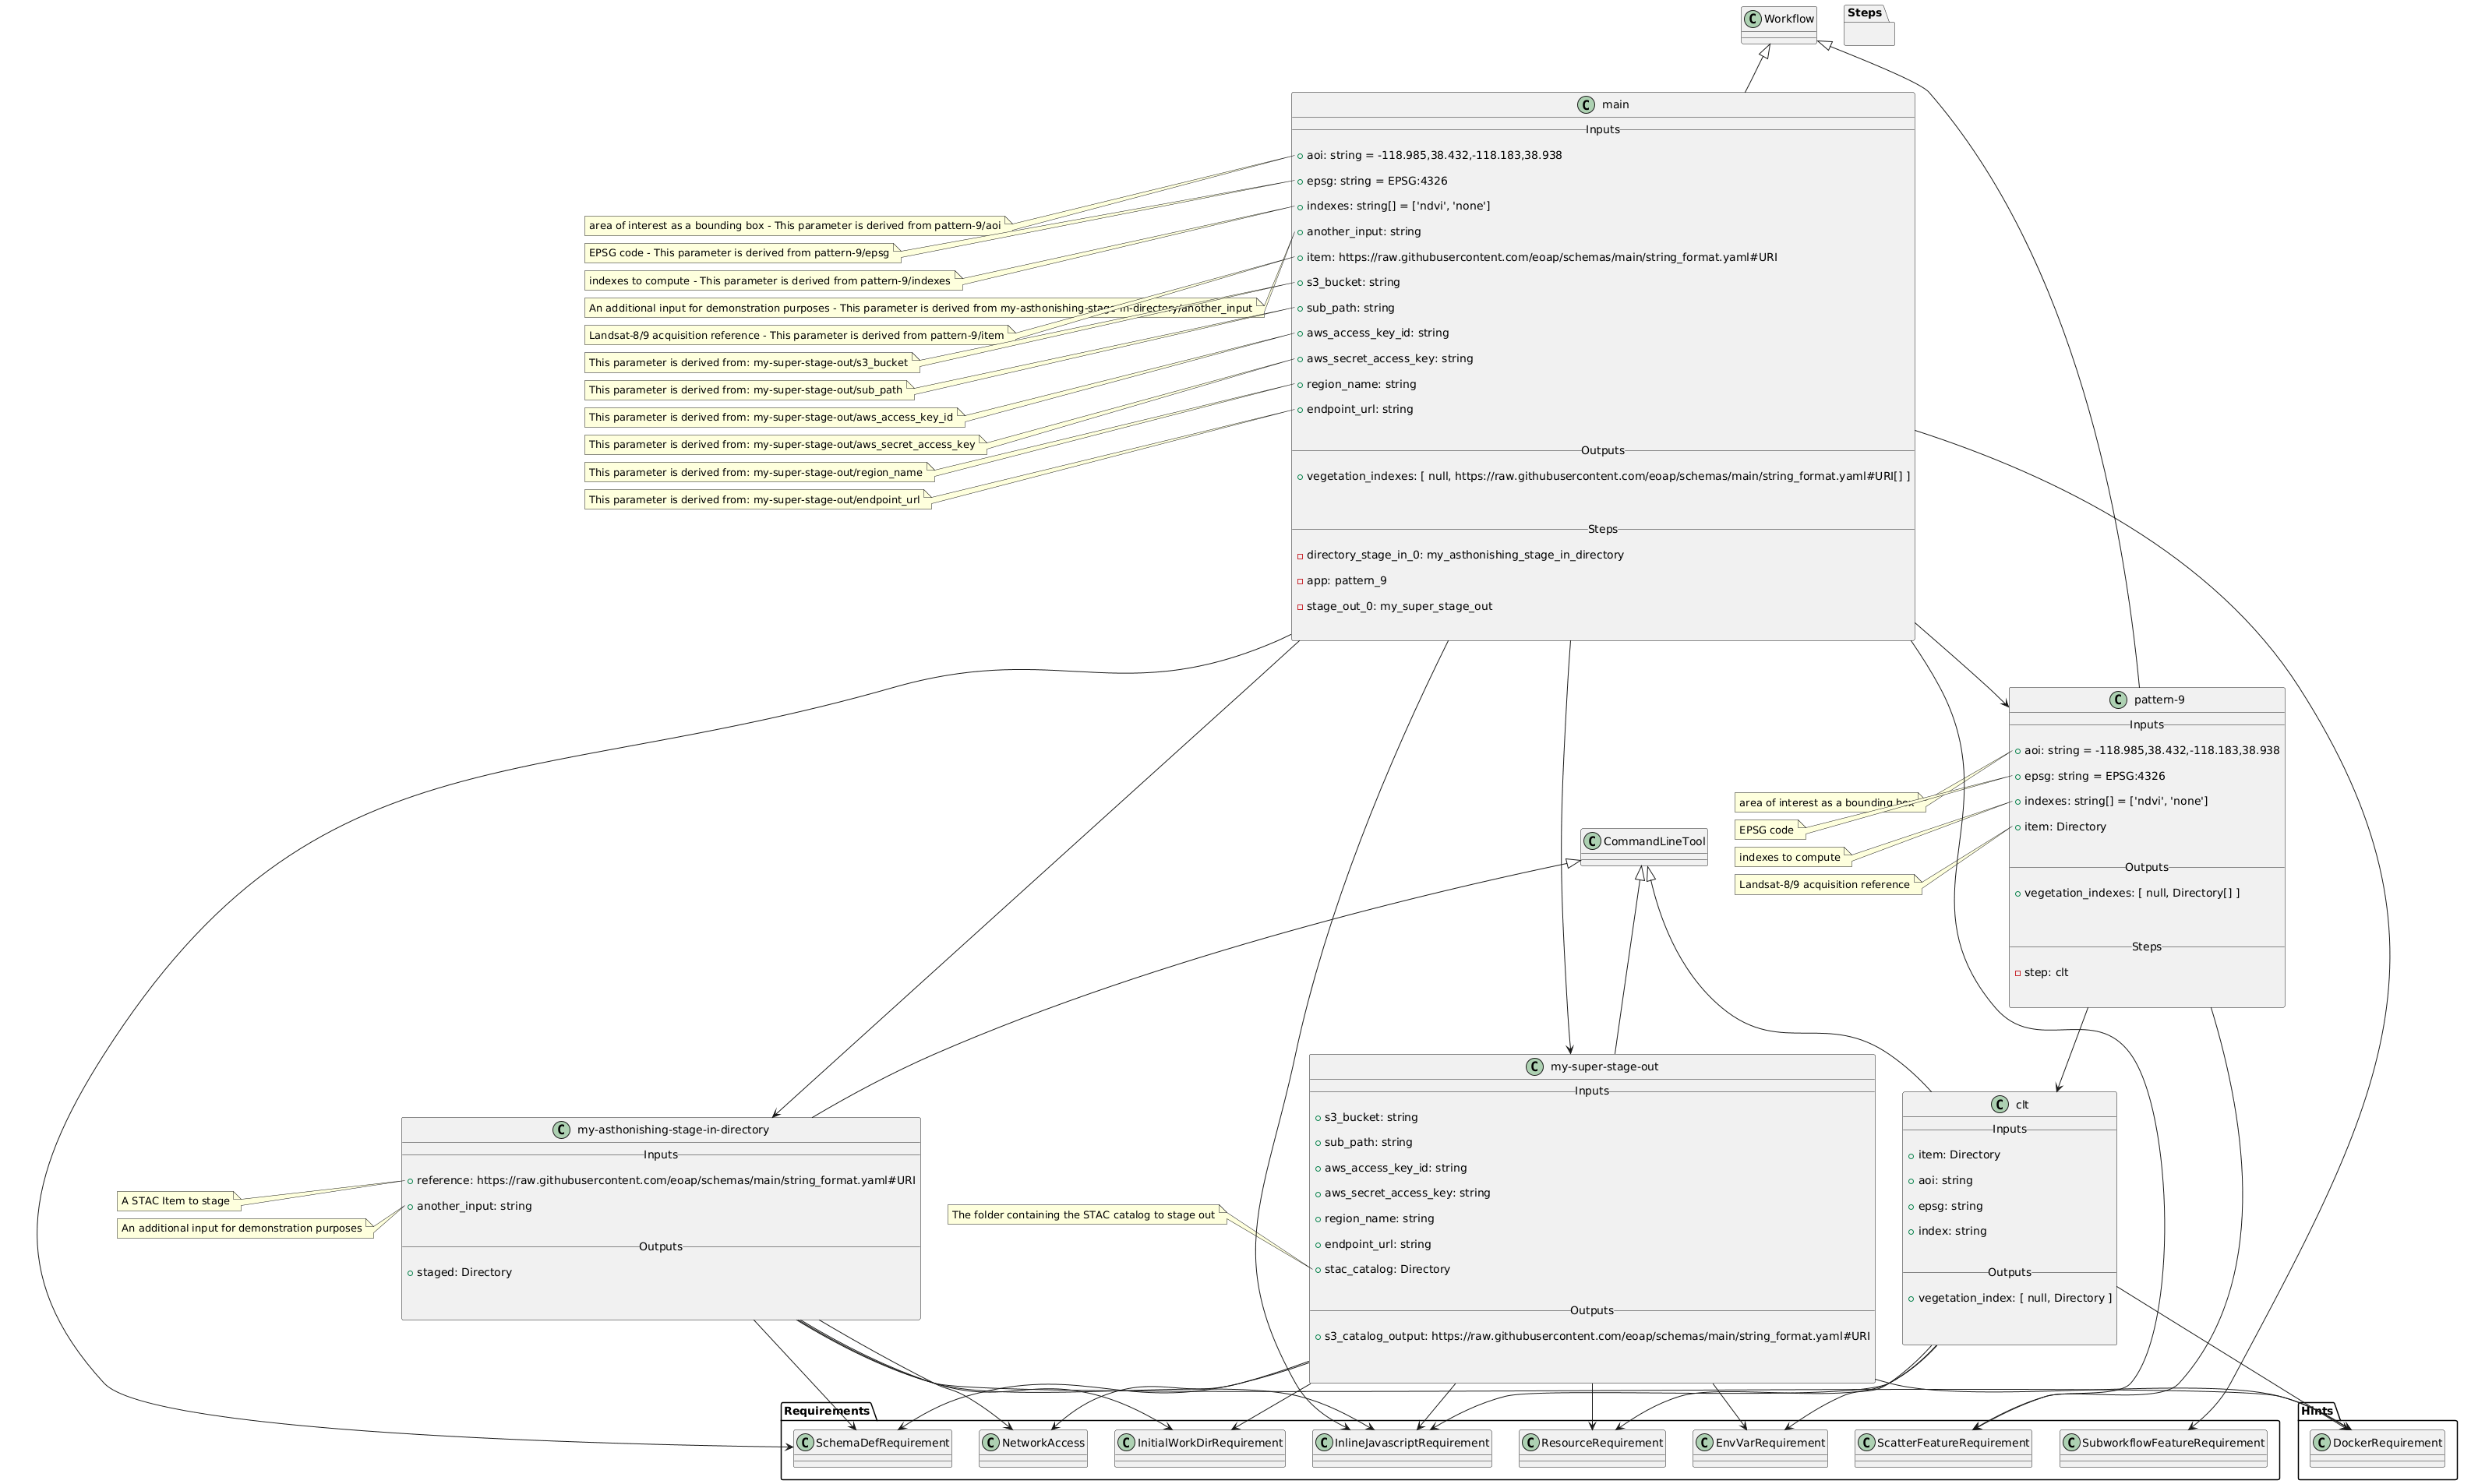

## sequence diagram

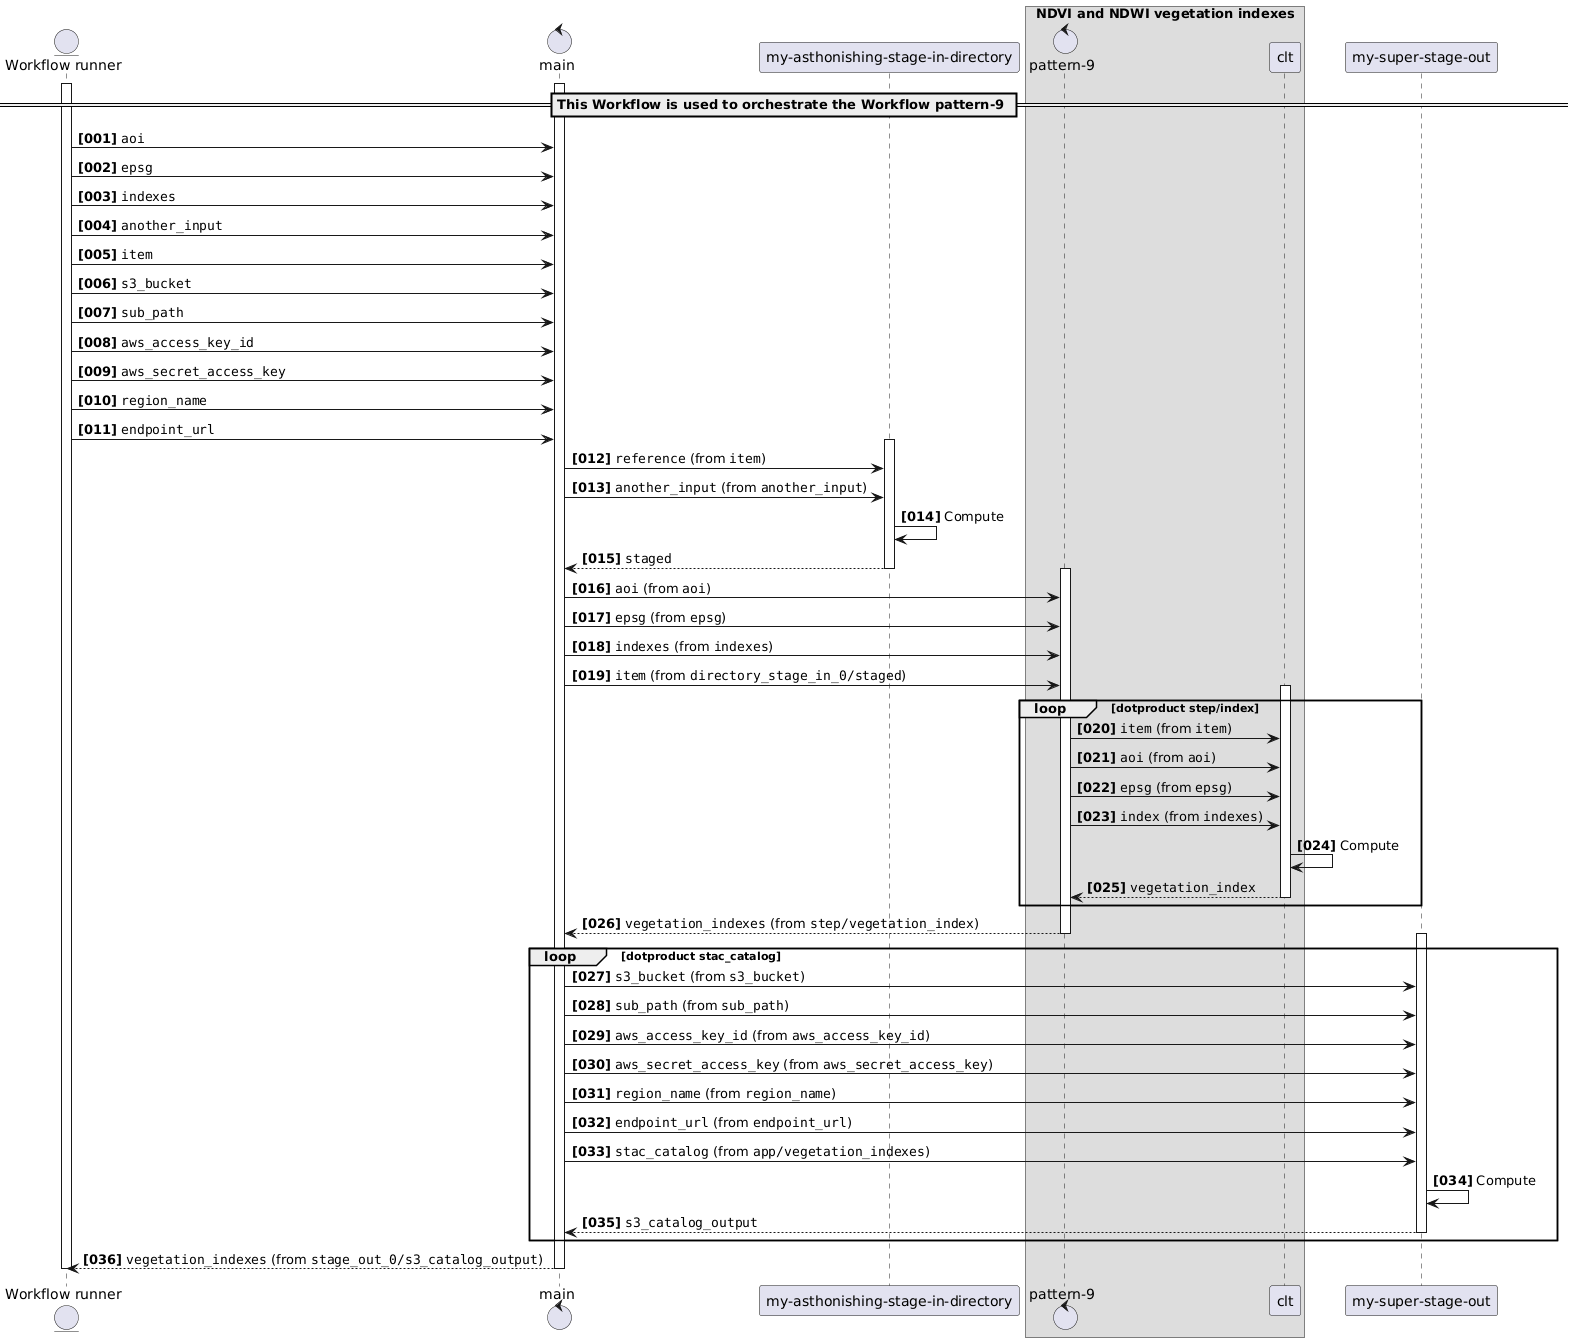

## state diagram

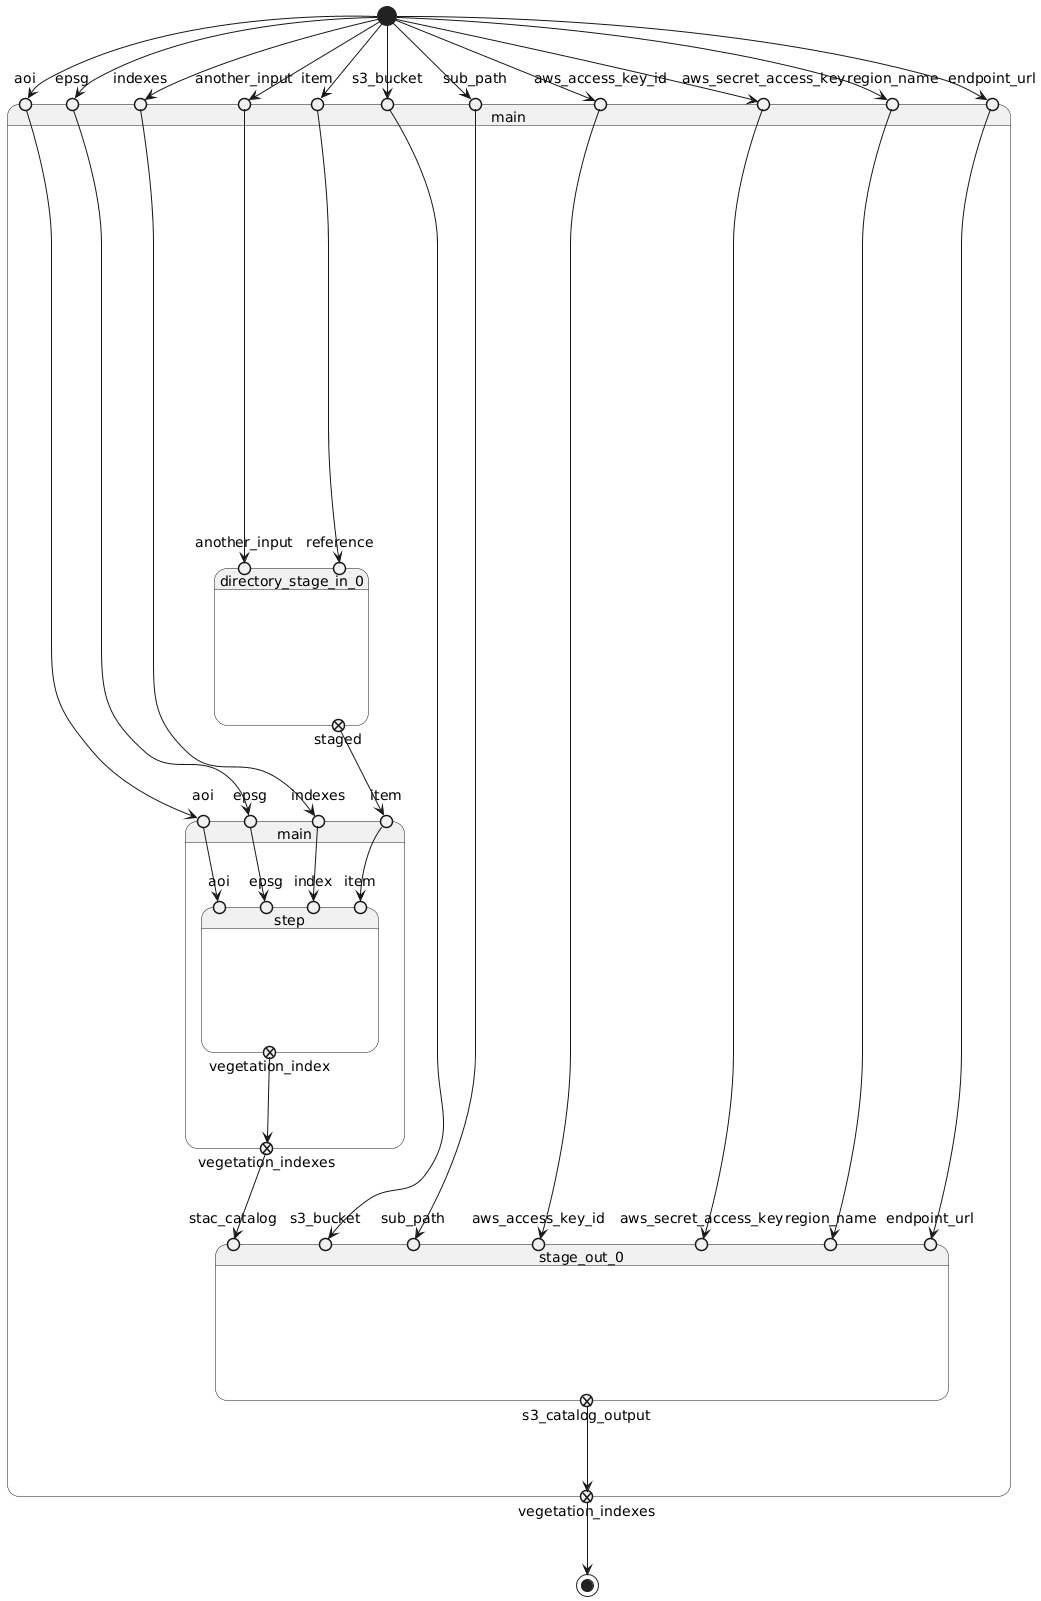

# Pattern 10

## component diagram

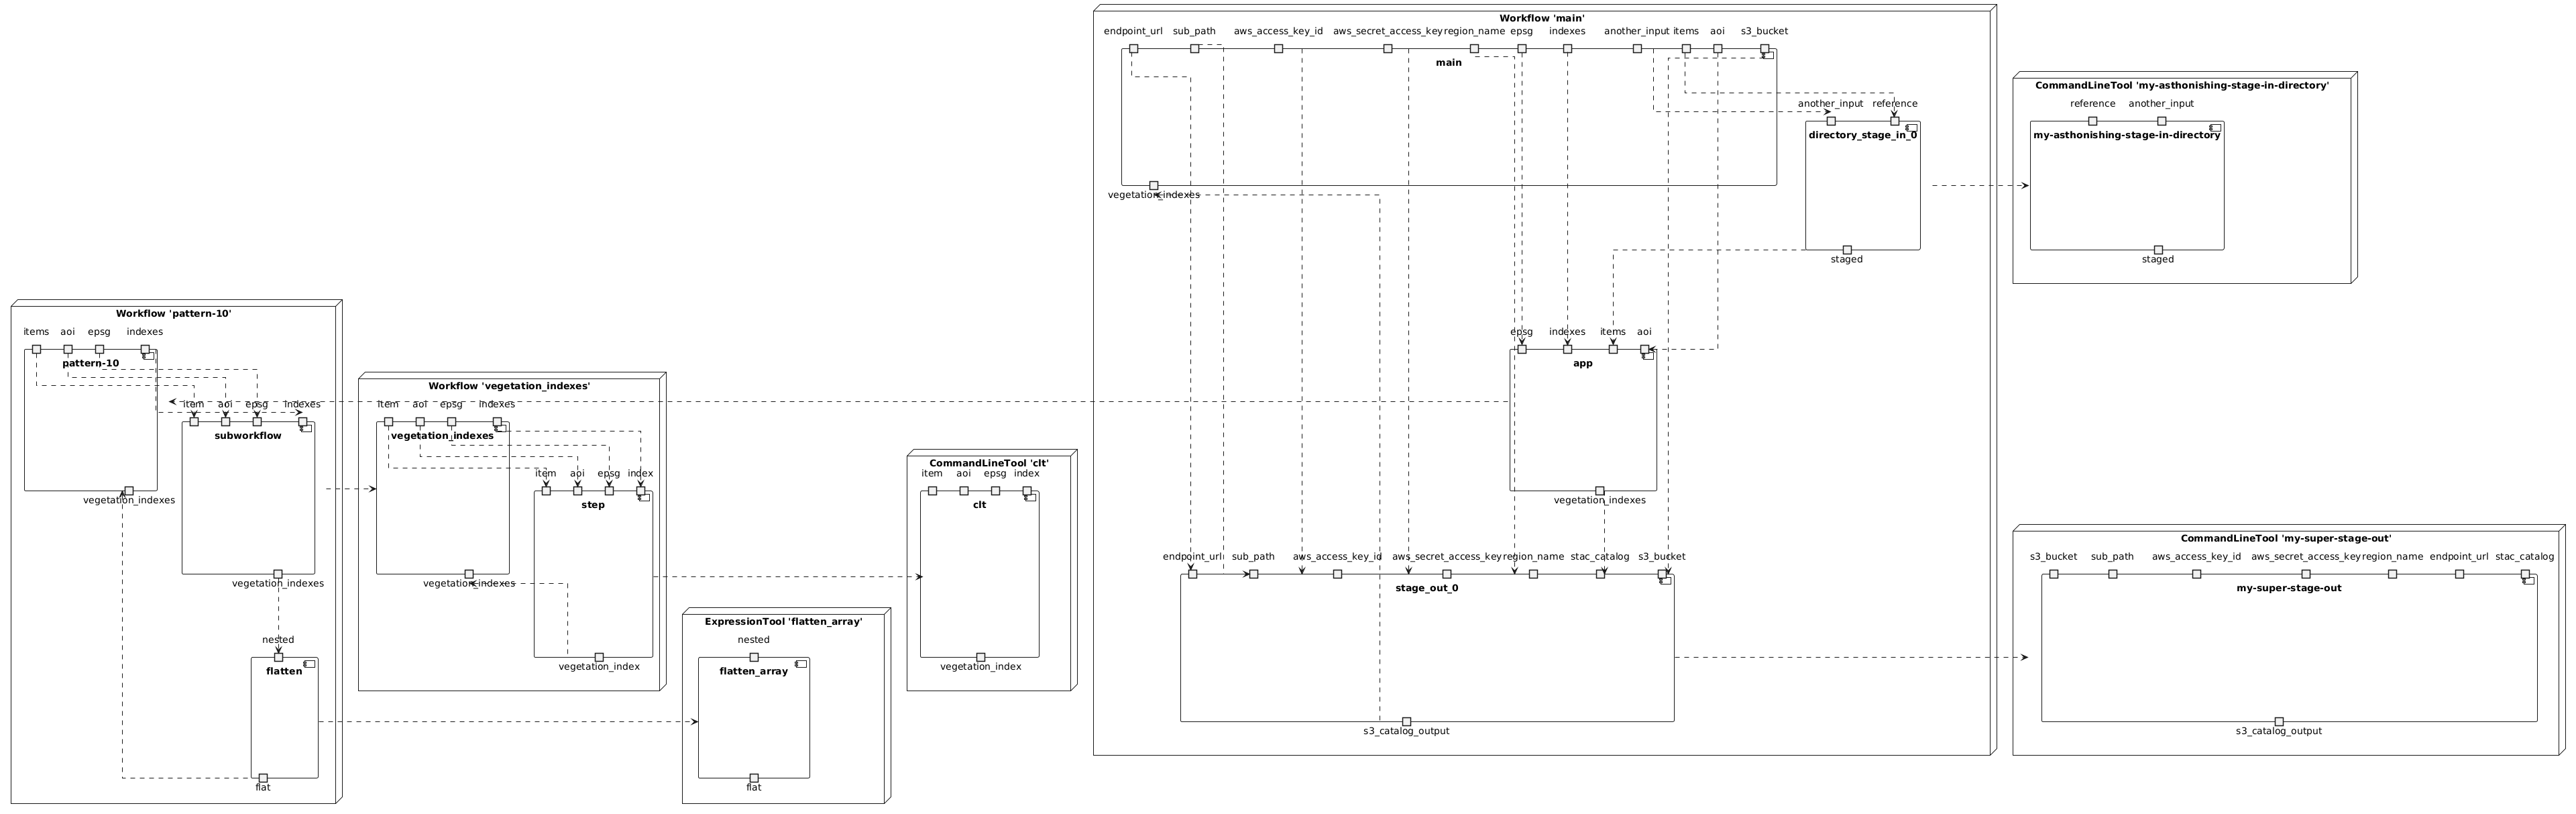

## class diagram

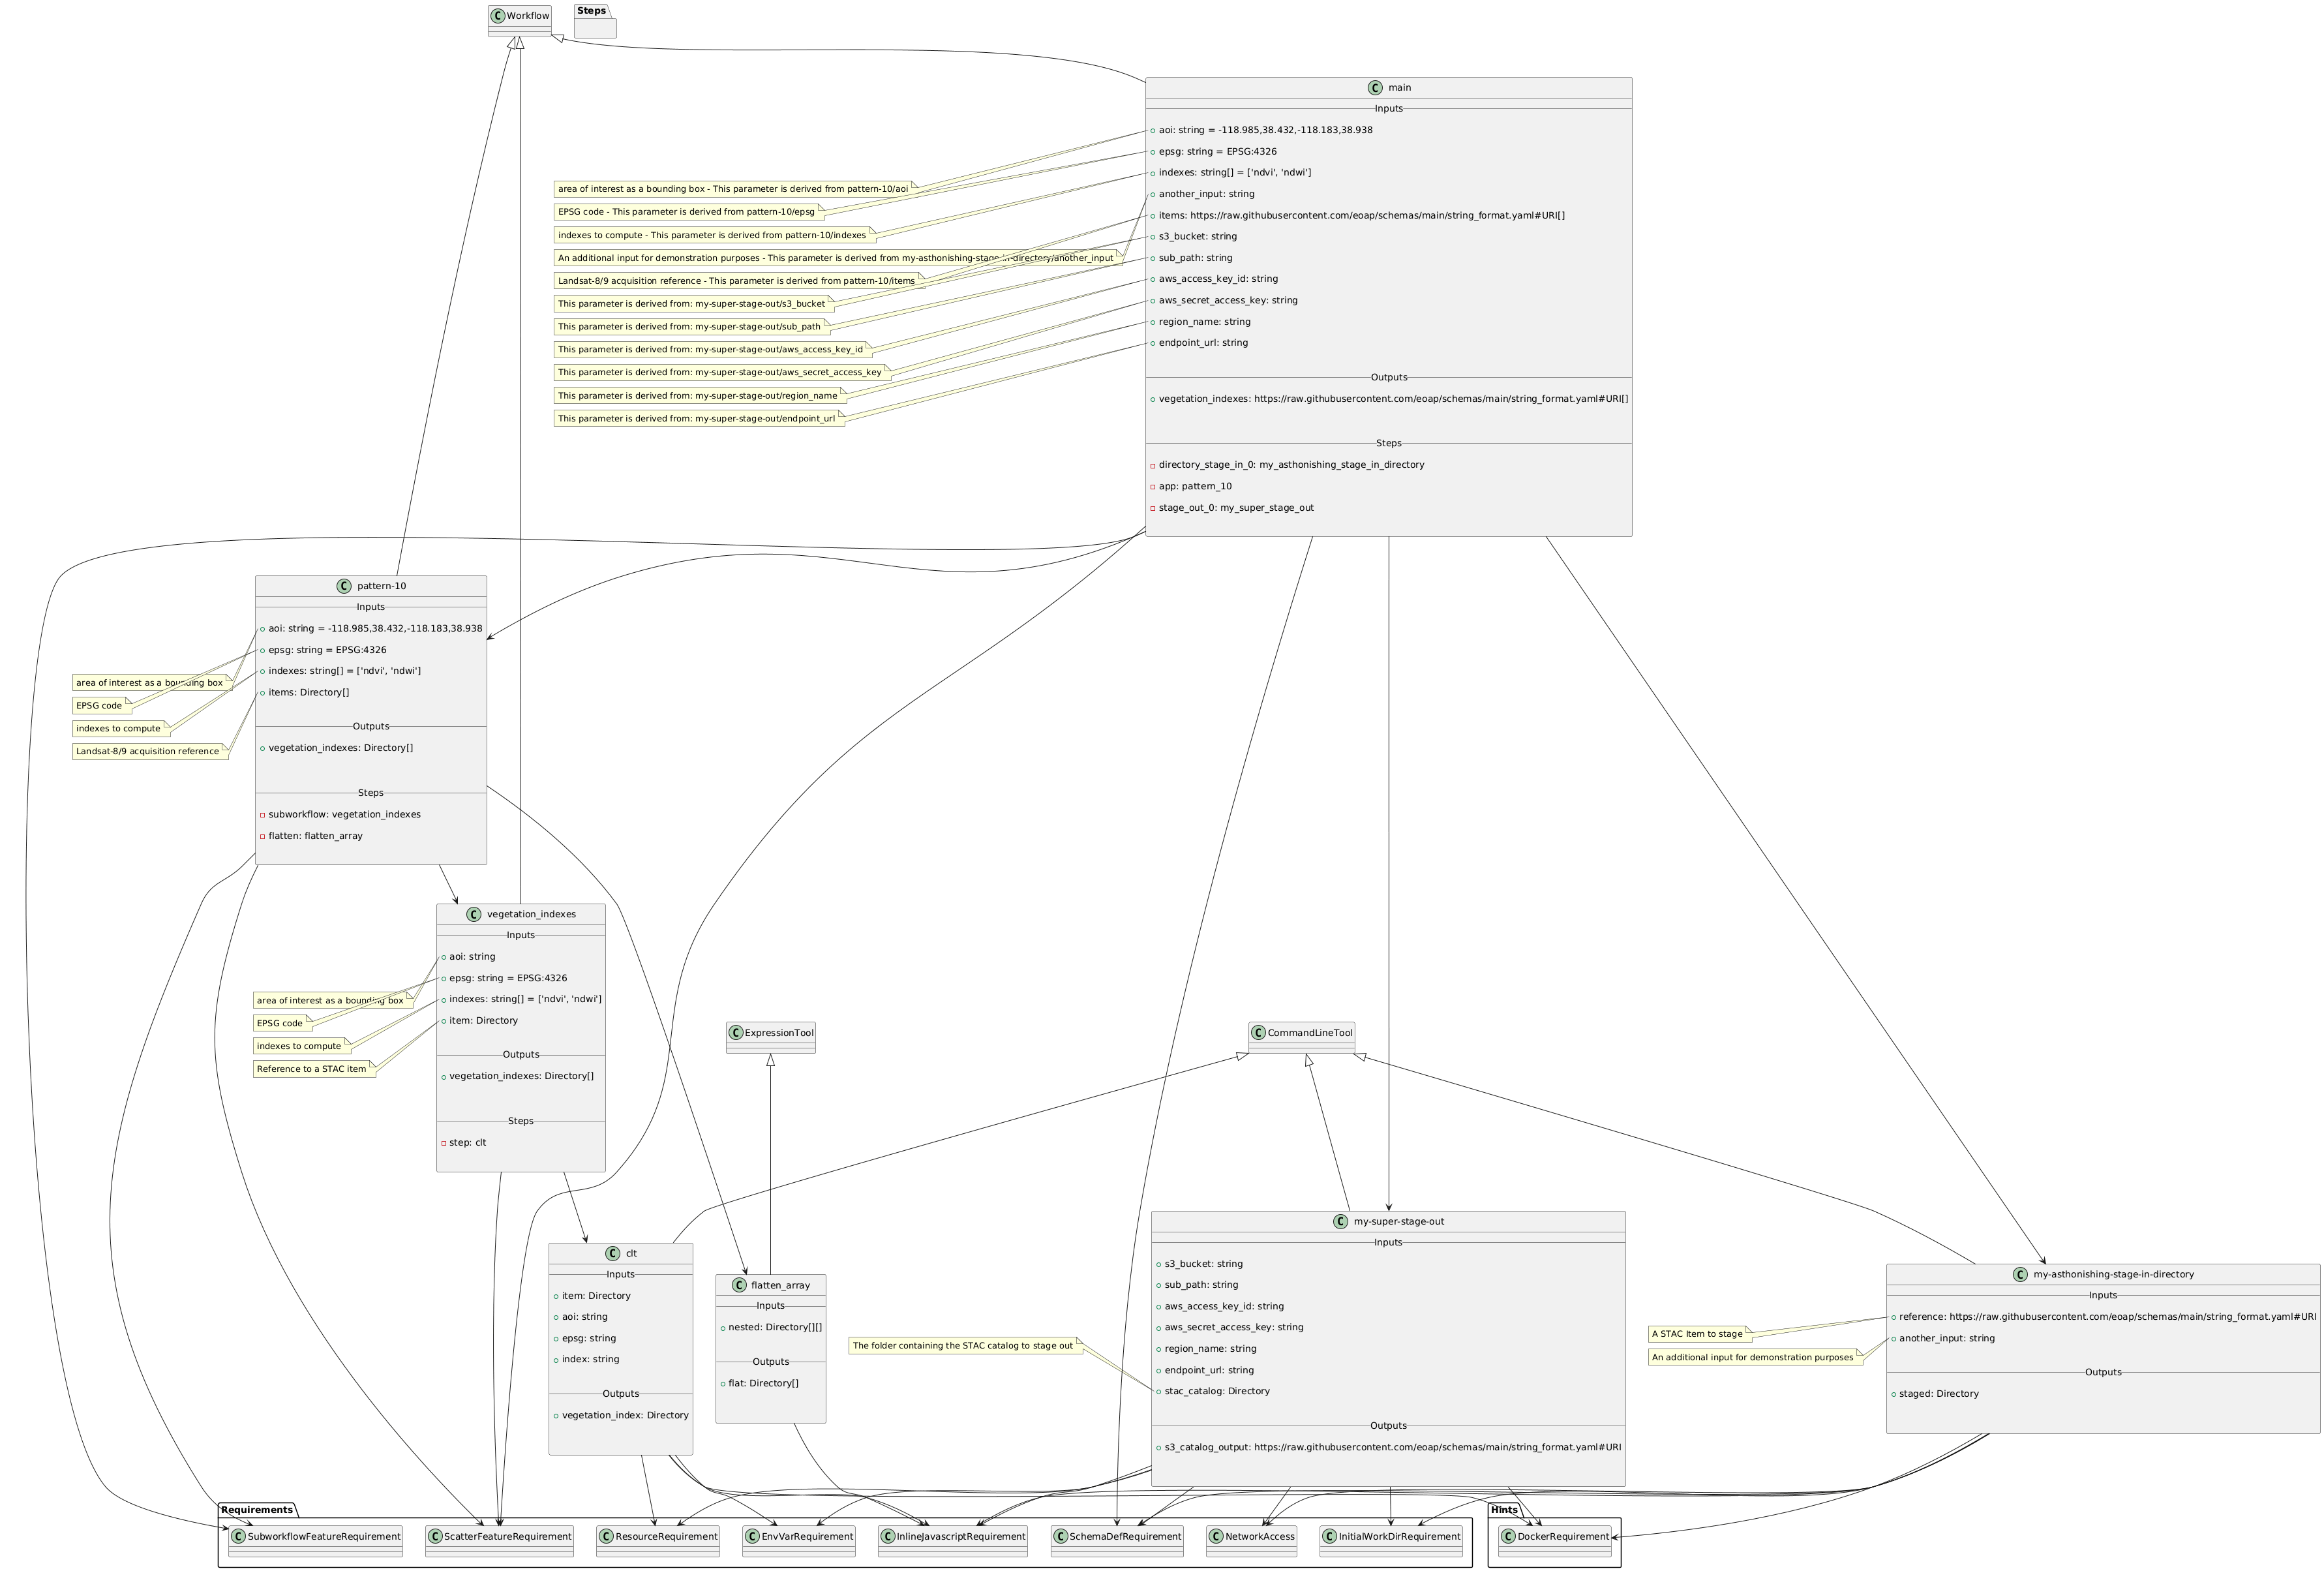

## sequence diagram

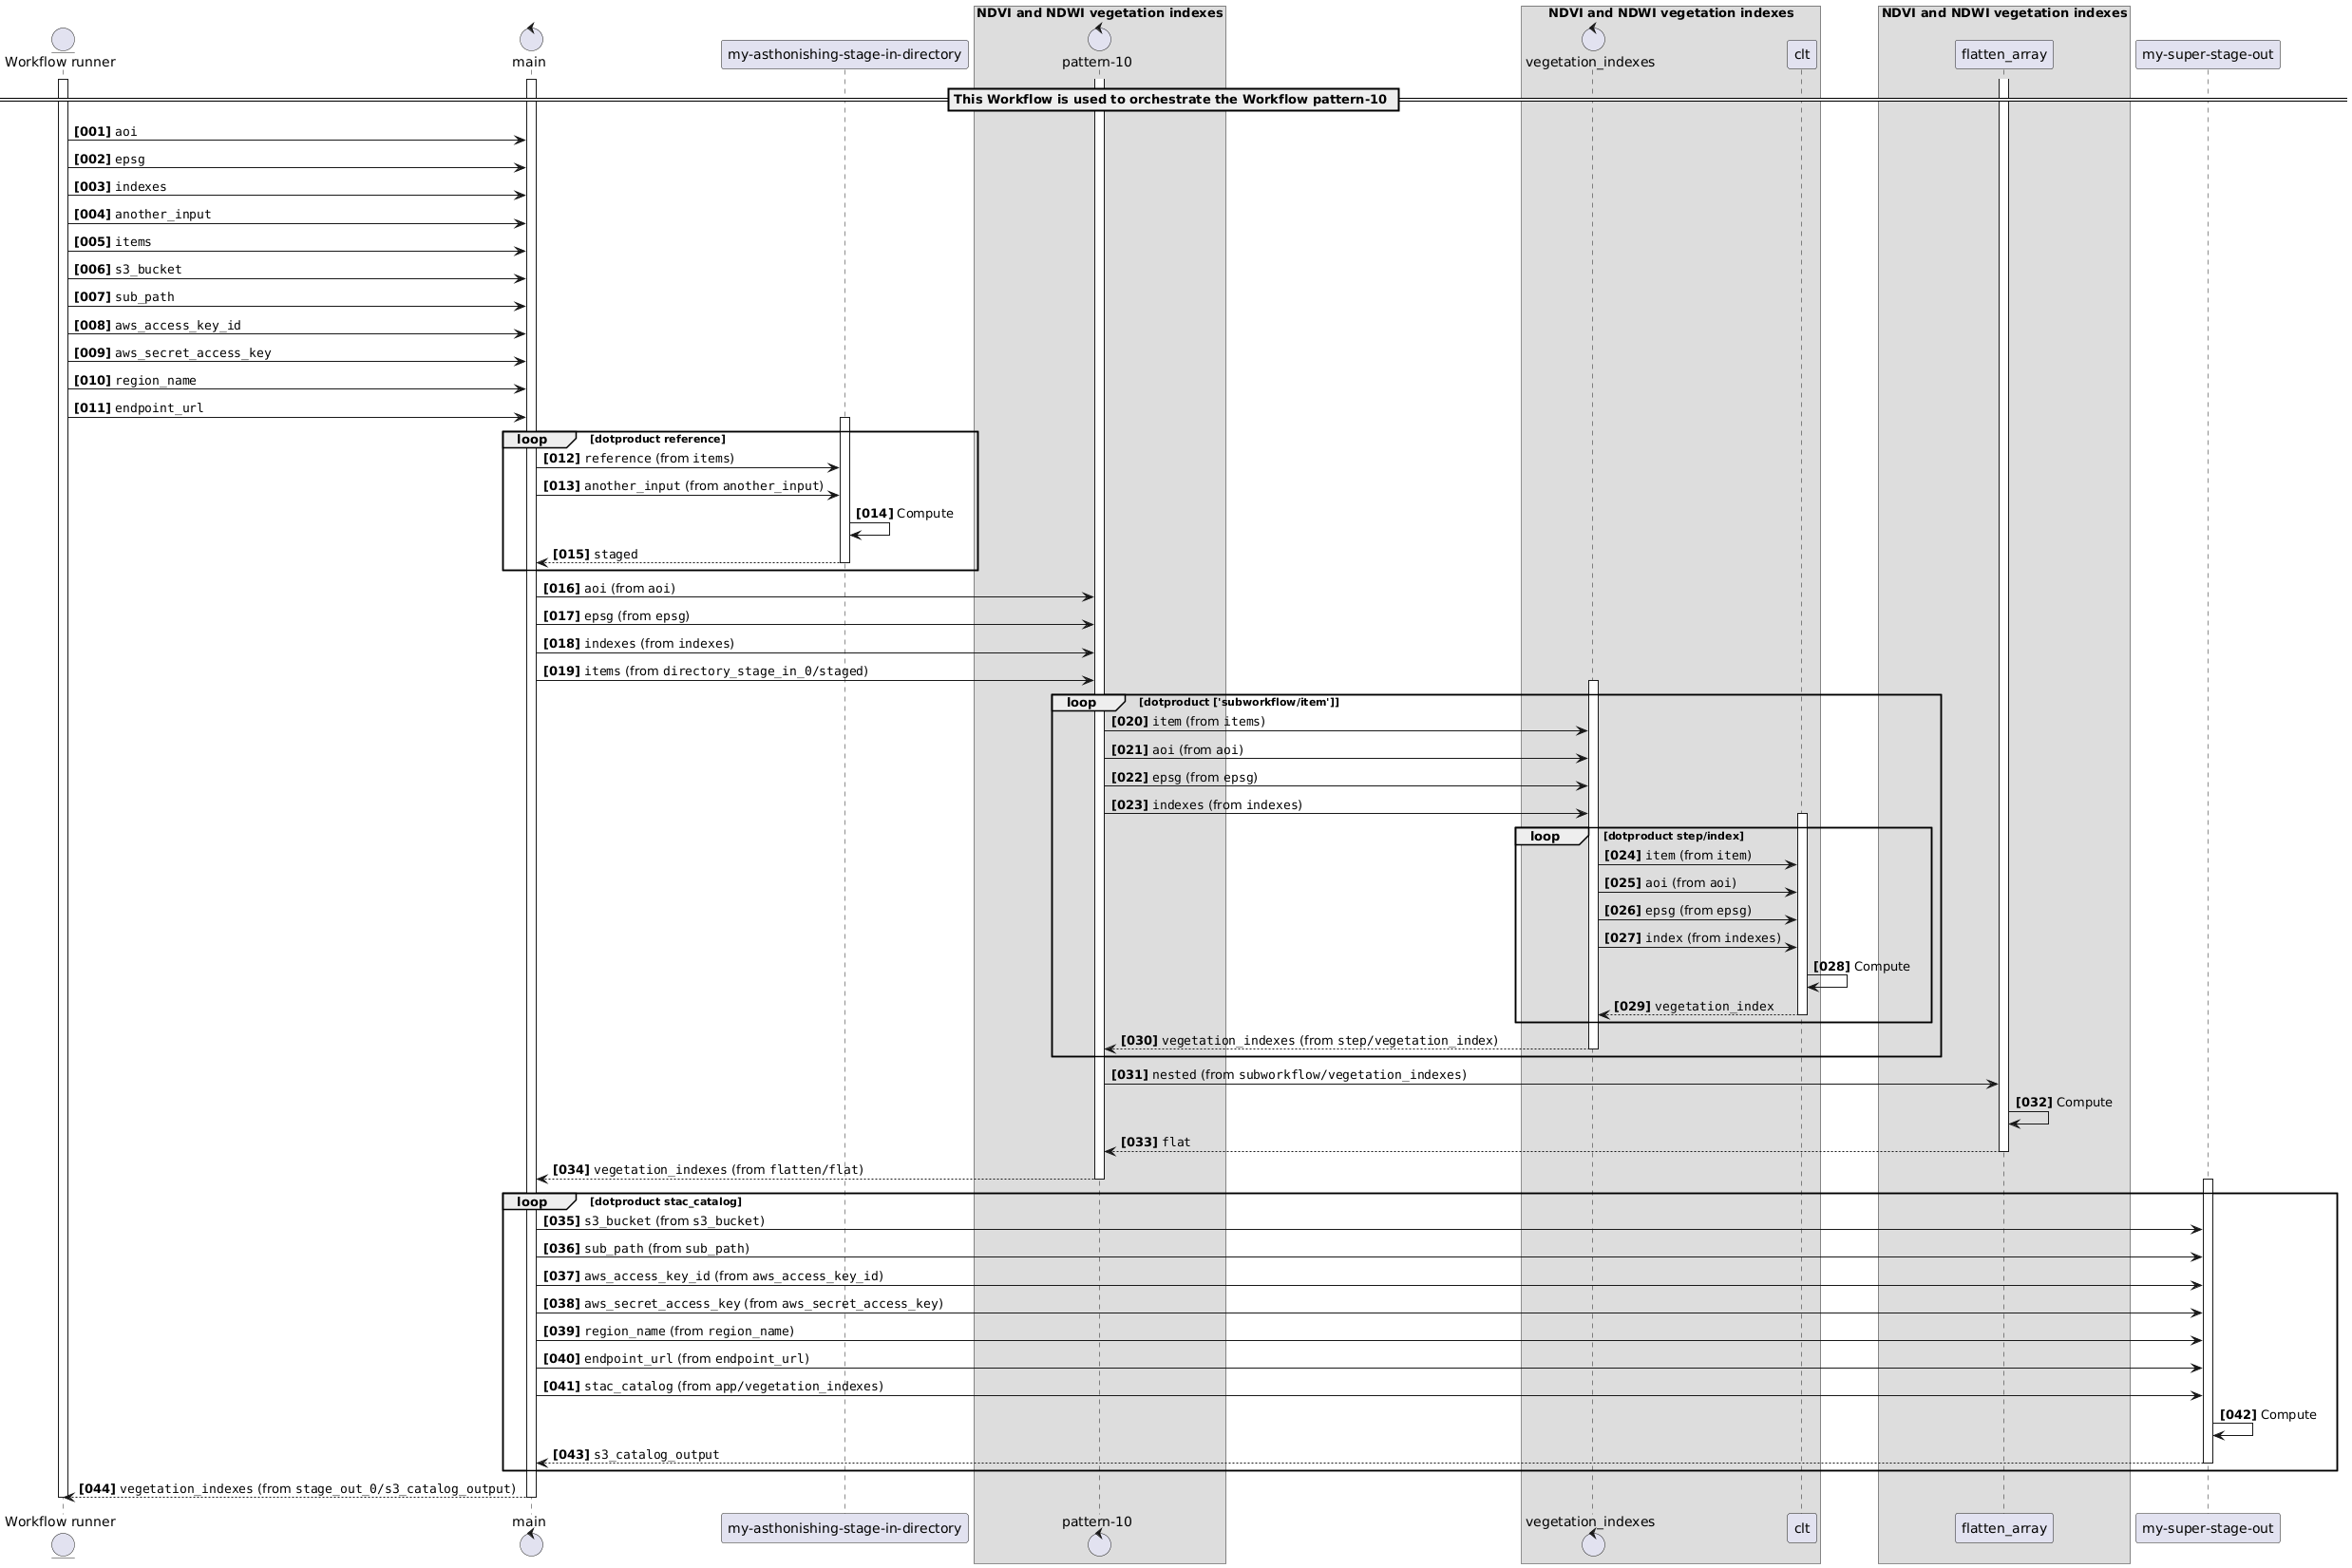

## state diagram

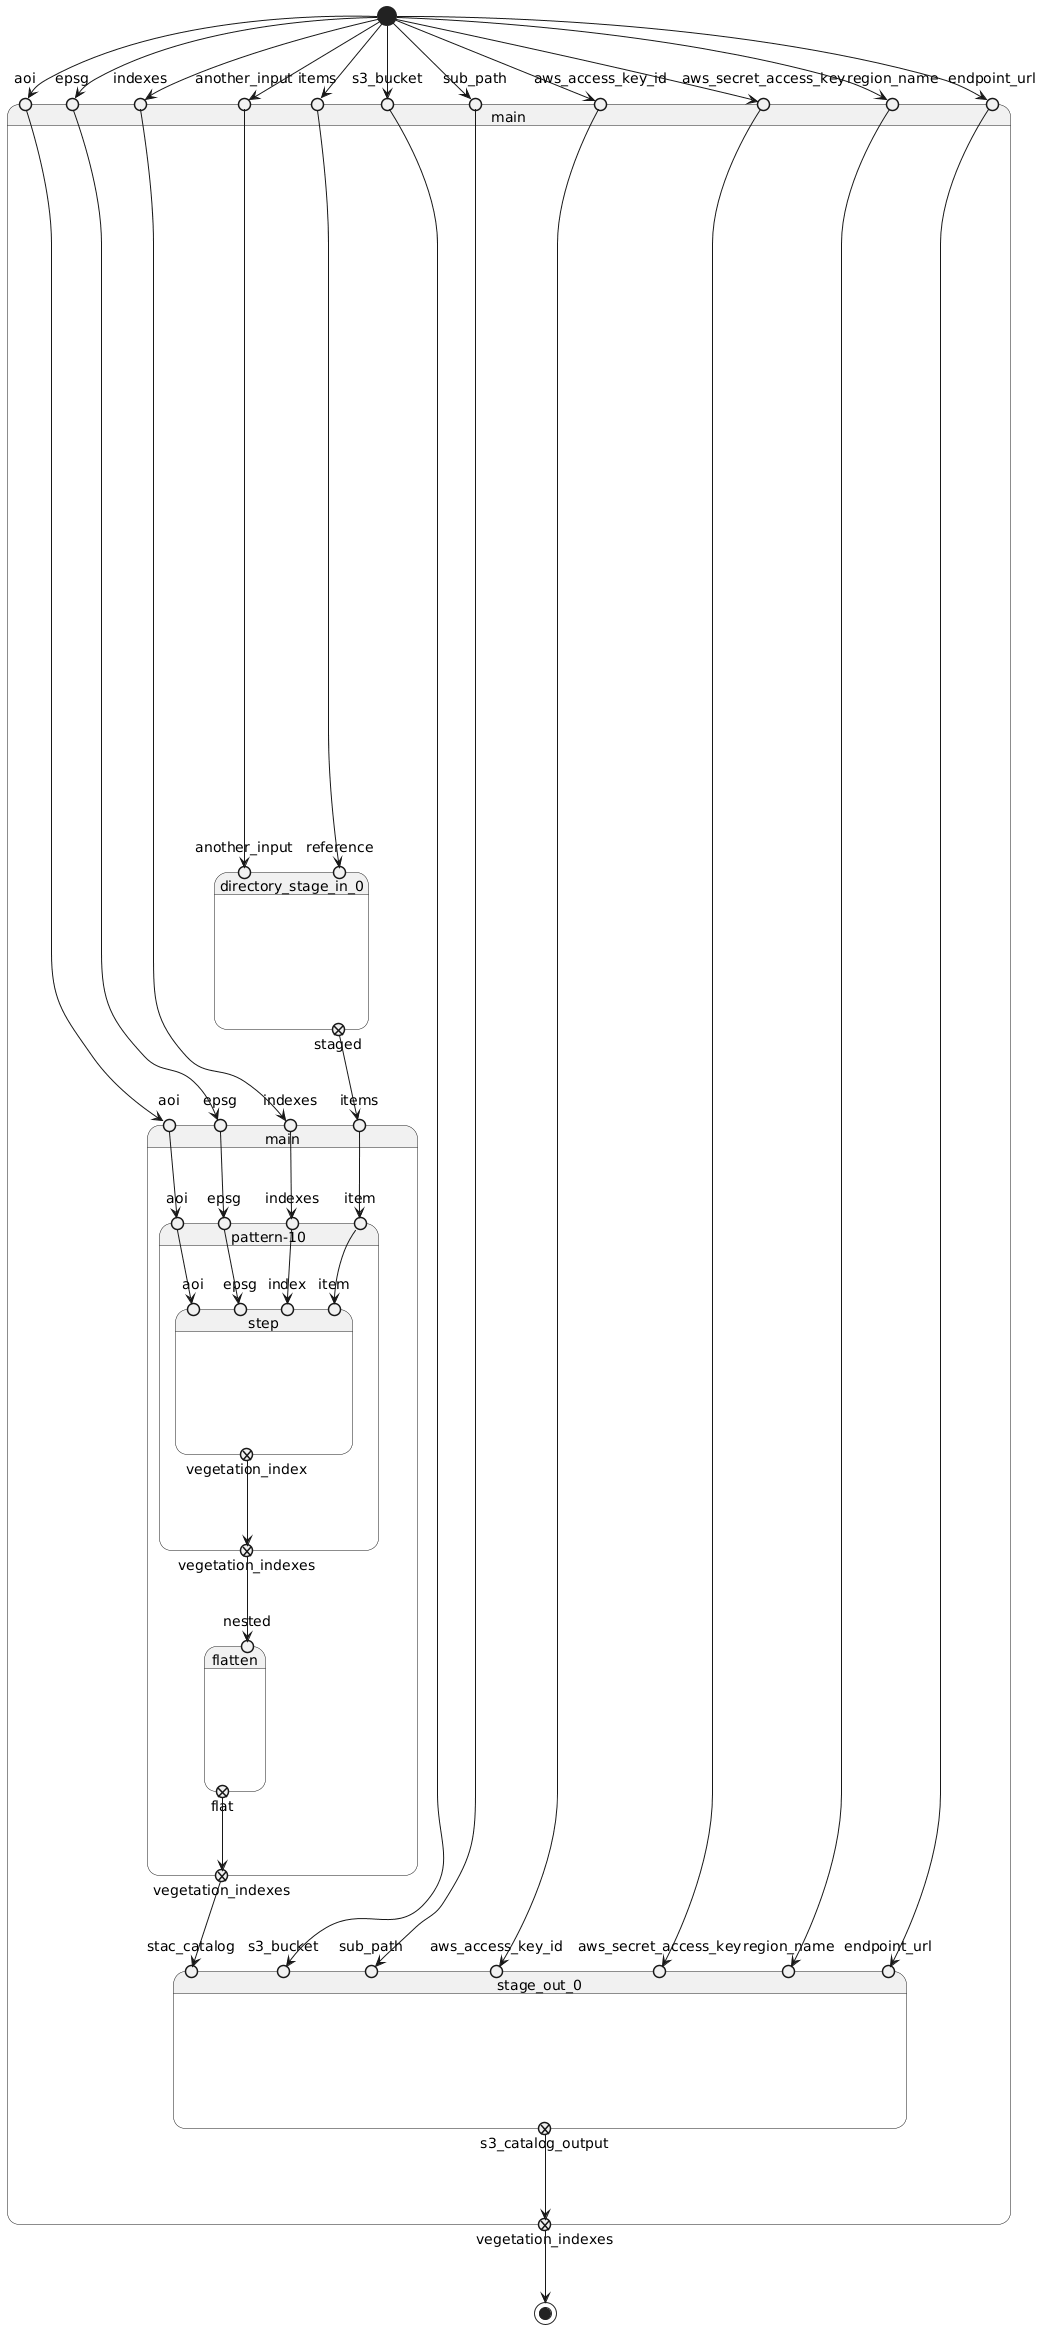

# Pattern 11

## component diagram

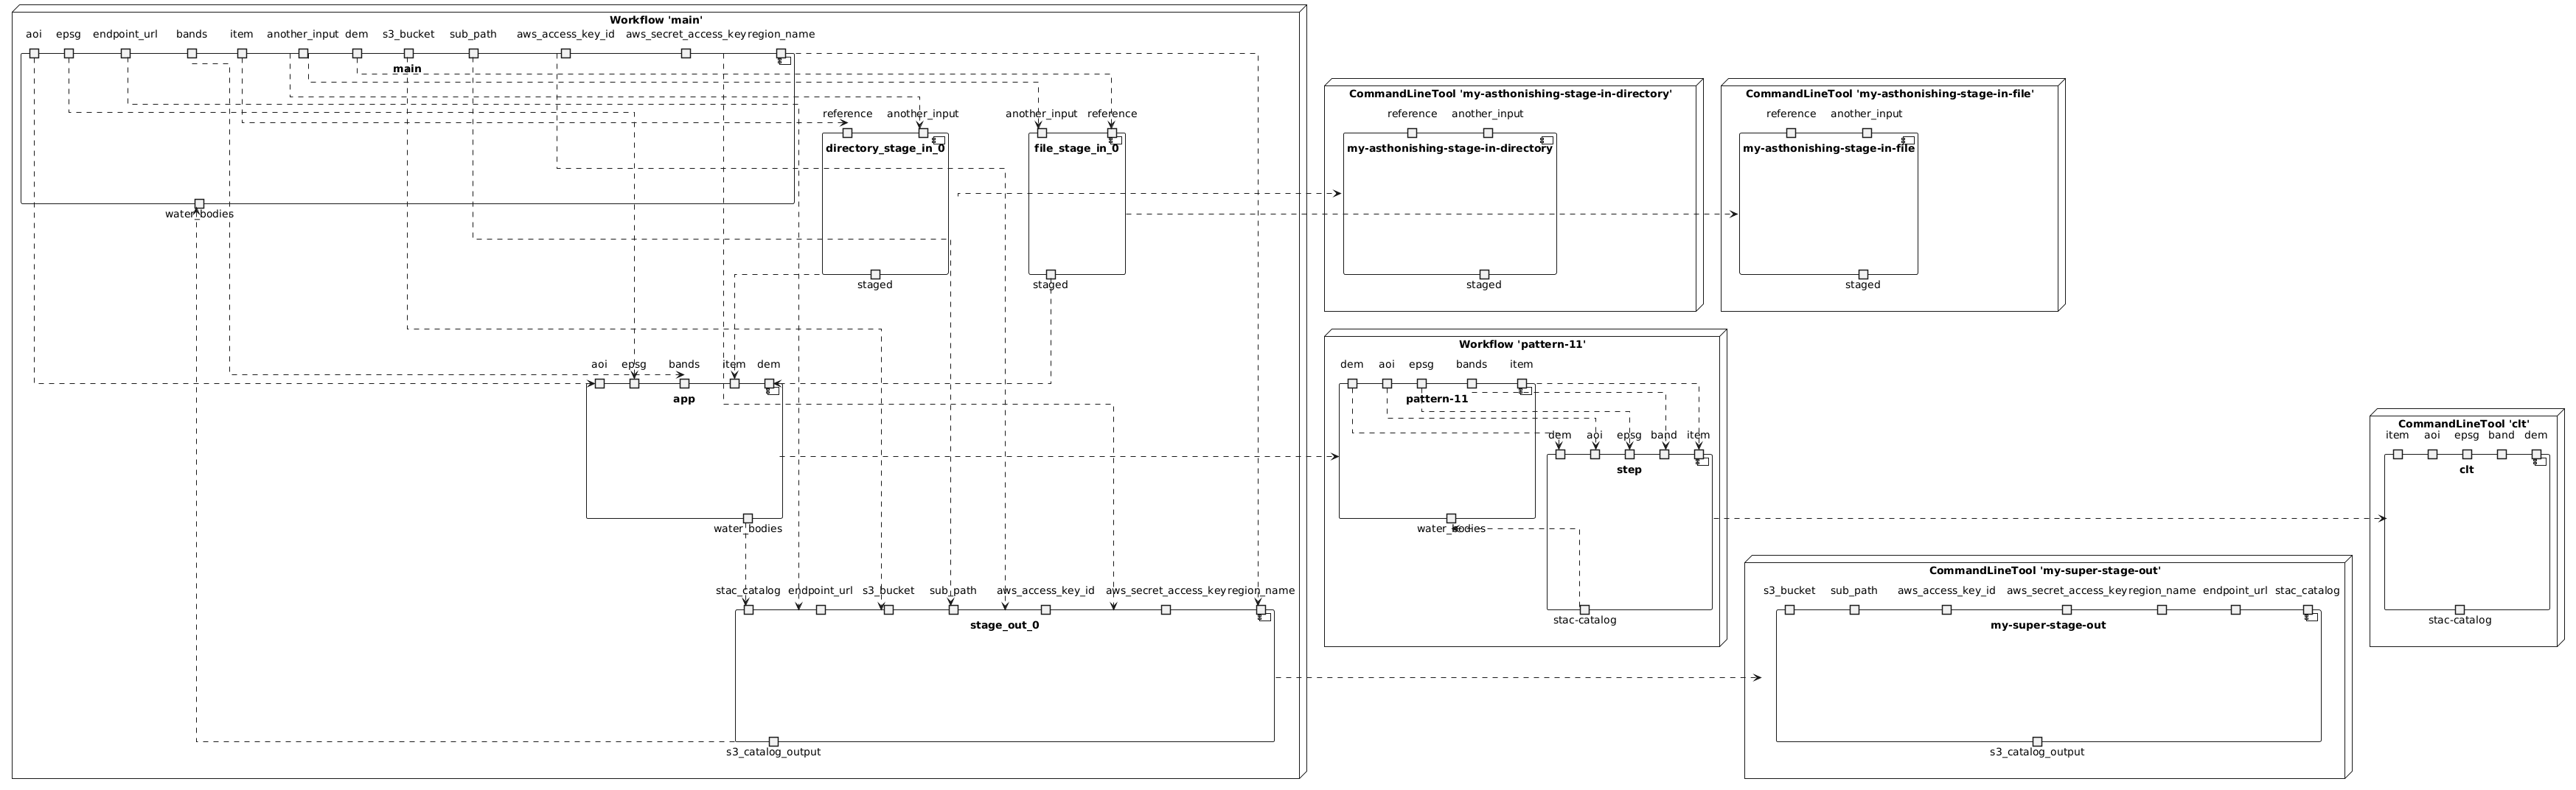

## class diagram

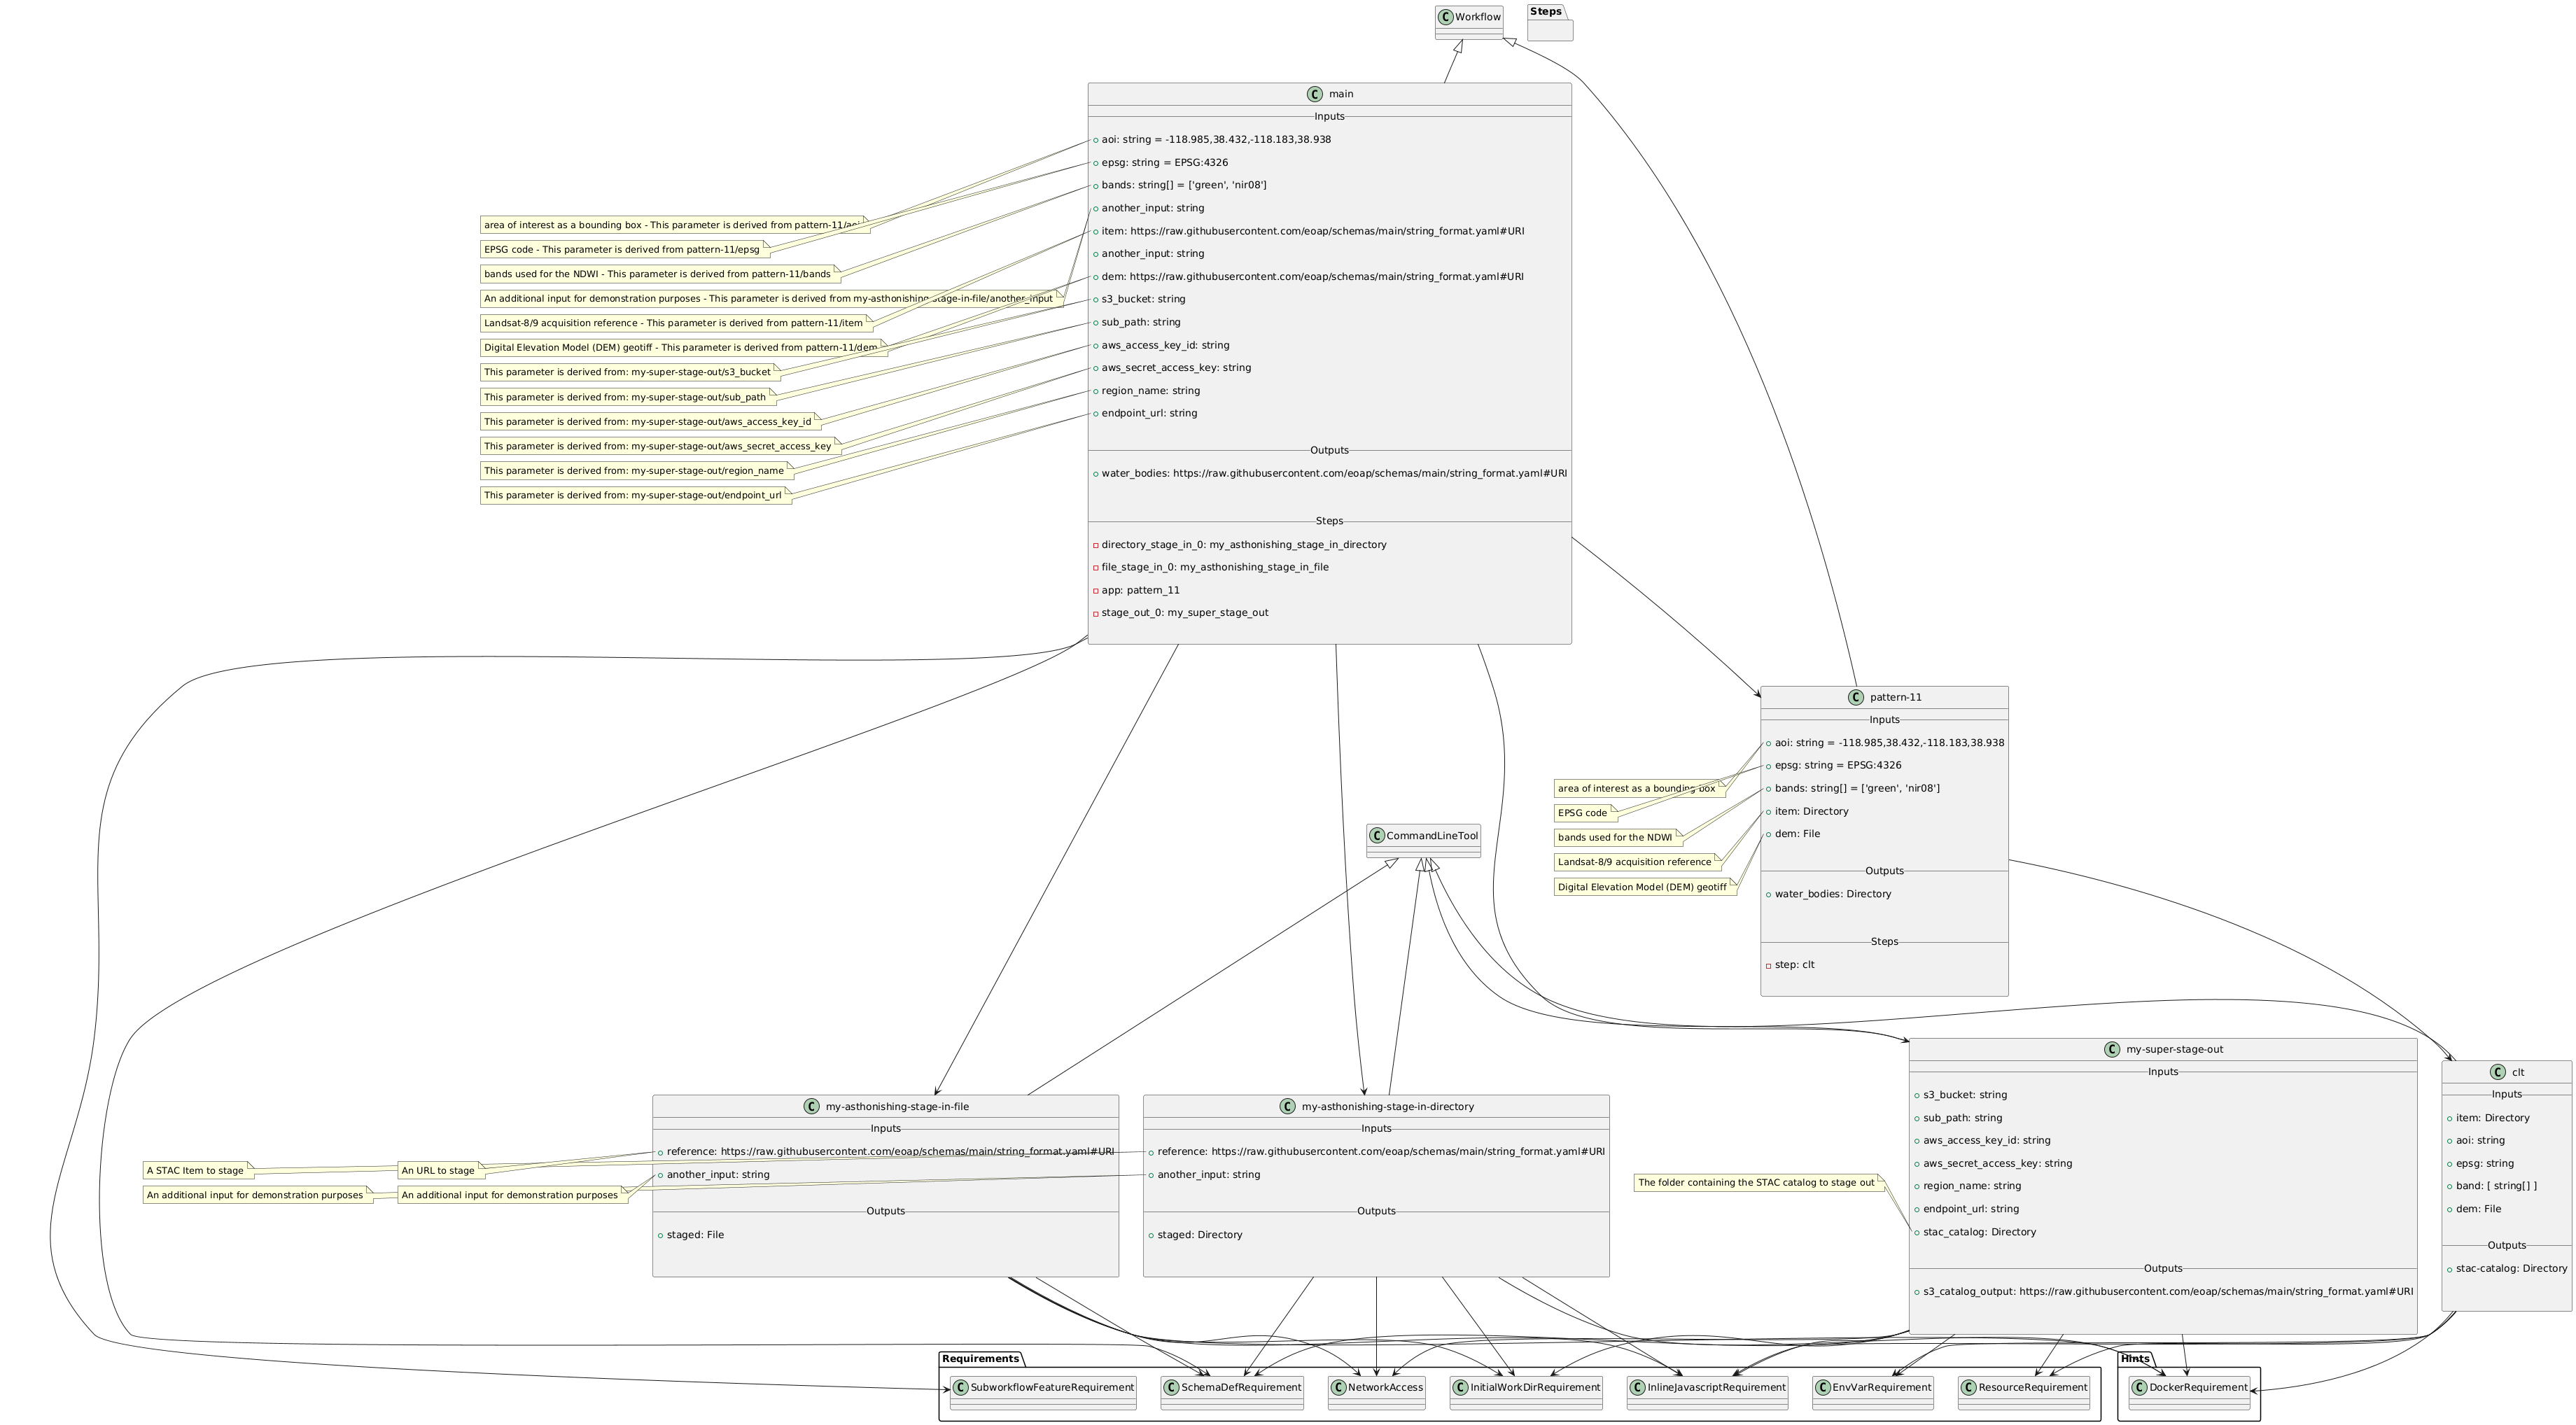

## sequence diagram

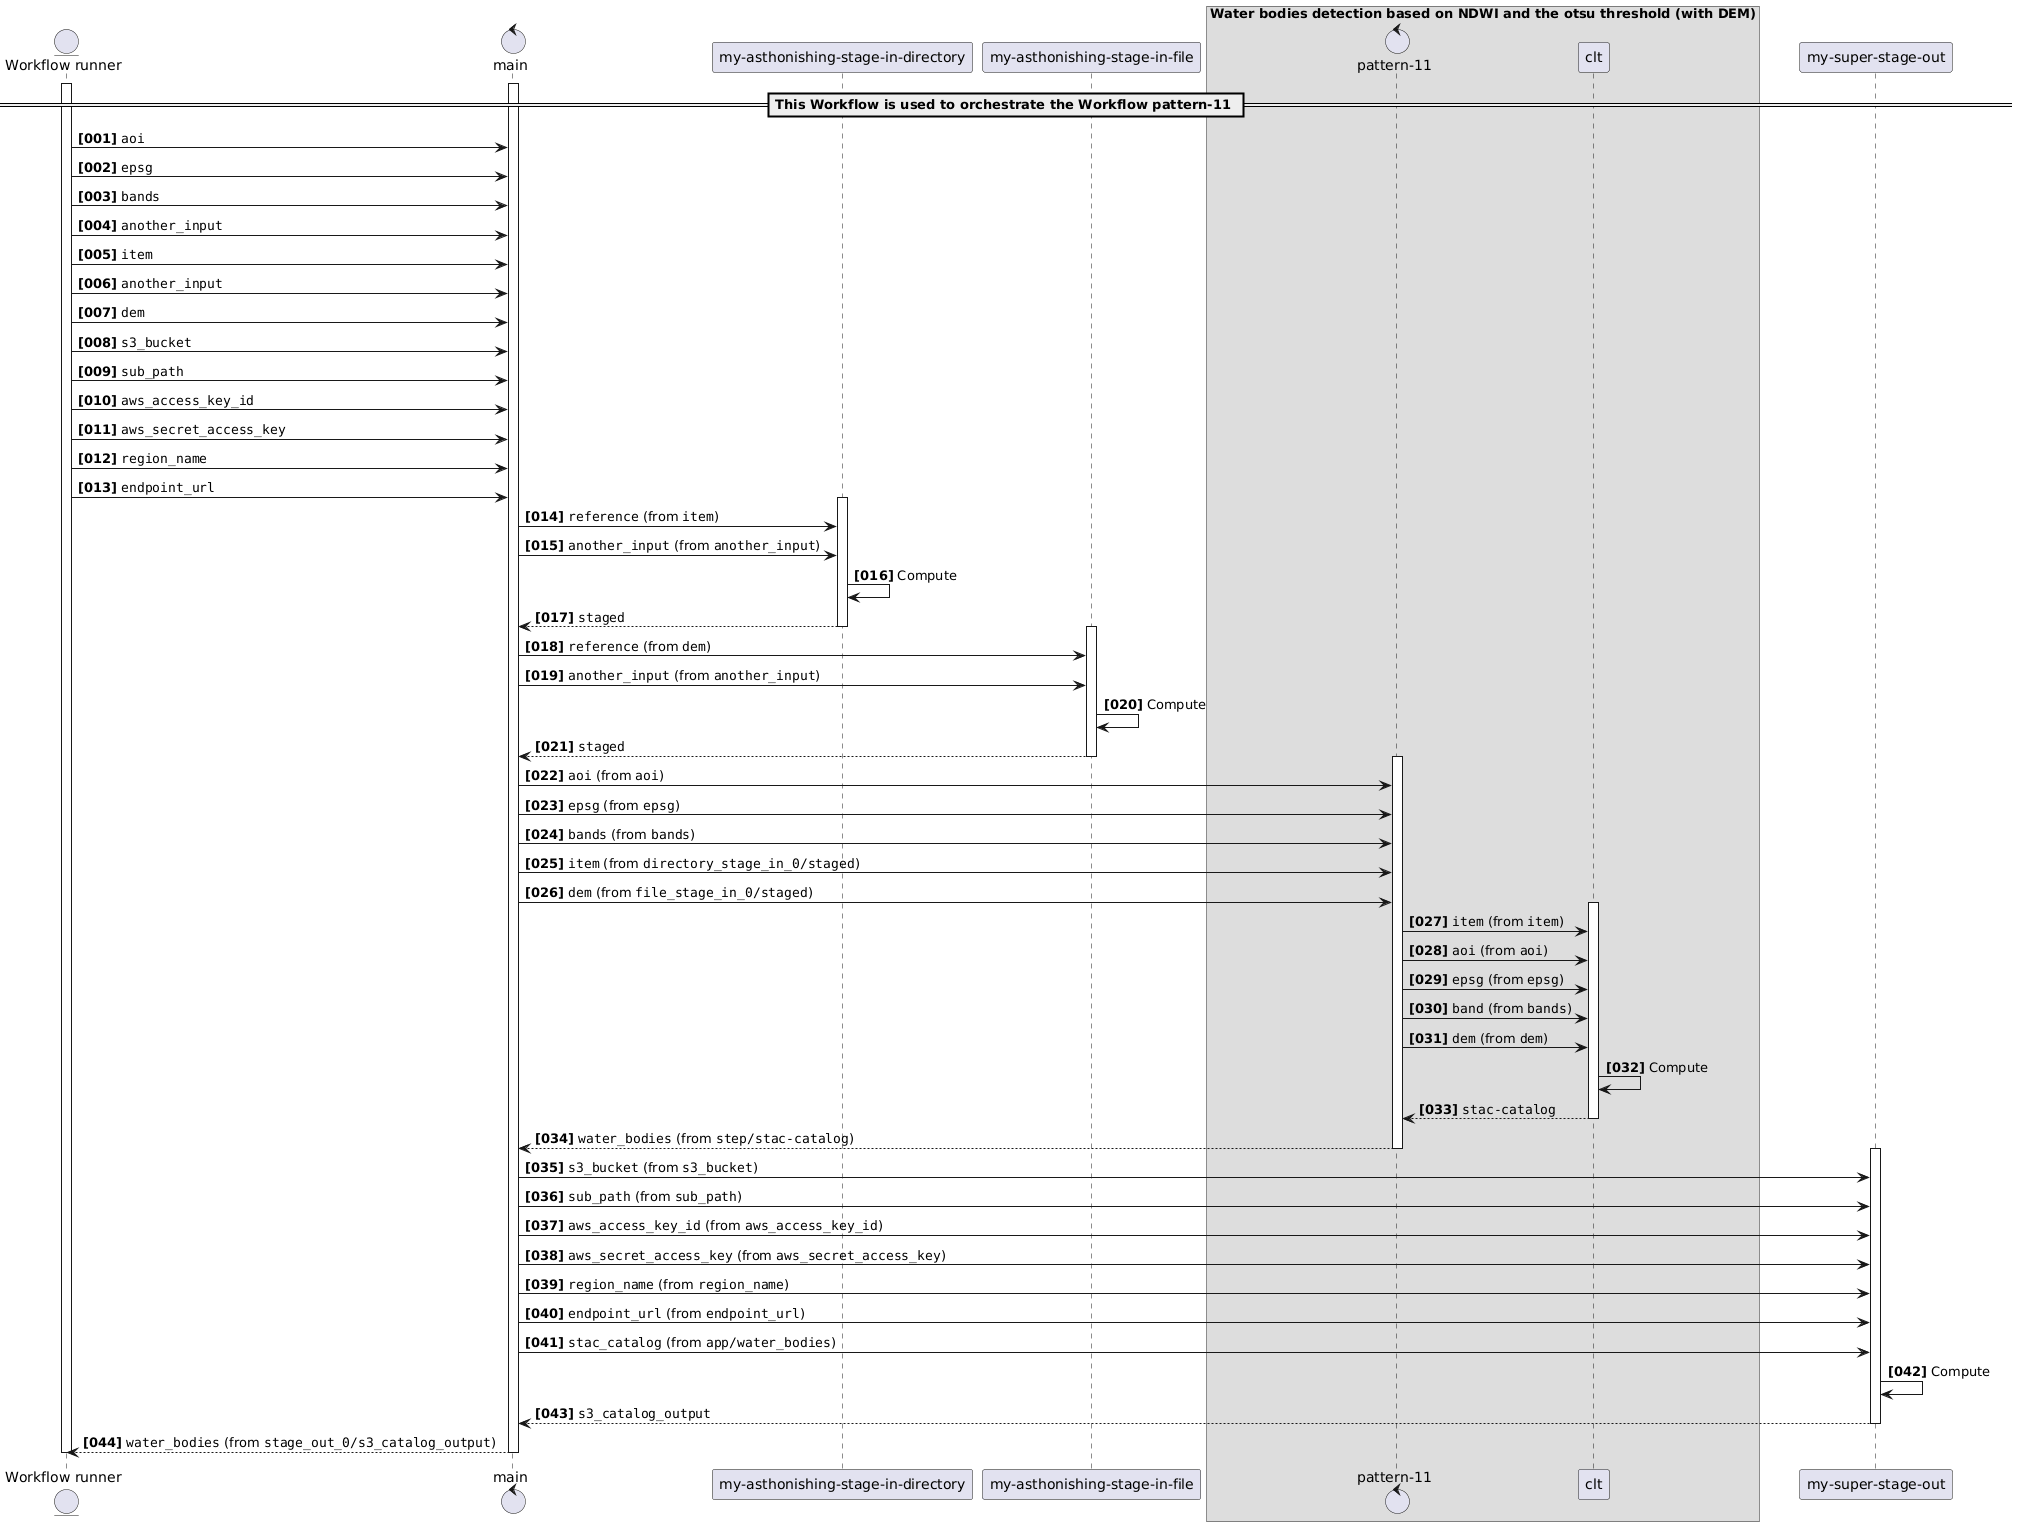

## state diagram

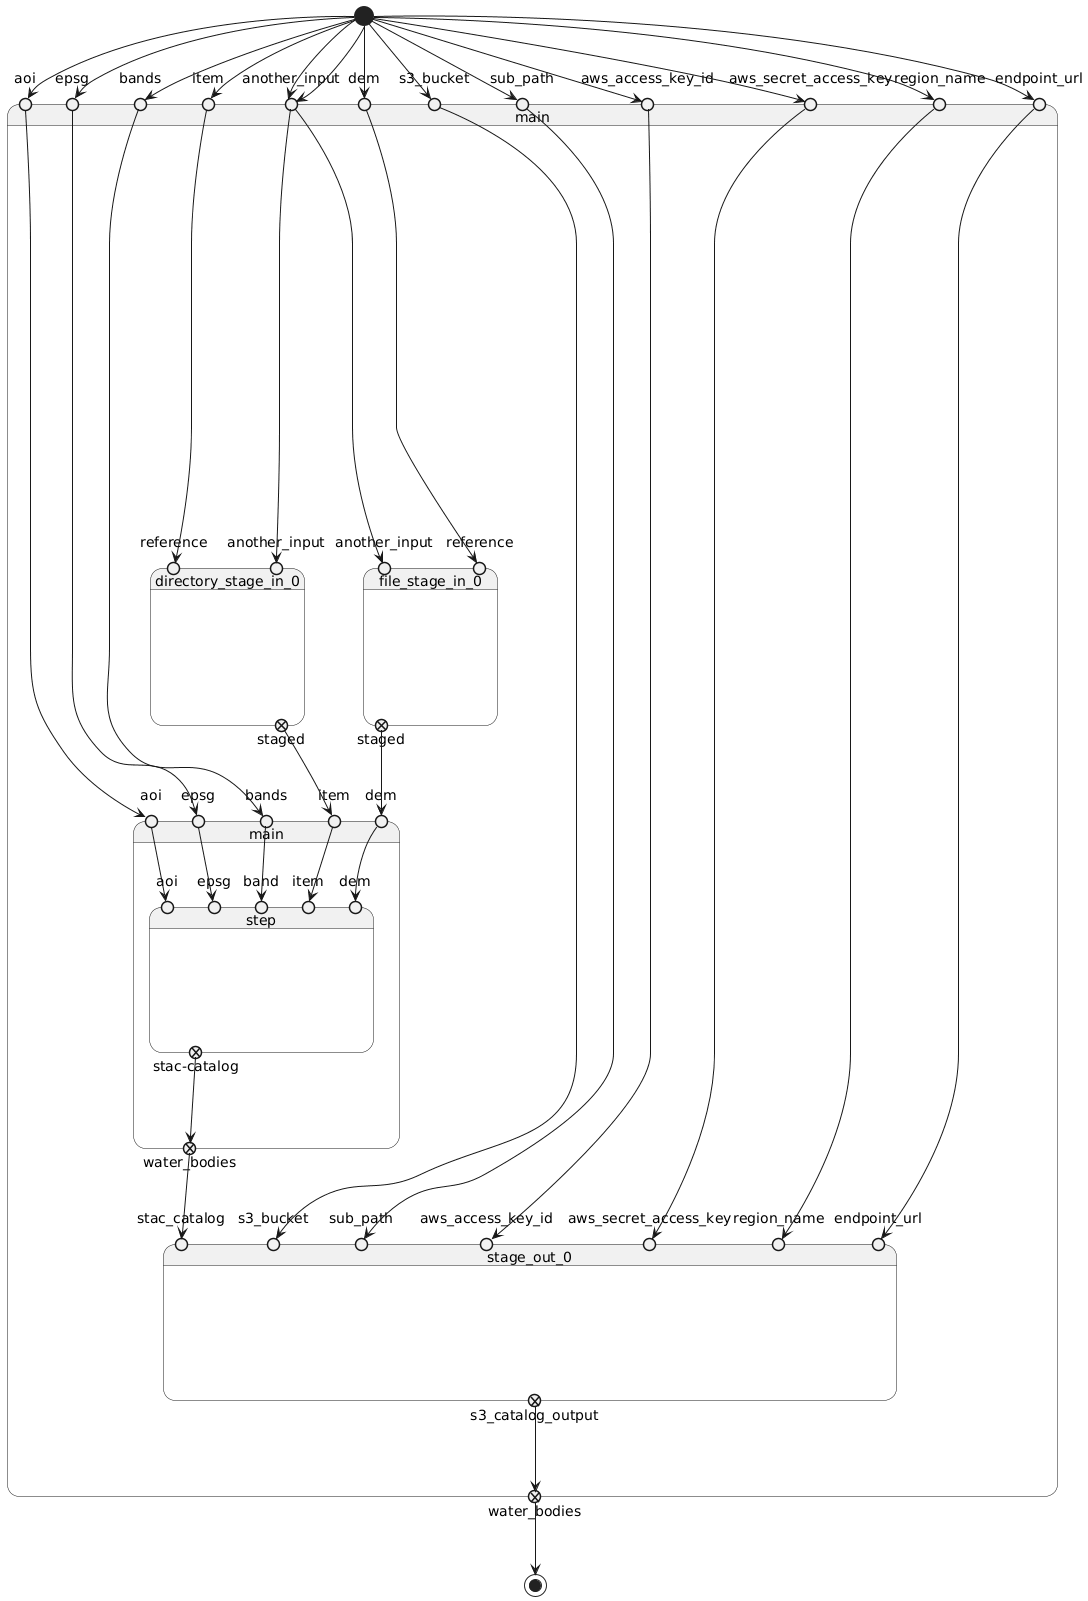

# Pattern 12

## component diagram

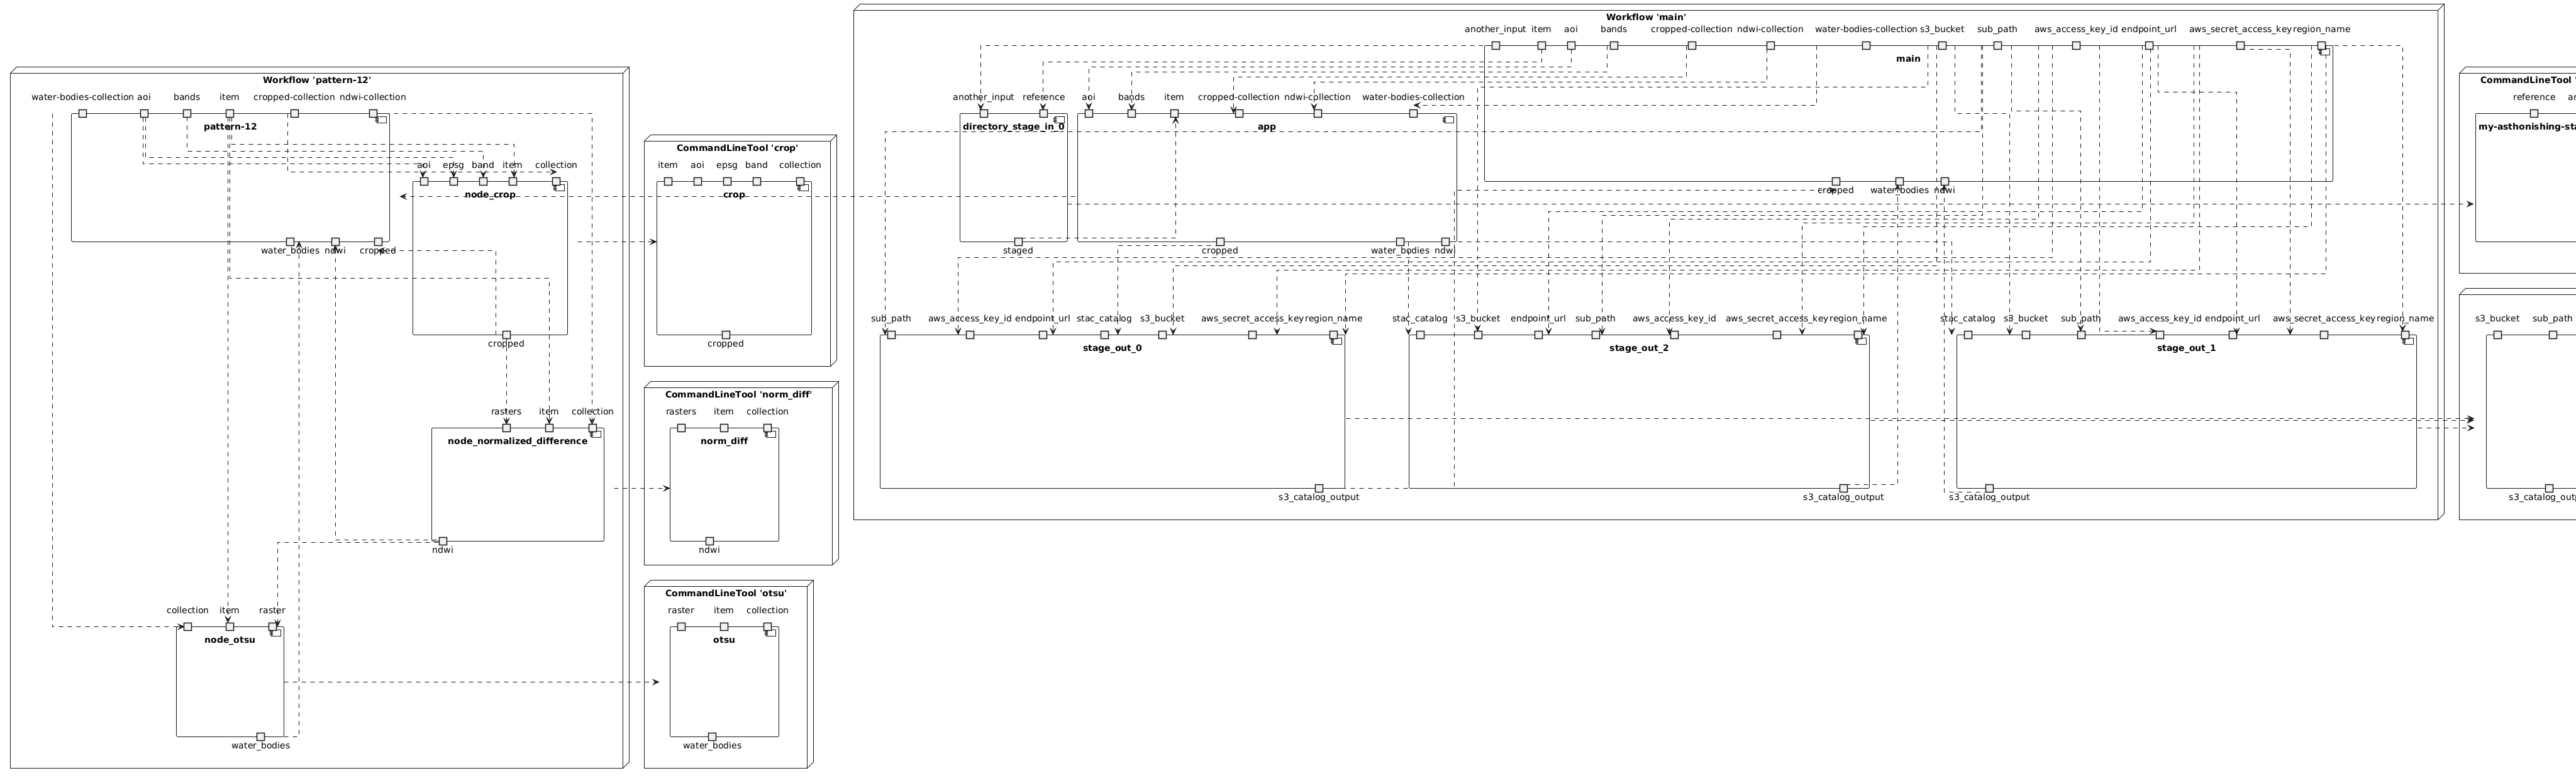

## class diagram

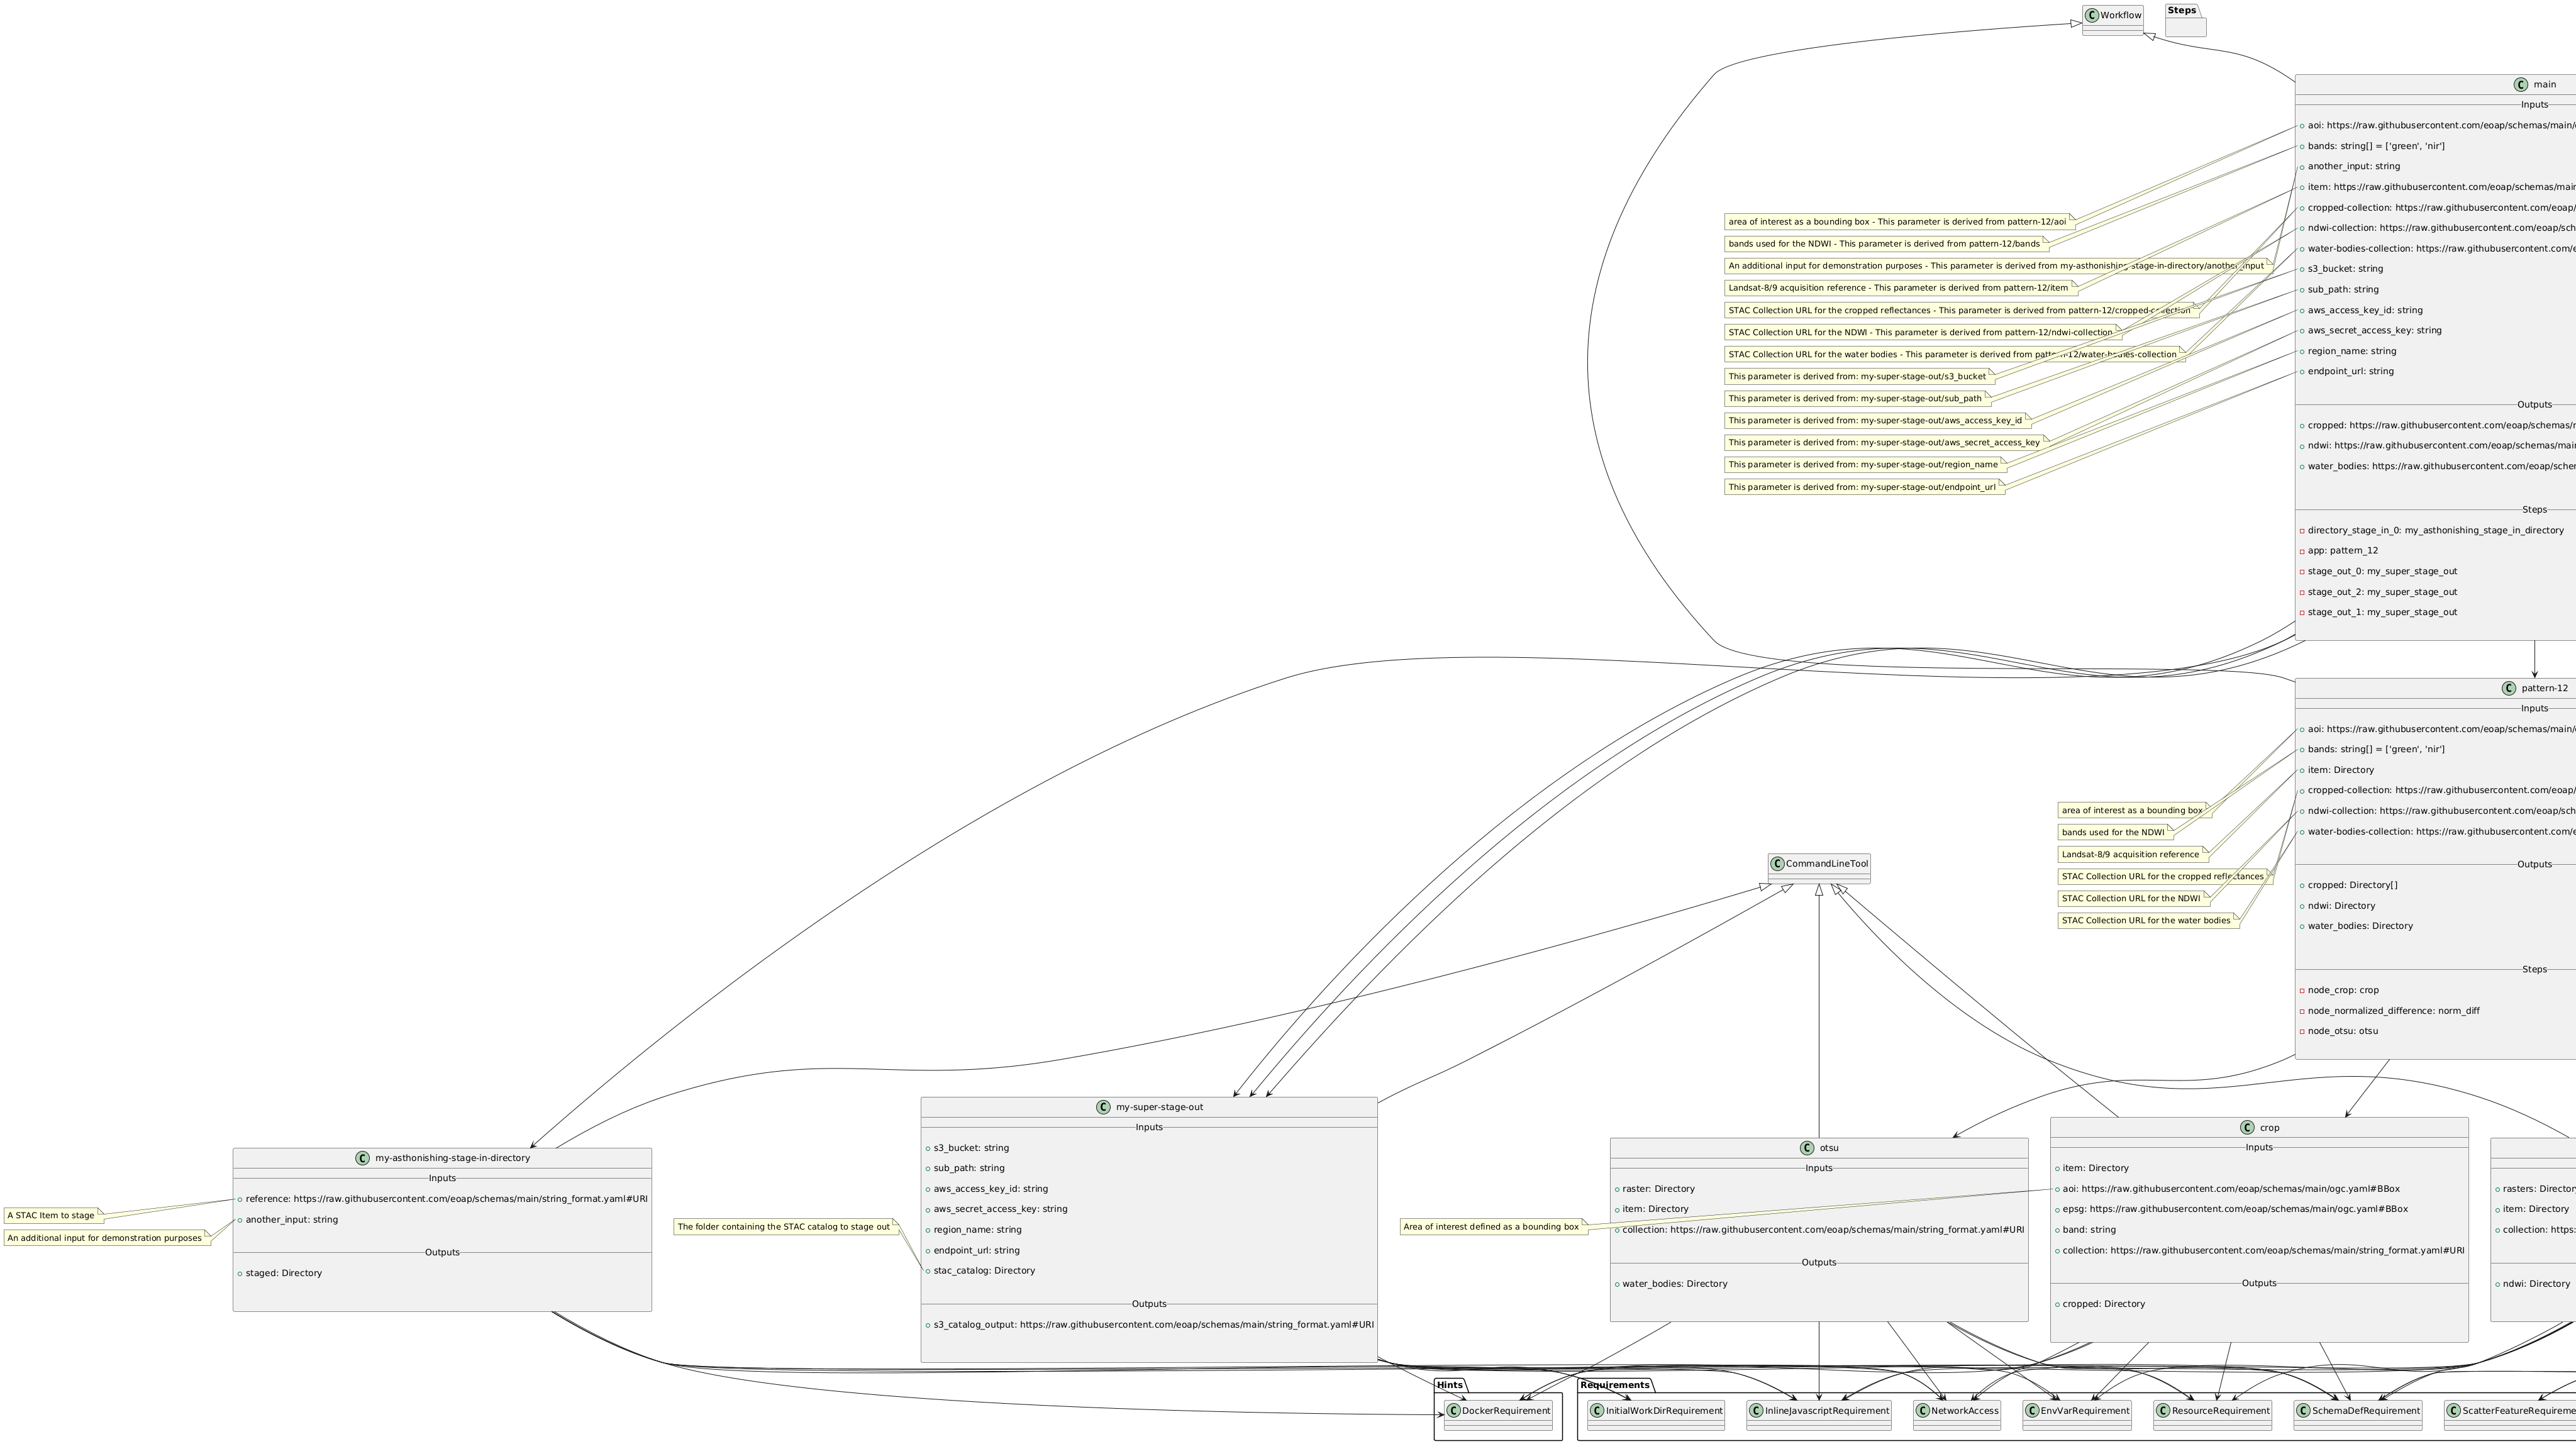

## sequence diagram

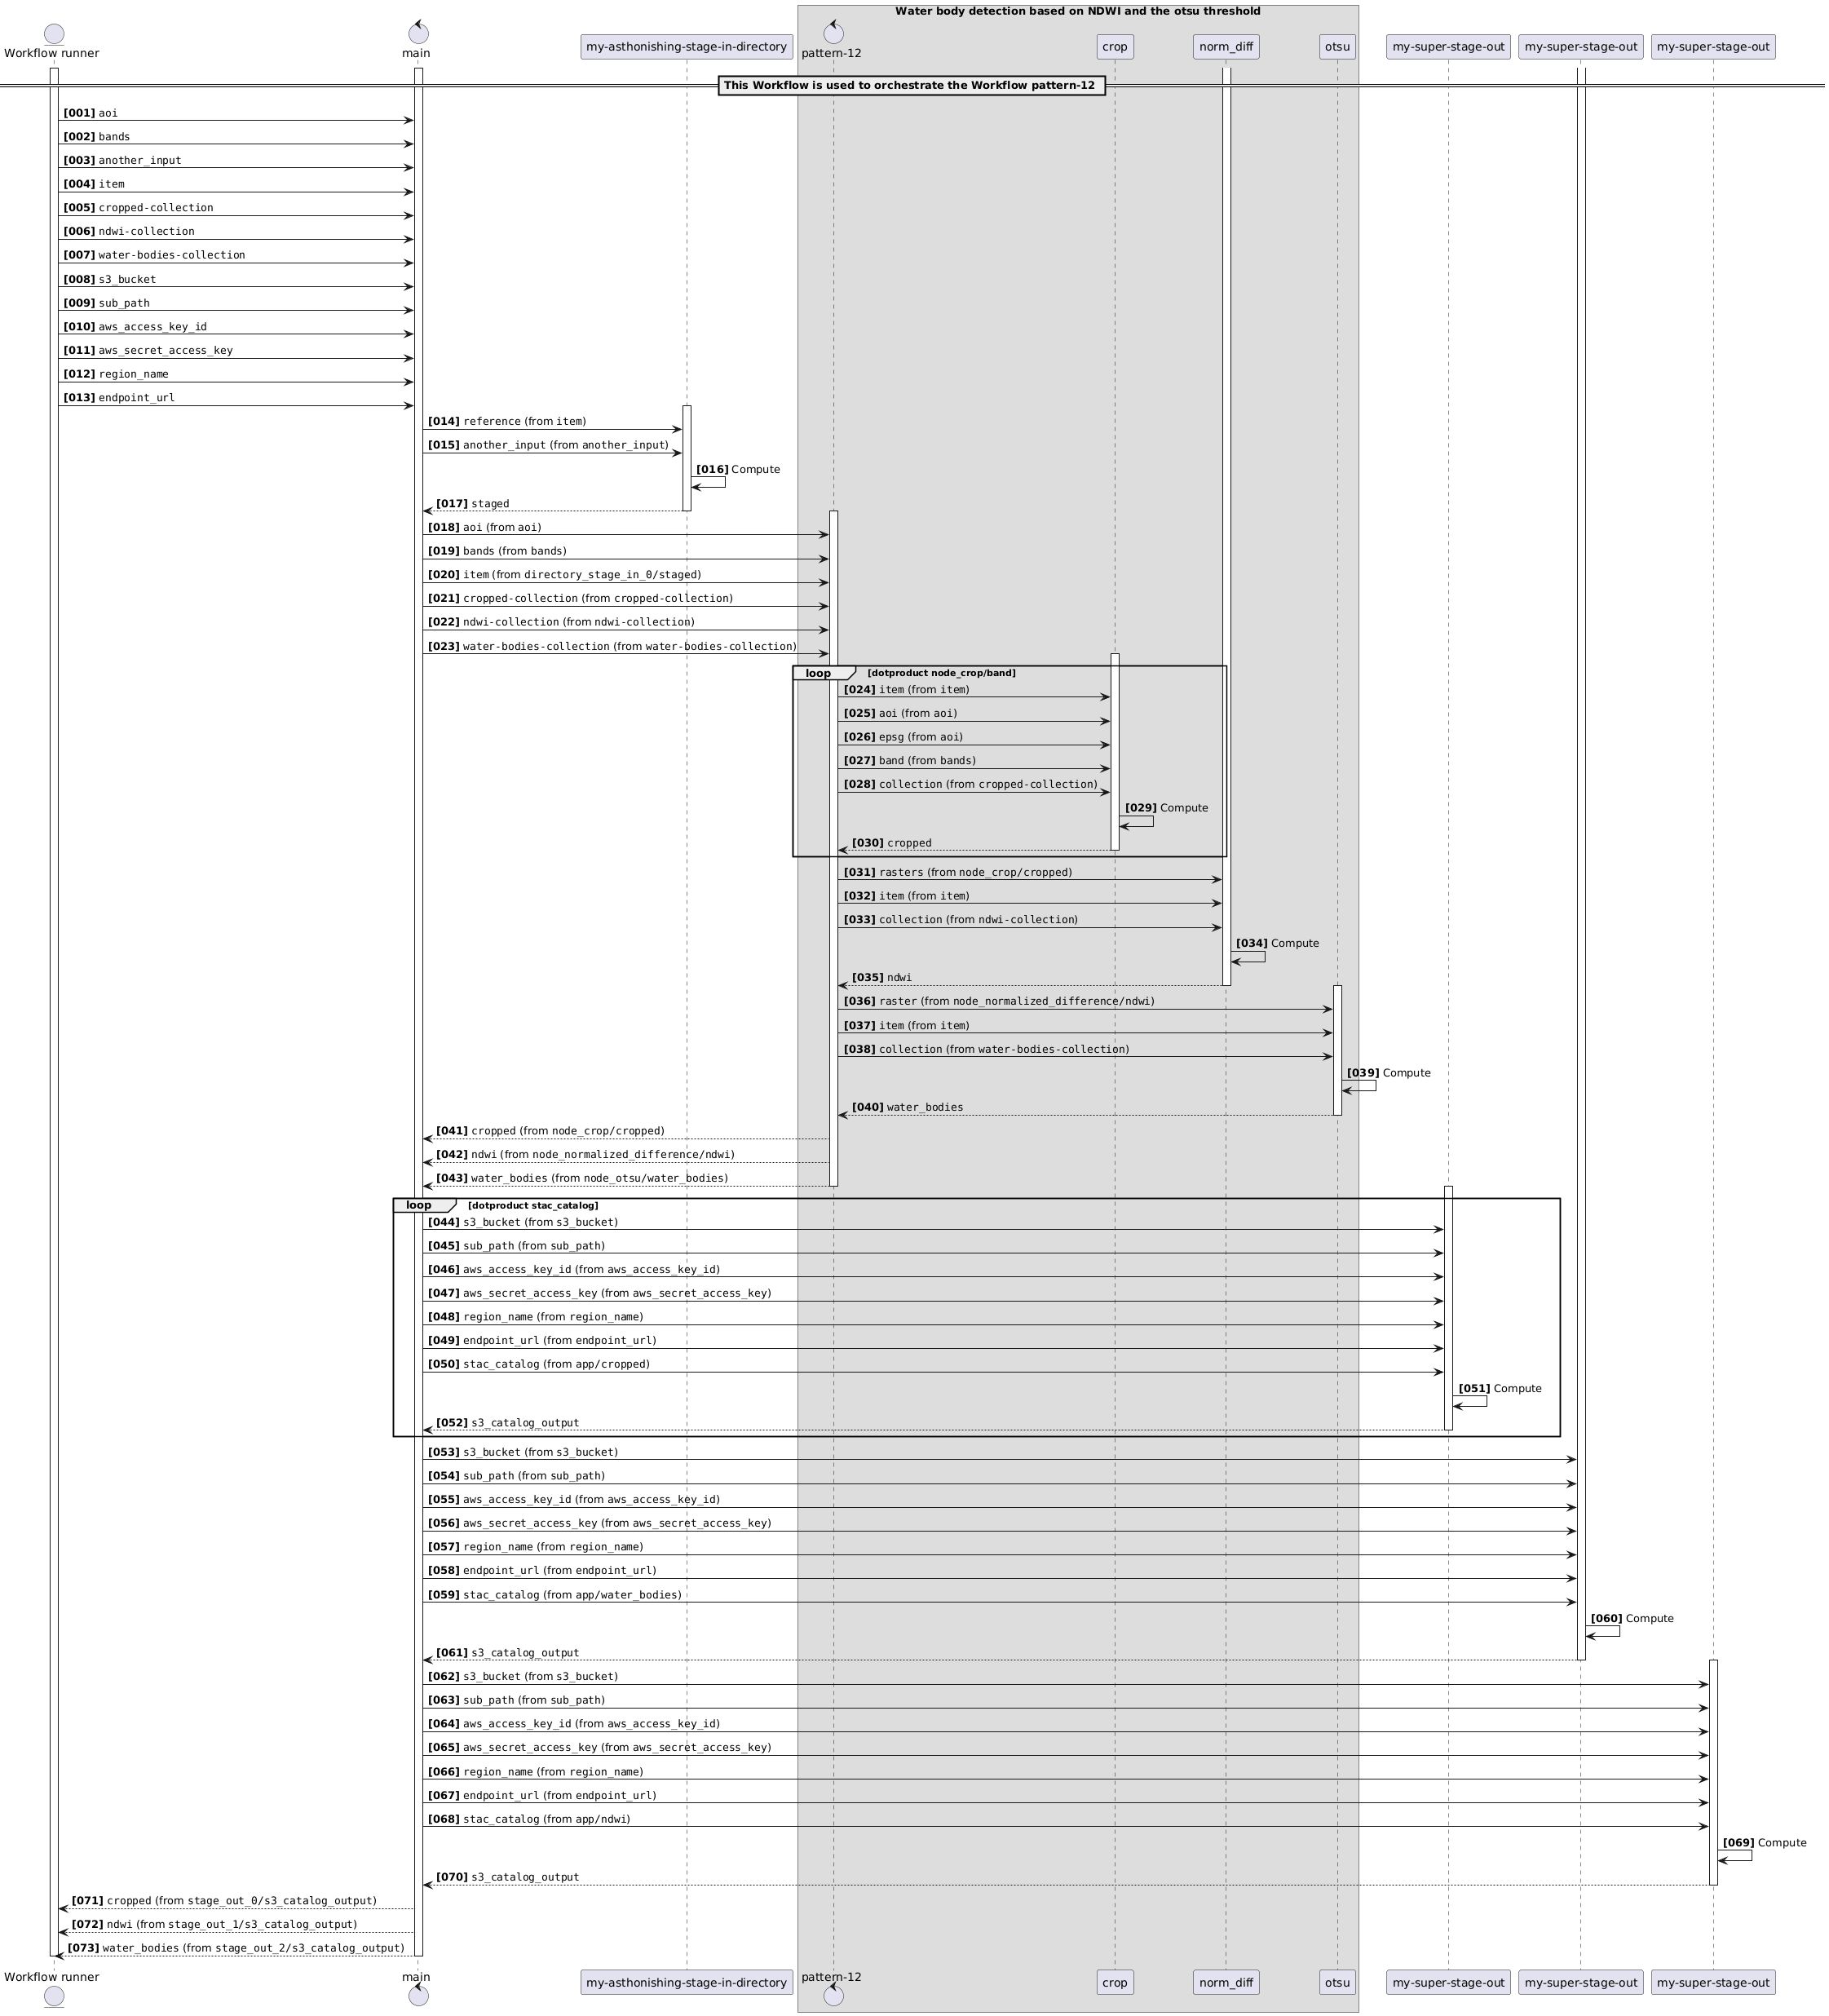

## state diagram

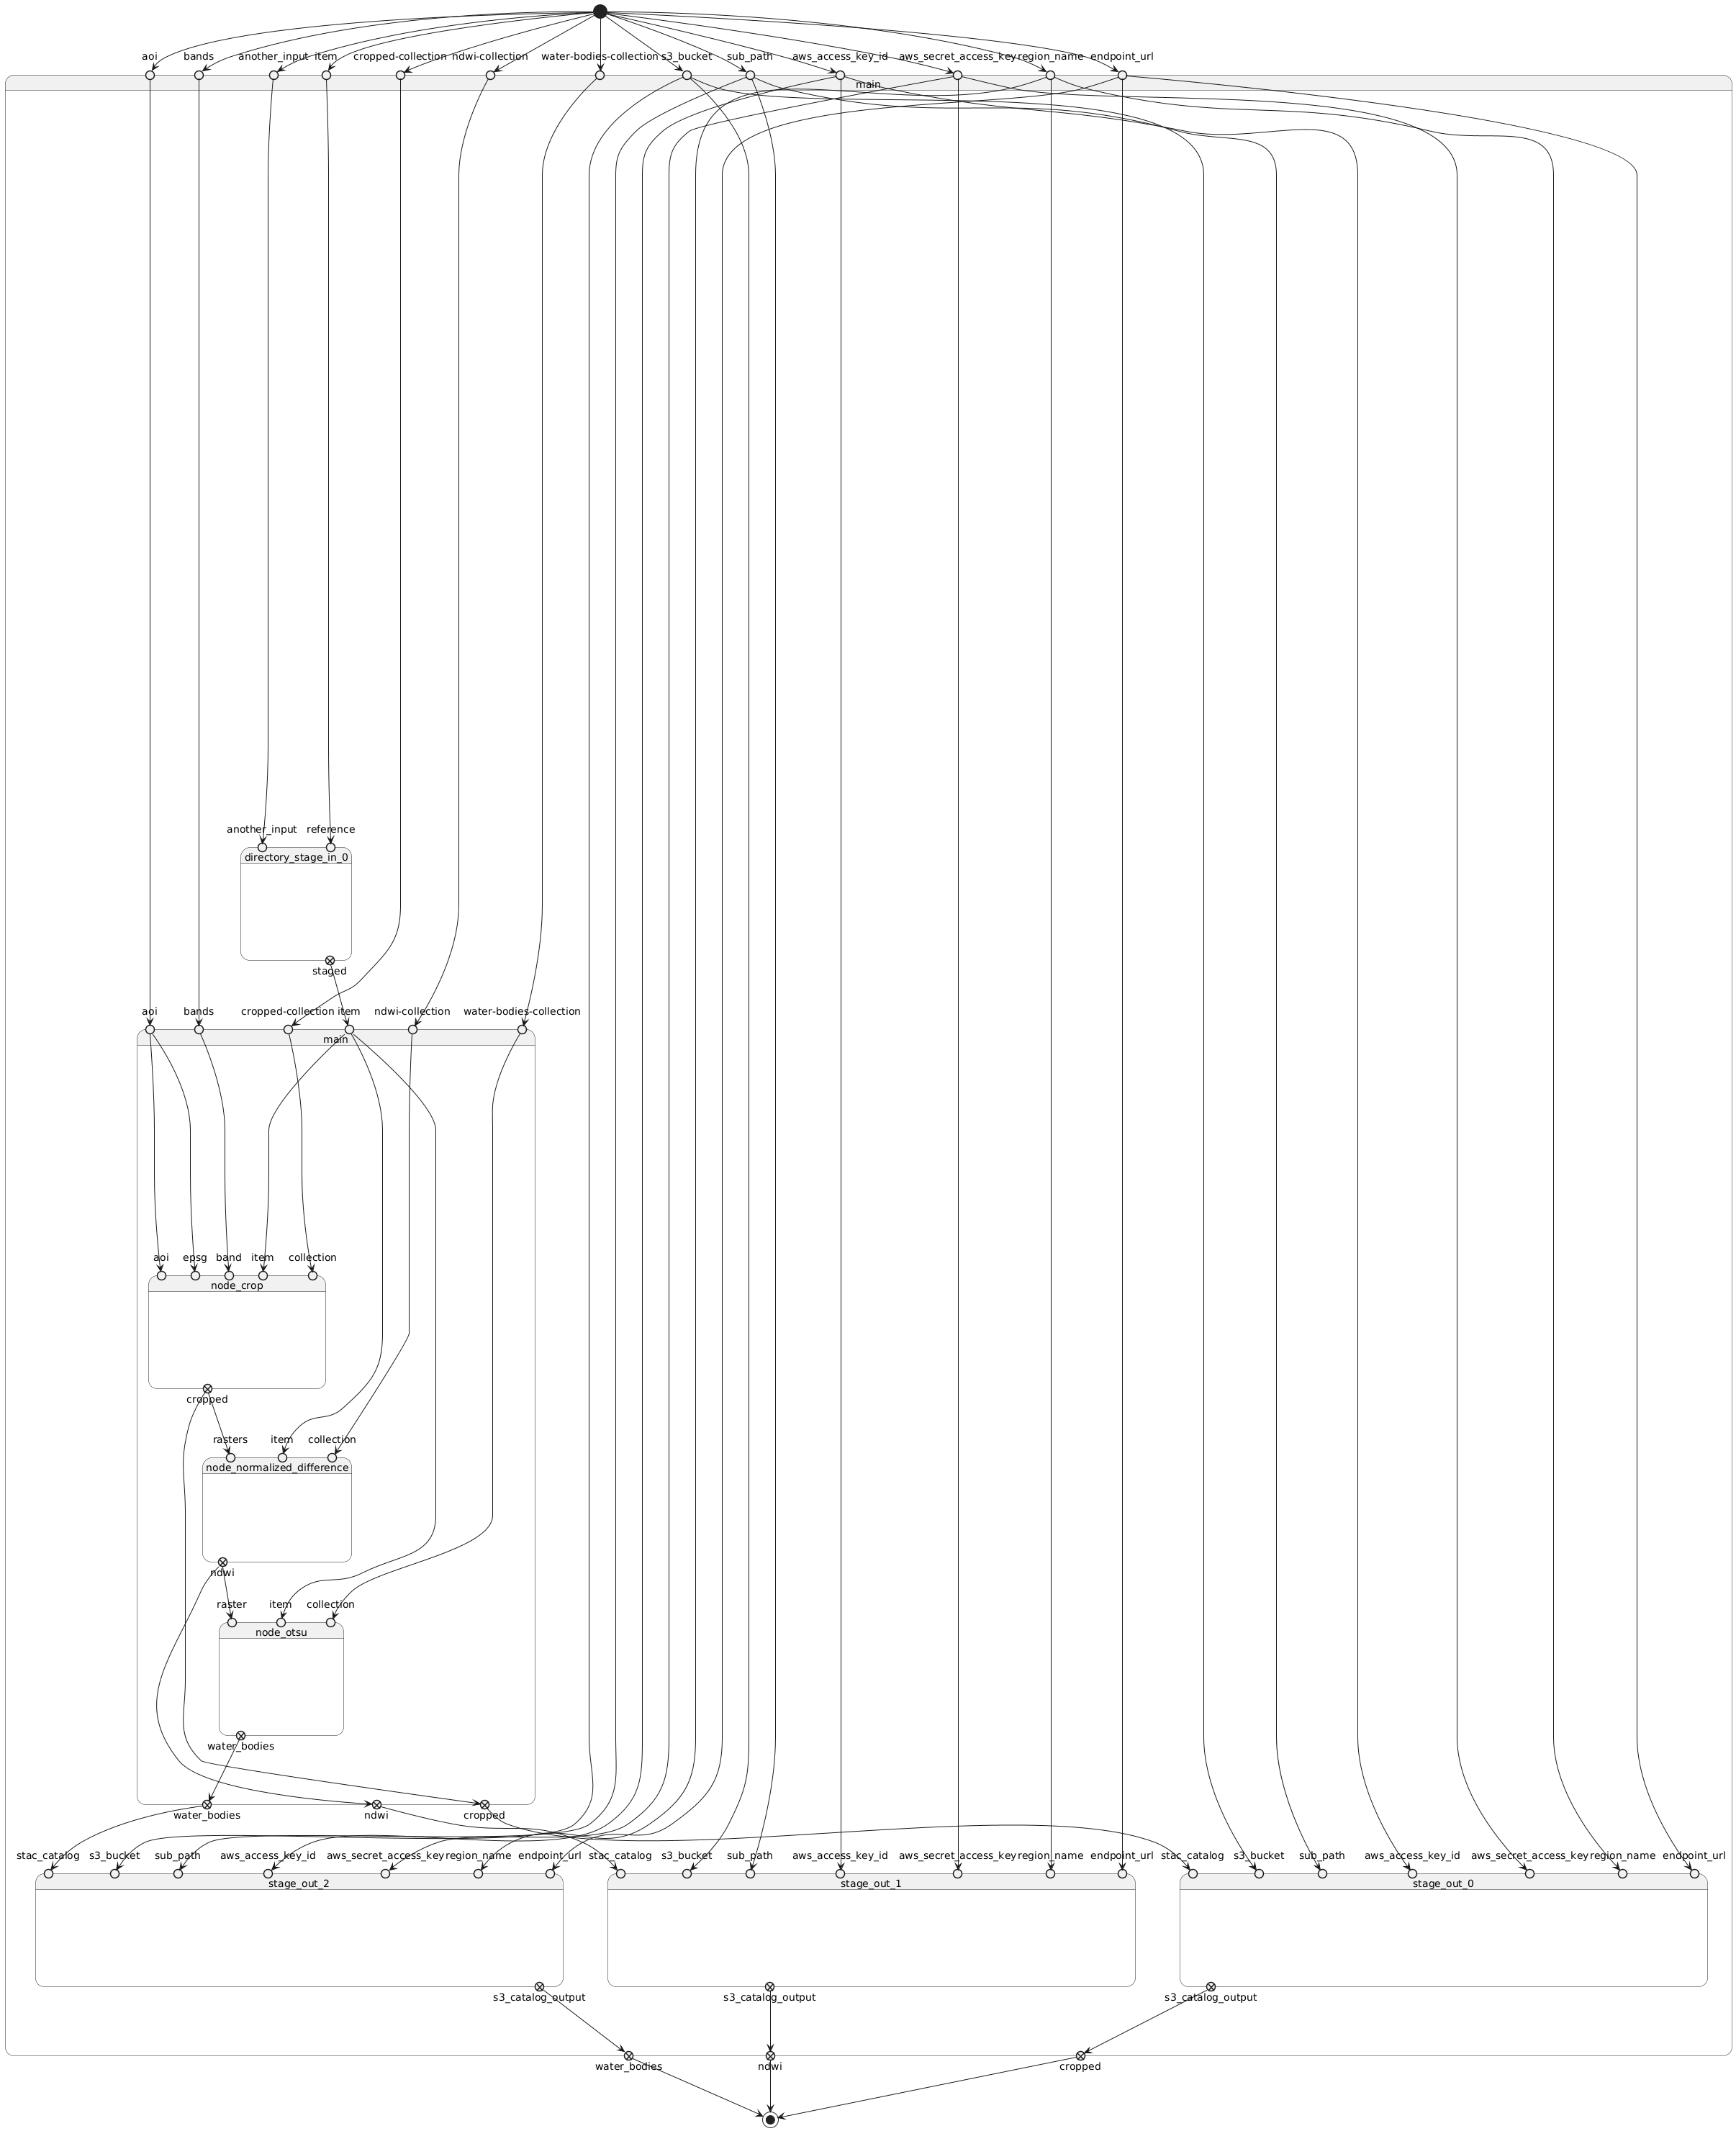

In [1]:
from cwl2puml import (
    to_puml,
    DiagramType
)
from eoap_cwlwrap import wrap_locations
from io import (
    StringIO,
    BytesIO
)
from IPython.display import (
    display_markdown,
    display_png,
    Markdown
)
from plantuml import deflate_and_encode
from PIL import Image
from typing import List
from urllib.request import urlopen
from loguru import logger
import sys

logger.remove() #remove the old handler. Else, the old one will work along with the new one you've added below'
logger.add(sys.stderr, level="CRITICAL")

base_url = 'https://raw.githubusercontent.com/eoap/application-package-patterns/refs/heads/main'
directory_stage_in = f"{base_url}/templates/stage-in.cwl"
file_stage_in = f"{base_url}/templates/stage-in-file.cwl"
stage_out_cwl = f"{base_url}/templates/stage-out.cwl"

debug = False

for pattern_index in range(1, 13, 1):
    display_markdown(Markdown(f"# Pattern {pattern_index}"))

    workflow_id = f"pattern-{pattern_index}"
    workflows_cwl = f"{base_url}/cwl-workflow/{workflow_id}.cwl"

    cwl_document = wrap_locations(
        workflows=workflows_cwl,
        workflow_id=workflow_id,
        directory_stage_in=directory_stage_in,
        file_stage_in=file_stage_in,
        stage_out=stage_out_cwl
    )

    for diagram_type in DiagramType:
        display_markdown(Markdown(f"## {diagram_type.name.lower()} diagram"))

        out = StringIO()
        to_puml( # workflow_id='main' by default
            cwl_document=cwl_document,
            diagram_type=diagram_type,
            output_stream=out
        )

        clear_output = out.getvalue()

        if debug:
            print(clear_output)

        encoded = deflate_and_encode(clear_output)
        diagram_url = f"https://www.plantuml.com/plantuml/png/{encoded}"

        with urlopen(diagram_url) as url:
            img = Image.open(BytesIO(url.read()))
        display_png(img)